In [1]:
import diff_classifier.utils as ut
import diff_classifier.msd as msd
import diff_classifier.features as ft
import diff_classifier.heatmaps as hm

import diff_classifier.aws as aws
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
remote_folder = 'Training_Images'
bucket = 'dash2927.data'

In [3]:
prefix = 'lowMP_0000'
# outfile = 'Traj_{}.csv'.format(prefix)

msds_file = 'msd_{}.csv'.format(prefix)
feat_file = 'features_{}.csv'.format(prefix)

aws.download_s3('{}/{}'.format(remote_folder, msds_file), msds_file, bucket_name=bucket)
aws.download_s3('{}/{}'.format(remote_folder, feat_file), feat_file, bucket_name=bucket)

# traj = ut.csv_to_pd(outfile)

In [4]:
msds_file

'msd_lowMP_0000.csv'

In [5]:
import csv
outputFile = msds_file
with open(outputFile, 'rt') as trajectoryPaths:
        trajectoryDataset = csv.reader(trajectoryPaths, delimiter=' ', quotechar='|')

In [6]:
lowMP_0000 = pd.read_csv(msds_file)

In [7]:
with open(outputFile, 'rt') as trajectoryPaths:
    trajectoryDataset = pd.read_csv(trajectoryPaths)
    trajectoryDataset = trajectoryDataset.dropna()


In [8]:
print('File name:\t\t\t {:>20}'.format(outputFile))
print('Unique trajectory ids:\t\t {:20d}'.format(int(lowMP_0000['Track_ID'].max())))
print('Minimum trajectory length:\t {:20f} pixels'.format(lowMP_0000.groupby(['Track_ID'])['MSDs'].max().min()))
print('Maximum trajectory length:\t {:20f} pixels'.format(lowMP_0000['MSDs'].max()))

File name:			   msd_lowMP_0000.csv
Unique trajectory ids:		                 8814
Minimum trajectory length:	             0.265305 pixels
Maximum trajectory length:	         21156.180184 pixels


In [9]:
traj = lowMP_0000

In [122]:
traj = traj.drop(columns = 'Unnamed: 0')

In [117]:
traj2 = traj.loc['Frame']

KeyError: 'Frame'

In [123]:
traj

Frame  Track_ID            X            Y       MSDs     Gauss  \
0          0.0       0.0    44.946826  1753.038718   0.000000  0.000000   
1          1.0       0.0    47.122758  1752.081551   3.010142  3.432346   
2          2.0       0.0    42.970775  1752.230750   4.299457  2.942103   
3          3.0       0.0    47.457136  1752.117151   6.496320  3.012967   
4          4.0       0.0    44.207107  1753.915670   6.462473  2.560900   
5          5.0       0.0    50.305864  1754.197535   8.682606  3.106181   
6          6.0       0.0    47.114507  1752.030905   9.845207  3.121759   
7          7.0       0.0    49.276775  1751.944557  11.283810  3.112820   
8          8.0       0.0    42.974423  1755.327413  11.526111  3.209089   
9          9.0       0.0    43.355704  1755.592619  11.726442  2.770813   
10        10.0       0.0    43.094222  1758.272609  12.187462  2.876773   
11        11.0       0.0    43.994145  1755.283042  12.301028  2.520631   
12        12.0       0.0    39.627392  1753.211003  13.477566  2.521423   
13        13.0       0.0    38.680130  1749.766903  13.770957  2.391735   
14        14.0       0.0    42.295878  1750.514730  14.325858  2.597289   
15        15.0       0.0    44.326220  1750.330537  14.037622  2.499505   
16        16.0       0.0    44.930376  1747.808783  14.953140  2.677913   
17        17.0       0.0    41.065277  1745.524064  14.904023  2.325669   
18        18.0       0.0    44.113224  1744.007862  15.209319  2.441872   
19        19.0       0.0    40.350206  1748.740395  13.854978  2.206443   
20        20.0       0.0    39.152770  1746.122581  13.559743  2.491102   
21        21.0       0.0    34.758428  1748.075934  12.684374  2.204568   
22        22.0       0.0    37.586045  1747.155264  12.416789  2.141970   
23        23.0       0.0    37.368984  1747.045510  11.567698  2.176592   
24        24.0       0.0    38.767912  1751.816510  11.107345  2.262494   
25        25.0       0.0    38.442519  1753.896234  10.514152  2.304499   
26        26.0       0.0    45.690966  1750.845317  10.403263  2.286083   
27        27.0       0.0    45.135686  1749.236274  10.490788  2.238233   
28        28.0       0.0    44.153334  1752.424149  10.630025  2.171342   
29        29.0       0.0    44.142642  1753.340774  10.679391  2.137878   
...        ...       ...          ...          ...        ...       ...   
5738535  621.0    8814.0  1668.321719   205.818004        NaN       NaN   
5738536  622.0    8814.0  1668.695399   206.490781        NaN       NaN   
5738537  623.0    8814.0  1668.166572   206.733418        NaN       NaN   
5738538  624.0    8814.0  1668.646651   205.928514        NaN       NaN   
5738539  625.0    8814.0  1667.461163   205.752364        NaN       NaN   
5738540  626.0    8814.0  1667.890260   206.658577        NaN       NaN   
5738541  627.0    8814.0  1668.200505   206.166413        NaN       NaN   
5738542  628.0    8814.0  1667.907885   206.916262        NaN       NaN   
5738543  629.0    8814.0  1667.701771   206.898197        NaN       NaN   
5738544  630.0    8814.0  1668.500277   205.123911        NaN       NaN   
5738545  631.0    8814.0  1668.497180   205.716781        NaN       NaN   
5738546  632.0    8814.0  1667.354948   205.849779        NaN       NaN   
5738547  633.0    8814.0  1668.002188   206.477610        NaN       NaN   
5738548  634.0    8814.0  1667.804421   206.265638        NaN       NaN   
5738549  635.0    8814.0  1667.976126   205.445961        NaN       NaN   
5738550  636.0    8814.0  1668.102104   205.965657        NaN       NaN   
5738551  637.0    8814.0  1668.359354   206.358794        NaN       NaN   
5738552  638.0    8814.0  1667.902039   205.669127        NaN       NaN   
5738553  639.0    8814.0  1668.051538   206.777345        NaN       NaN   
5738554  640.0    8814.0  1668.474955   205.584169        NaN       NaN   
5738555  641.0    8814.0  1668.609442   206.309115        NaN       NaN   
5738556  642.0    8814.0  1668.089

In [10]:
lowMP_0000.dropna()

Unnamed: 0  Frame  Track_ID            X            Y        MSDs  \
0                 0    0.0       0.0    44.946826  1753.038718    0.000000   
1                 1    1.0       0.0    47.122758  1752.081551    3.010142   
2                 2    2.0       0.0    42.970775  1752.230750    4.299457   
3                 3    3.0       0.0    47.457136  1752.117151    6.496320   
4                 4    4.0       0.0    44.207107  1753.915670    6.462473   
5                 5    5.0       0.0    50.305864  1754.197535    8.682606   
6                 6    6.0       0.0    47.114507  1752.030905    9.845207   
7                 7    7.0       0.0    49.276775  1751.944557   11.283810   
8                 8    8.0       0.0    42.974423  1755.327413   11.526111   
9                 9    9.0       0.0    43.355704  1755.592619   11.726442   
10               10   10.0       0.0    43.094222  1758.272609   12.187462   
11               11   11.0       0.0    43.994145  1755.283042   12.301028   
12               12   12.0       0.0    39.627392  1753.211003   13.477566   
13               13   13.0       0.0    38.680130  1749.766903   13.770957   
14               14   14.0       0.0    42.295878  1750.514730   14.325858   
15               15   15.0       0.0    44.326220  1750.330537   14.037622   
16               16   16.0       0.0    44.930376  1747.808783   14.953140   
17               17   17.0       0.0    41.065277  1745.524064   14.904023   
18               18   18.0       0.0    44.113224  1744.007862   15.209319   
19               19   19.0       0.0    40.350206  1748.740395   13.854978   
20               20   20.0       0.0    39.152770  1746.122581   13.559743   
21               21   21.0       0.0    34.758428  1748.075934   12.684374   
22               22   22.0       0.0    37.586045  1747.155264   12.416789   
23               23   23.0       0.0    37.368984  1747.045510   11.567698   
24               24   24.0       0.0    38.767912  1751.816510   11.107345   
25               25   25.0       0.0    38.442519  1753.896234   10.514152   
26               26   26.0       0.0    45.690966  1750.845317   10.403263   
27               27   27.0       0.0    45.135686  1749.236274   10.490788   
28               28   28.0       0.0    44.153334  1752.424149   10.630025   
29               29   29.0       0.0    44.142642  1753.340774   10.679391   
...             ...    ...       ...          ...          ...         ...   
5718898      289558  514.0    8784.0  1577.016699   114.784696  136.345574   
5718899      289559  515.0    8784.0  1577.025152   114.782237  140.506951   
5718900      289560  516.0    8784.0  1577.033604   114.779778  144.960029   
5718901      289561  517.0    8784.0  1577.042057   114.777319  149.737201   
5718902      289562  518.0    8784.0  1577.050509   114.774859  154.875845   
5718903      289563  519.0    8784.0  1577.058962   114.772400  160.419319   
5718904      289564  520.0    8784.0  1577.067414   114.769941  166.418208   
5718905      289565  521.0    8784.0  1577.075867   114.767482  172.931893   
5718906      289566  522.0    8784.0  1577.084319   114.765023  180.030553   
5718907      289567  523.0    8784.0  1577.092771   114.762563  187.797733   
5718908      289568  524.0    8784.0  1577.101224   114.760104  196.251797   
5718909      289569  525.0    8784.0  1577.109676   114.757645  205.914770   
5718910      289570  526.0    8784.0  1577.118129   114.755186  213.131867   
5718911      289571  527.0    8784.0  1577.126581   114.752727  222.590027   
5718912      289572  528.0    8784.0  1577.135034   114.750267  227.741555   
5718913      289573  529.0    8784.0  1577.143486   114.747808  235.781066   
5718914      289574  530.0    8784.0  1577.151939   114.745349  236.149243   
5718915      289575  531.0    8784.0  1577.160391   114.742890  233.442052   
5718916      289576  532.0    8784.0  1577.168844   114.740431  222.447780   
5718917      289577  533.0    8

In [11]:
track_0000_4724 = lowMP_0000[lowMP_0000.Track_ID.isin([0.0])]

In [12]:
track_0000_test = lowMP_0000[lowMP_0000.Track_ID.isin([5340.0])]

In [13]:
track_0000_test['Y'].min()//1

571.0

In [14]:
lowMP_0000[lowMP_0000.Track_ID.isin([51])]

Unnamed: 0  Frame  Track_ID      X       Y      MSDs      Gauss  \
33201       33201    0.0      51.0    NaN     NaN  0.000000   0.000000   
33202       33202    1.0      51.0    NaN     NaN  0.606918  14.839710   
33203       33203    2.0      51.0    NaN     NaN  0.932895   9.378627   
33204       33204    3.0      51.0    NaN     NaN  1.132913   6.189788   
33205       33205    4.0      51.0    NaN     NaN  1.371201   4.610157   
33206       33206    5.0      51.0  511.0  1999.0  1.601856   3.883750   
33207       33207    6.0      51.0  511.0  1999.0  1.831595   3.570631   
33208       33208    7.0      51.0  511.0  1998.0  1.948773   3.492796   
33209       33209    8.0      51.0  511.0  1998.0  2.222437   4.012404   
33210       33210    9.0      51.0  511.0  1998.0  2.363179   4.743293   
33211       33211   10.0      51.0  511.0  1998.0  2.546711   5.074272   
33212       33212   11.0      51.0  511.0  1998.0  2.787957   5.144657   
33213       33213   12.0      51.0  511.0  1998.0  2.921369   5.088419   
33214       33214   13.0      51.0  511.0  1998.0  2.990765   5.065491   
33215       33215   14.0      51.0  511.0  1998.0  3.095657   4.850490   
33216       33216   15.0      51.0  511.0  1998.0  3.172755   4.623431   
33217       33217   16.0      51.0  511.0  1998.0  3.169995   4.304060   
33218       33218   17.0      51.0  511.0  1998.0  3.238293   4.561073   
33219       33219   18.0      51.0  511.0  1998.0  3.234358   4.205576   
33220       33220   19.0      51.0  511.0  1998.0  3.236231   3.580471   
33221       33221   20.0      51.0  511.0  1998.0  3.199660   3.449759   
33222       33222   21.0      51.0  511.0  1998.0  3.269462   3.190310   
33223       33223   22.0      51.0  511.0  1998.0  3.323010   3.117341   
33224       33224   23.0      51.0  511.0  1998.0  3.331088   3.044213   
33225       33225   24.0      51.0  511.0  1998.0  3.362419   2.981947   
33226       33226   25.0      51.0  511.0  1998.0  3.390771   2.931336   
33227       33227   26.0      51.0  511.0  1998.0  3.427738   2.918607   
33228       33228   27.0      51.0  511.0  1998.0  3.378170   2.904480   
33229       33229   28.0      51.0  511.0  1998.0  3.420877   2.869051   
33230       33230   29.0      51.0  511.0  1998.0  3.437923   2.864108   
...           ...    ...       ...    ...     ...       ...        ...   
33822       33822  621.0      51.0  511.0  1997.0  2.000000   0.750000   
33823       33823  622.0      51.0  511.0  1997.0  2.200000   0.723140   
33824       33824  623.0      51.0  511.0  1997.0  2.500000   0.680000   
33825       33825  624.0      51.0  511.0  1997.0  3.000000   0.611111   
33826       33826  625.0      51.0  511.0  1997.0  4.000000   0.500000   
33827       33827  626.0      51.0  511.0  1997.0  4.000000   0.500000   
33828       33828  627.0      51.0  511.0  1997.0       NaN        NaN   
33829       33829  628.0      51.0  511.0  1997.0       NaN        NaN   
33830       33830  629.0      51.0  511.0  1997.0       NaN        NaN   
33831       33831  630.0      51.0  511.0  1997.0       NaN        NaN   
33832       33832  631.0      51.0  511.0  1997.0       NaN        NaN   
33833       33833  632.0      51.0    NaN     NaN       NaN        NaN   
33834       33834  633.0      51.0    NaN     NaN       NaN        NaN   
33835       33835  634.0      51.0    NaN     NaN       NaN        NaN   
33836       33836  635.0      51.0    NaN     NaN       NaN        NaN   
33837       33837  636.0      51.0    NaN     NaN       NaN        NaN   
33838       33838  637.0      51.0    NaN     NaN       NaN        NaN   
33839       33839  638.0      51.0    NaN     NaN       NaN        NaN   
33840       33840  639.0      51.0    NaN     NaN       NaN        NaN   
33841       33841  640.0      51.0    NaN     NaN       NaN        NaN   
33842       33842  641.0      51.0    NaN     NaN       NaN        NaN   
33843       33843  642.0      51.0    NaN     NaN       NaN        NaN   
33844      

In [11]:
plt.plot(track_0000_test['X'],track_0000_test['Y'])

NameError: name 'track_0000_test' is not defined

Plotted lowMP_0000 trajectories successfully.


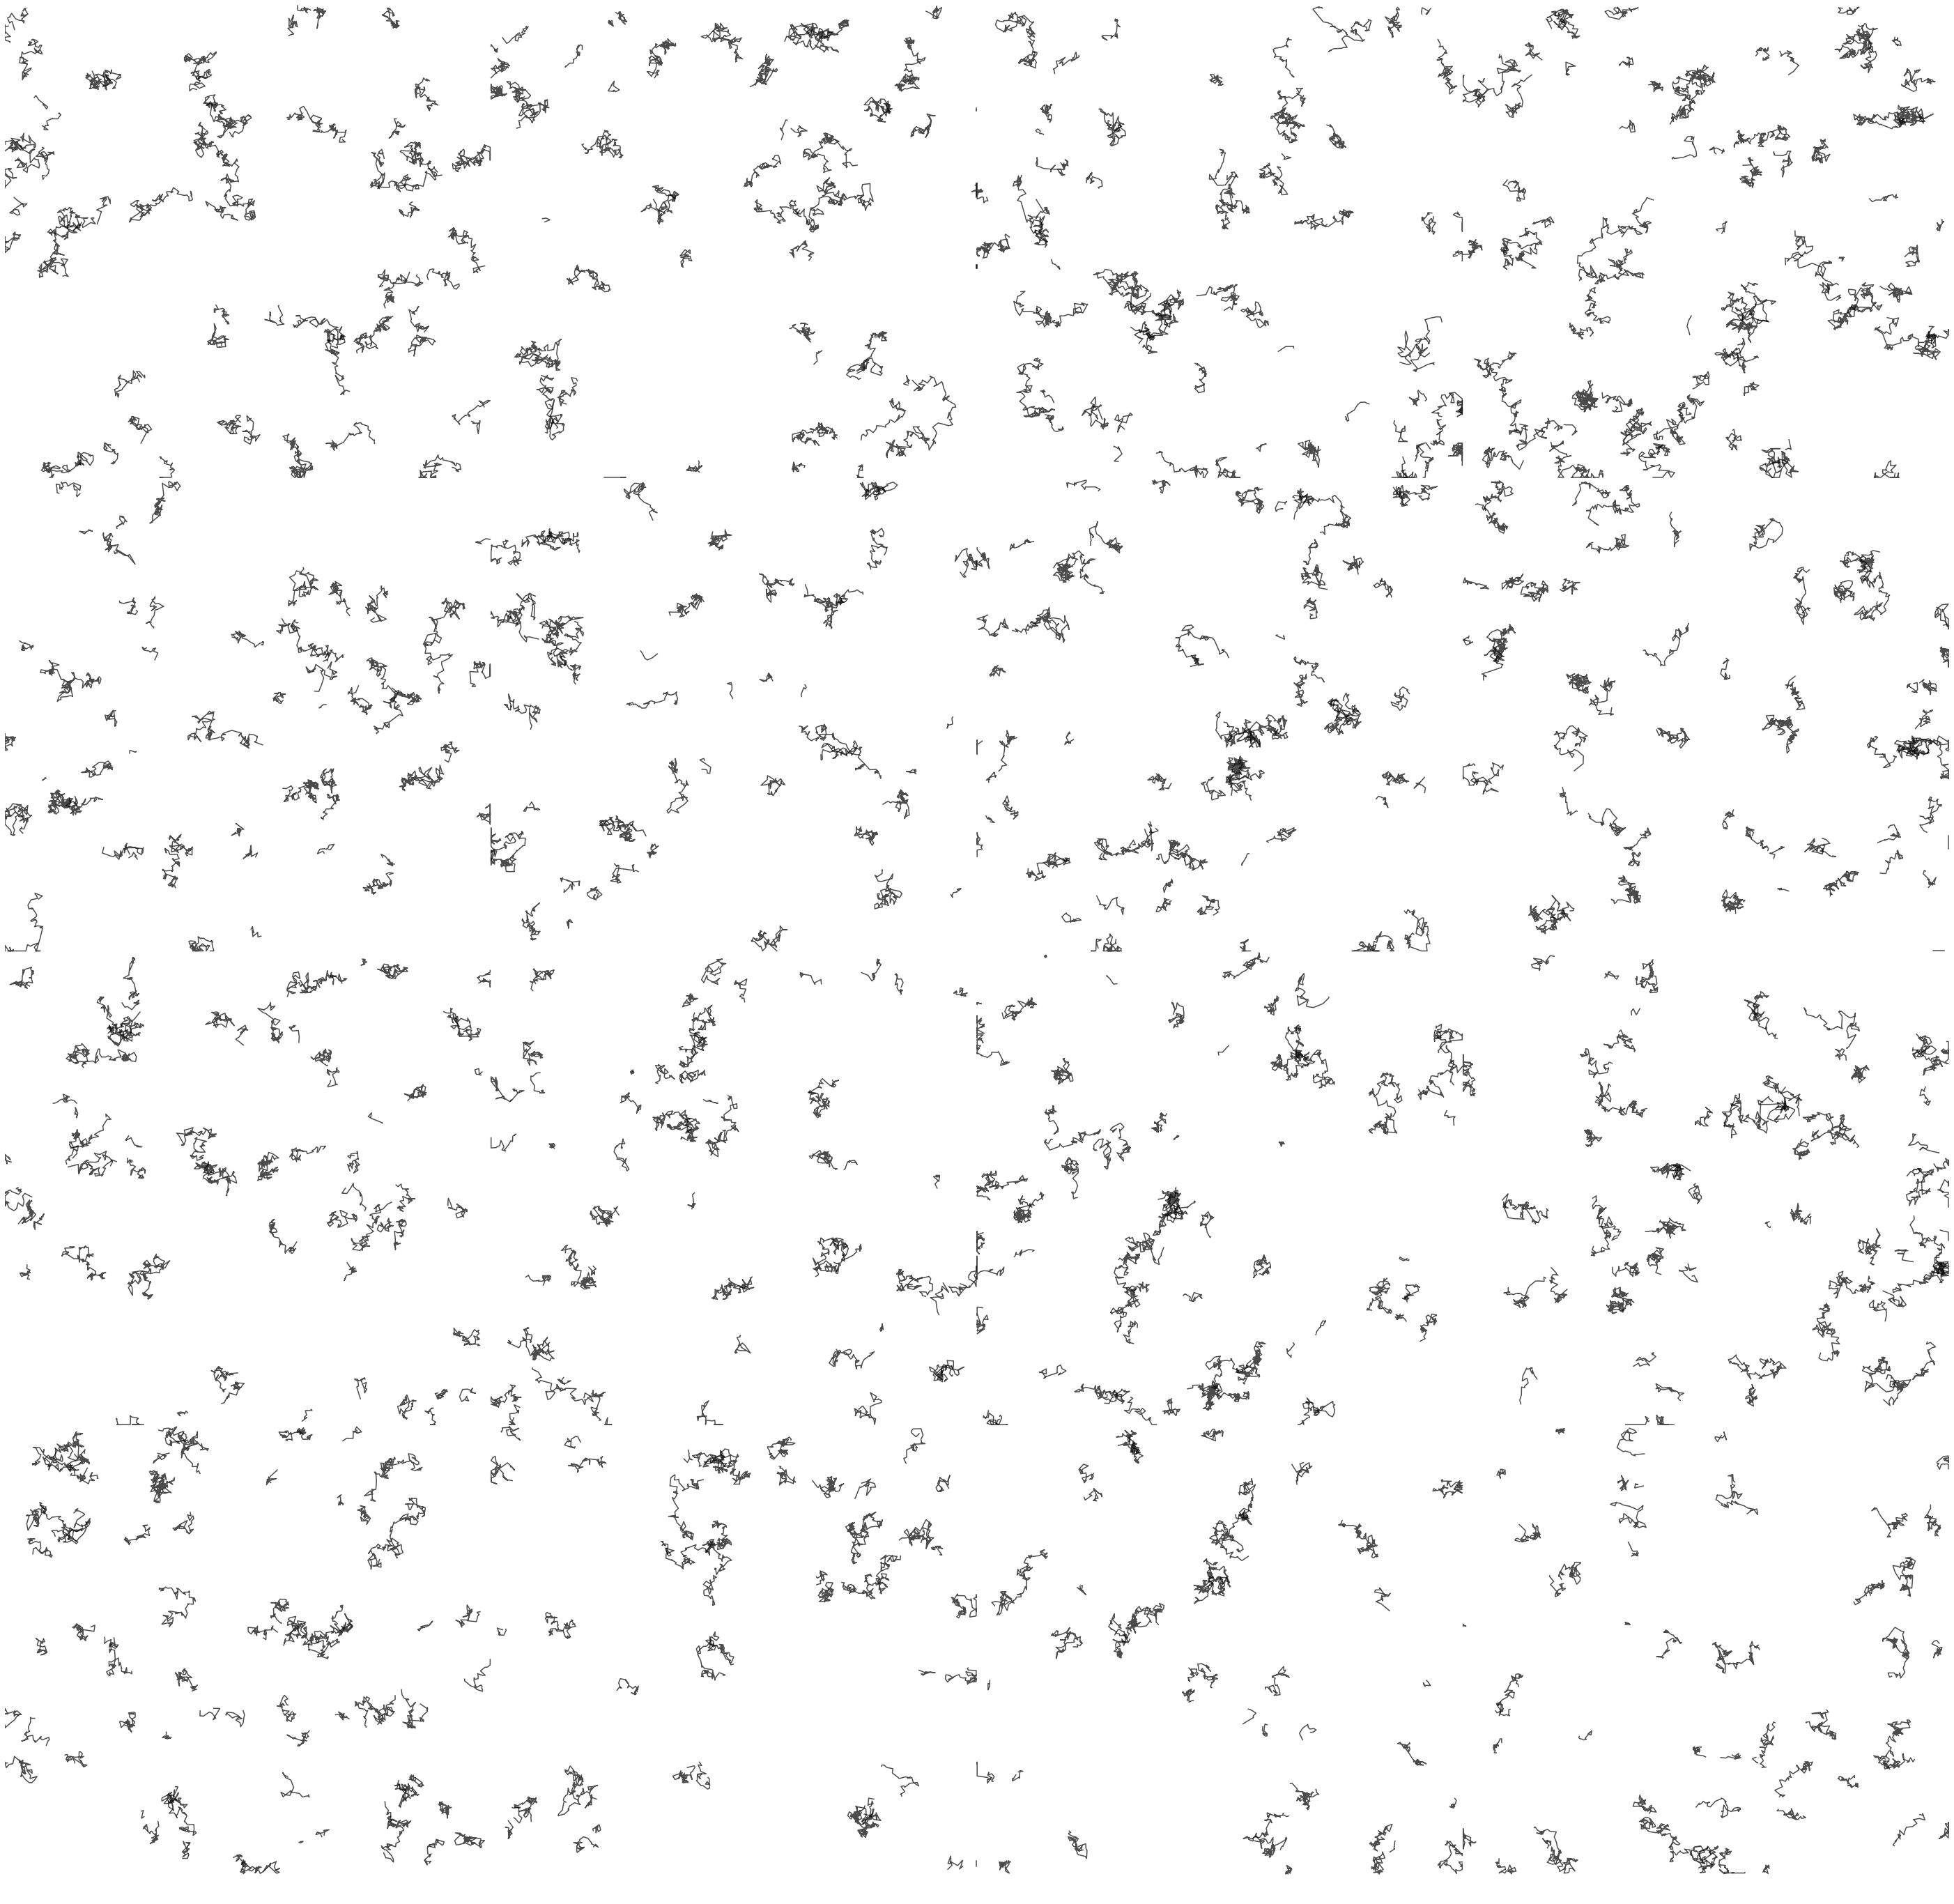

In [11]:
plot = hm.plot_trajectories('lowMP_0000', upload=False, figsize=(50,50))

In [12]:
lowMP_0000[lowMP_0000.MSDs.isin([lowMP_0000['MSDs'].max()])]

Unnamed: 0  Frame  Track_ID           X           Y          MSDs  \
3075572      179273  248.0    4724.0  477.398521  914.924534  21156.180184   

            Gauss   Quality  SN_Ratio  Mean_Intensity  
3075572  0.359288  2.599385  0.609363      333.948454

In [13]:
lowMP_0000

Unnamed: 0  Frame  Track_ID            X            Y       MSDs  \
0                 0    0.0       0.0    44.946826  1753.038718   0.000000   
1                 1    1.0       0.0    47.122758  1752.081551   3.010142   
2                 2    2.0       0.0    42.970775  1752.230750   4.299457   
3                 3    3.0       0.0    47.457136  1752.117151   6.496320   
4                 4    4.0       0.0    44.207107  1753.915670   6.462473   
5                 5    5.0       0.0    50.305864  1754.197535   8.682606   
6                 6    6.0       0.0    47.114507  1752.030905   9.845207   
7                 7    7.0       0.0    49.276775  1751.944557  11.283810   
8                 8    8.0       0.0    42.974423  1755.327413  11.526111   
9                 9    9.0       0.0    43.355704  1755.592619  11.726442   
10               10   10.0       0.0    43.094222  1758.272609  12.187462   
11               11   11.0       0.0    43.994145  1755.283042  12.301028   
12               12   12.0       0.0    39.627392  1753.211003  13.477566   
13               13   13.0       0.0    38.680130  1749.766903  13.770957   
14               14   14.0       0.0    42.295878  1750.514730  14.325858   
15               15   15.0       0.0    44.326220  1750.330537  14.037622   
16               16   16.0       0.0    44.930376  1747.808783  14.953140   
17               17   17.0       0.0    41.065277  1745.524064  14.904023   
18               18   18.0       0.0    44.113224  1744.007862  15.209319   
19               19   19.0       0.0    40.350206  1748.740395  13.854978   
20               20   20.0       0.0    39.152770  1746.122581  13.559743   
21               21   21.0       0.0    34.758428  1748.075934  12.684374   
22               22   22.0       0.0    37.586045  1747.155264  12.416789   
23               23   23.0       0.0    37.368984  1747.045510  11.567698   
24               24   24.0       0.0    38.767912  1751.816510  11.107345   
25               25   25.0       0.0    38.442519  1753.896234  10.514152   
26               26   26.0       0.0    45.690966  1750.845317  10.403263   
27               27   27.0       0.0    45.135686  1749.236274  10.490788   
28               28   28.0       0.0    44.153334  1752.424149  10.630025   
29               29   29.0       0.0    44.142642  1753.340774  10.679391   
...             ...    ...       ...          ...          ...        ...   
5738535      309195  621.0    8814.0  1668.321719   205.818004        NaN   
5738536      309196  622.0    8814.0  1668.695399   206.490781        NaN   
5738537      309197  623.0    8814.0  1668.166572   206.733418        NaN   
5738538      309198  624.0    8814.0  1668.646651   205.928514        NaN   
5738539      309199  625.0    8814.0  1667.461163   205.752364        NaN   
5738540      309200  626.0    8814.0  1667.890260   206.658577        NaN   
5738541      309201  627.0    8814.0  1668.200505   206.166413        NaN   
5738542      309202  628.0    8814.0  1667.907885   206.916262        NaN   
5738543      309203  629.0    8814.0  1667.701771   206.898197        NaN   
5738544      309204  630.0    8814.0  1668.500277   205.123911        NaN   
5738545      309205  631.0    8814.0  1668.497180   205.716781        NaN   
5738546      309206  632.0    8814.0  1667.354948   205.849779        NaN   
5738547      309207  633.0    8814.0  1668.002188   206.477610        NaN   
5738548      309208  634.0    8814.0  1667.804421   206.265638        NaN   
5738549      309209  635.0    8814.0  1667.976126   205.445961        NaN   
5738550      309210  636.0    8814.0  1668.102104   205.965657        NaN   
5738551      309211  637.0    8814.0  1668.359354   206.358794        NaN   
5738552      309212  638.0    8814.0  1667.902039   205.669127        NaN   
5738553      309213  639.0    8814.0  1668.051538   206.777345        NaN   
5738554      309214  640.0    8814.0  1668.474955   205.584169        NaN   
57385

In [14]:
import diff_classifier.msd as msd

In [102]:
traj = lowMP_0000

In [124]:
traj

Frame  Track_ID            X            Y       MSDs     Gauss  \
0          0.0       0.0    44.946826  1753.038718   0.000000  0.000000   
1          1.0       0.0    47.122758  1752.081551   3.010142  3.432346   
2          2.0       0.0    42.970775  1752.230750   4.299457  2.942103   
3          3.0       0.0    47.457136  1752.117151   6.496320  3.012967   
4          4.0       0.0    44.207107  1753.915670   6.462473  2.560900   
5          5.0       0.0    50.305864  1754.197535   8.682606  3.106181   
6          6.0       0.0    47.114507  1752.030905   9.845207  3.121759   
7          7.0       0.0    49.276775  1751.944557  11.283810  3.112820   
8          8.0       0.0    42.974423  1755.327413  11.526111  3.209089   
9          9.0       0.0    43.355704  1755.592619  11.726442  2.770813   
10        10.0       0.0    43.094222  1758.272609  12.187462  2.876773   
11        11.0       0.0    43.994145  1755.283042  12.301028  2.520631   
12        12.0       0.0    39.627392  1753.211003  13.477566  2.521423   
13        13.0       0.0    38.680130  1749.766903  13.770957  2.391735   
14        14.0       0.0    42.295878  1750.514730  14.325858  2.597289   
15        15.0       0.0    44.326220  1750.330537  14.037622  2.499505   
16        16.0       0.0    44.930376  1747.808783  14.953140  2.677913   
17        17.0       0.0    41.065277  1745.524064  14.904023  2.325669   
18        18.0       0.0    44.113224  1744.007862  15.209319  2.441872   
19        19.0       0.0    40.350206  1748.740395  13.854978  2.206443   
20        20.0       0.0    39.152770  1746.122581  13.559743  2.491102   
21        21.0       0.0    34.758428  1748.075934  12.684374  2.204568   
22        22.0       0.0    37.586045  1747.155264  12.416789  2.141970   
23        23.0       0.0    37.368984  1747.045510  11.567698  2.176592   
24        24.0       0.0    38.767912  1751.816510  11.107345  2.262494   
25        25.0       0.0    38.442519  1753.896234  10.514152  2.304499   
26        26.0       0.0    45.690966  1750.845317  10.403263  2.286083   
27        27.0       0.0    45.135686  1749.236274  10.490788  2.238233   
28        28.0       0.0    44.153334  1752.424149  10.630025  2.171342   
29        29.0       0.0    44.142642  1753.340774  10.679391  2.137878   
...        ...       ...          ...          ...        ...       ...   
5738535  621.0    8814.0  1668.321719   205.818004        NaN       NaN   
5738536  622.0    8814.0  1668.695399   206.490781        NaN       NaN   
5738537  623.0    8814.0  1668.166572   206.733418        NaN       NaN   
5738538  624.0    8814.0  1668.646651   205.928514        NaN       NaN   
5738539  625.0    8814.0  1667.461163   205.752364        NaN       NaN   
5738540  626.0    8814.0  1667.890260   206.658577        NaN       NaN   
5738541  627.0    8814.0  1668.200505   206.166413        NaN       NaN   
5738542  628.0    8814.0  1667.907885   206.916262        NaN       NaN   
5738543  629.0    8814.0  1667.701771   206.898197        NaN       NaN   
5738544  630.0    8814.0  1668.500277   205.123911        NaN       NaN   
5738545  631.0    8814.0  1668.497180   205.716781        NaN       NaN   
5738546  632.0    8814.0  1667.354948   205.849779        NaN       NaN   
5738547  633.0    8814.0  1668.002188   206.477610        NaN       NaN   
5738548  634.0    8814.0  1667.804421   206.265638        NaN       NaN   
5738549  635.0    8814.0  1667.976126   205.445961        NaN       NaN   
5738550  636.0    8814.0  1668.102104   205.965657        NaN       NaN   
5738551  637.0    8814.0  1668.359354   206.358794        NaN       NaN   
5738552  638.0    8814.0  1667.902039   205.669127        NaN       NaN   
5738553  639.0    8814.0  1668.051538   206.777345        NaN       NaN   
5738554  640.0    8814.0  1668.474955   205.584169        NaN       NaN   
5738555  641.0    8814.0  1668.609442   206.309115        NaN       NaN   
5738556  642.0    8814.0  1668.089

In [197]:
def disp_stats(list_x, list_y):
    """
    Calculates the mean, variance, min, and max msds for the given track
    
    Parameters
    --------------------
    track : pandas.core.frame.DataFrame
        At a minimum, must contain a Frames and a MSDs column.  The function
        msd_calc can be used to generate the correctly formatted pd dataframe.

    Returns
    --------------------
    msds_mean : float
        Mean MSDS of the entire track
    msds_var : float
        Variance of the entire track
    msds_min : float
        Minimum MSDS of the entire track
    msds_max : float
        Maximum MSDS of the entire track
    """
    def _dist2pt(pta, ptb):
        return math.hypot(ptb[0] - pta[0], ptb[1] - pta[1])
    pos = []
    dist = [0]
    for j in range(len(list_x)):
        pos.append([list_x.iloc[j], list_y.iloc[j]])
    for j in range(len(pos)-1):
        dist.append(_dist2pt(pos[j],pos[j+1]))
    dist = np.array(dist)
    dist_mean = np.mean(dist)
    dist_var = np.var(dist)
    dist_min = np.min(dist[np.nonzero(dist)])
    dist_max = np.max(dist)
    return dist_mean, dist_var, dist_min, dist_max

In [198]:
trackids = traj.Track_ID.unique()
partcount = trackids.shape[0]
for particle in range(0,partcount):
    single_track = traj[traj.Track_ID == particle]
    stats = disp_stats(single_track['X'].dropna(), single_track['Y'].dropna())
    print(stats)

(0.7348370792838846, 2.4522387276587194, 0.055543816222158676, 7.864355289029986)
(0.5047654145398439, 2.0371664140689942, 0.012638612909035844, 11.14829325814544)
(0.5386259542006003, 2.1431763760498814, 0.02299810227933787, 10.499031346647795)
(0.2942854027334321, 0.9965738412629952, 0.020591390778817355, 8.1444652718501)
(1.2948614006655144, 3.9787915500348716, 0.02083308226938234, 10.126730183122918)
(0.8092549164315663, 2.711861240481302, 0.026030693171387148, 7.339885542745223)
(2.997435213714554, 4.530535394779628, 0.06167439108989289, 10.138438338388424)
(0.21277885873772873, 0.9767297544646921, 0.002511050092898935, 9.858518902935861)
(0.43200219161736025, 1.3757672098298241, 0.029117652120913596, 6.713372584881144)
(0.209278250520986, 0.8565995096893176, 0.015809138156775183, 7.49927773790093)
(0.21172199686881288, 0.9641408793112464, 0.014313381046272847, 9.007182237121324)
(1.24481486569183, 3.60305764533924, 0.015011197765802722, 9.38320277051919)
(0.7865423820212525, 0.82

(0.1740719039673646, 0.7440072879590084, 0.008069222034506503, 7.474568688859033)
(0.2506542707025756, 0.9523821844432786, 0.006859905519535391, 7.234185070567667)
(0.4145304394353846, 1.8055897355690025, 0.01641479834092303, 10.28697603975164)
(0.136623537568072, 0.7013964630816845, 0.002132358414352919, 11.059341859759314)
(0.06316034810109605, 0.14730734635197712, 0.00732600732592914, 4.092700237597148)
(0.407312356356367, 1.6652061363470967, 0.006578947368325316, 9.261511162635411)
(0.09804073616070211, 0.437679916632697, 0.003187857576797518, 6.195125565117017)
(0.7842591348859835, 2.741320210939568, 0.0194086080772815, 10.394917679227614)
(0.5565189818185933, 2.080466321321602, 0.001318885840580732, 8.560693436060811)
(0.0601588416981326, 0.2976366885809933, 0.011610823478566769, 7.146336413014861)
(0.14028189316336415, 0.40323696182266877, 0.02371329409019652, 6.7045992922922855)
(0.14217651747775328, 0.5949093037942178, 0.0032573289893207402, 8.529340952674717)
(0.1964387565459

(0.19913746210538663, 0.9016592069088194, 0.01454430206487861, 10.552347958623614)
(0.6152770196307435, 2.675625321842128, 0.02494134147278604, 9.267807692386793)
(0.498989860611103, 2.66814548385011, 0.012122826782582544, 14.741641695480043)
(0.24370856579709, 1.1234607563127579, 0.01153425081674008, 8.351836834357485)
(0.695632753350382, 2.5421451135136186, 0.009649997446626934, 9.049752763833478)
(1.3118453535071097, 4.552821417308756, 0.03944154872706149, 8.995888309918614)
(0.03613604418112019, 0.077294722430765, 0.008127846988977974, 3.9458134617137404)
(0.7328927566156286, 3.0666831078327315, 0.028016021976385887, 9.735999604361224)
(0.46955613633698223, 1.8871747219808903, 0.012658955061209143, 8.511401223396424)
(3.314225218283083, 4.9771004114434705, 0.17863425166629682, 10.484483775523072)
(0.22078832002866694, 0.8319074792173179, 0.016468888882924568, 7.867791472881443)
(0.21925264201281677, 0.9796891849232289, 0.008009492443860114, 8.307448395002831)
(0.2588442048396238, 1

(0.7417278704831174, 2.558107579545838, 0.007528352259402789, 7.572981373486022)
(2.0303750265974903, 5.810516202724459, 0.07614218002255493, 10.14066511629811)
(0.5889362781351195, 1.4989643639001384, 0.062149241296445536, 6.363634347797305)
(0.3229908323867648, 1.2283569966710146, 0.015478382217196052, 6.983280079137434)
(2.9856110868473817, 3.557155677171908, 0.2671719798213361, 9.361806300497175)
(0.7658812803123504, 2.889283900075921, 0.03758688461521588, 7.802257669157889)
(0.5427773462455506, 1.9727102103638794, 0.06493731452952019, 8.40522822025679)
(0.7025046087677932, 2.8937928905039296, 0.016633307634637138, 11.490427900139904)
(0.34457948250451215, 1.5617920202734192, 0.014054598770743061, 11.966727389266495)
(1.1384571379539976, 4.206414878605647, 0.0171174473072591, 12.669539452031447)
(1.962362506838477, 5.721706387679808, 0.022448692965353078, 12.091239497476877)
(0.7830658909890368, 3.753269390974176, 0.017538401799705818, 11.977973535183674)
(0.5107664699864322, 1.849

(0.09348976098917229, 0.36601711593495806, 0.004642181592443785, 6.340077347834952)
(0.3382715507363017, 1.1800157889635285, 0.02298384858502116, 8.316627177641978)
(0.31863479520741633, 1.4709162751815181, 0.010479131529808165, 8.85498857836479)
(0.27690555420650903, 1.1378399719290468, 0.02105970233957727, 7.715242824852802)
(0.42021944547066054, 1.6564338441003705, 0.024729896851780873, 7.9827922109030895)
(0.21779007531147232, 0.8032084977260667, 0.019352386871985594, 9.583633373236523)
(0.9309506990871749, 4.0483804970457316, 0.018922444478993147, 10.304949689826131)
(1.6748611017955282, 3.556889695579617, 0.19306808977545312, 7.573458938063668)
(0.7071186643297186, 2.823260083890496, 0.015784559169556452, 7.101500156737004)
(0.6619721808962801, 2.3312351687653483, 0.028687203117443535, 10.271476558095756)
(1.7887370819187869, 3.923655393505389, 0.04740323710993722, 9.672466654434801)
(0.1402753622143483, 0.6100434296674716, 0.014565498843171078, 8.025506383697039)
(1.167018770707

(0.6100580809583156, 2.0932276490254624, 0.031590778661519235, 9.245946765942856)
(2.1173186165547744, 3.272721451749139, 0.09999999999990905, 8.24329607664823)
(0.7685502136568694, 3.355087127346891, 0.004810159462199255, 9.368889721887172)
(1.0890161382710217, 3.2769997743704105, 0.01437649851428962, 10.840898184083953)
(1.5137937519380111, 4.4083301654645455, 0.12722248213563633, 9.530295729889454)
(3.281594729494378, 4.104140819795202, 0.177821668875089, 11.335609800583248)
(0.2904925262112577, 1.1234457703260943, 0.016373669272828194, 5.998613945728656)
(3.5827526158530616, 3.221908320720925, 0.6142236024442174, 11.341344779982528)
(0.13604942666380634, 0.6723787192488945, 0.0017769758982776644, 7.053659001066243)
(1.9491382157056931, 4.905589662995238, 0.10739908154738301, 7.95426137000355)
(0.47735624782534325, 1.657339666932627, 0.045201761804955866, 7.3861903786109675)
(0.3694745541828131, 1.294245166507467, 0.026436005288854748, 6.155910088525462)
(2.3773521087285525, 2.02826

(0.15567010707121043, 0.5937206983221403, 0.01689300154712433, 6.925454459746433)
(0.12464545008608746, 0.4299158804734289, 0.031973512916481324, 5.981379772312518)
(0.6558179314190494, 2.9131155348667854, 0.01877585820564119, 9.414948735106764)
(0.22689967534248906, 0.8883066407219328, 0.0053364826817062, 10.0)
(0.9455945900438048, 3.9744088152914756, 0.03900844698107582, 10.629926988707373)
(0.35587090688786926, 1.1205955803298167, 0.03179043721950183, 8.421387852067296)
(0.17024233730057695, 0.4584089981295944, 0.02544551724916718, 6.339030898081693)
(0.06449530785002298, 0.15336352677078138, 0.01137776709239436, 4.600062660301185)
(0.42428052245022174, 1.7838499229939055, 0.013551454753491319, 10.074008340583845)
(0.9611387777424465, 2.853946507702256, 0.01566379170044414, 8.704466094696654)
(0.8324508342780066, 2.638456006250945, 0.019490827972704346, 10.88101880365081)
(0.06468302769470324, 0.26126670469420843, 0.005923744903108586, 8.345050484214454)
(0.16227807622642204, 0.3083

(0.09555746281241173, 0.47612963606392467, 0.012787896938994943, 7.618128068666785)
(0.280291840303237, 1.0017801313789638, 0.009630331606428824, 8.012576420325185)
(0.0980327692892038, 0.3418626186004737, 0.019067149458918475, 6.797284538940429)
(0.13383544464679473, 0.3545029530836485, 0.0312872106453715, 5.691787902195466)
(0.37544586413373005, 1.9235068528778068, 0.01438234176857893, 10.23291909803043)
(0.9261972989147592, 3.1111496200496225, 0.017255152834749106, 10.298866988415304)
(0.2623815374654394, 0.8356126024297915, 0.004597076613159123, 8.187789139832665)
(0.29156933026735793, 1.0784762664831, 0.06502807373301939, 9.943617821190122)
(0.46765874805847524, 2.5444186982004546, 0.04867096676133732, 12.0652975856386)
(0.1815564108547309, 0.6006291583585239, 0.01927568093513096, 7.140586923228557)
(0.9645213031786988, 3.0081281452740765, 0.028947215320391916, 10.554698467340176)
(0.10082318605608302, 0.2531775129675893, 0.0021691973967108424, 5.907142825112452)
(0.42063103364384

(0.5048014664743703, 2.1065350531595985, 0.011672077042465402, 10.73520248205626)
(0.6930772892348201, 2.391716130837765, 0.02323672906979577, 9.998315032044676)
(0.1287373995682688, 0.6790007713441737, 0.00916190084181766, 11.575012150443301)
(0.4460410829489635, 1.7127520902023459, 0.028766831105969733, 7.891327370790212)
(0.08915174945167097, 0.3011837368634672, 0.018385553636331792, 6.1034059151909315)
(0.18641015935535607, 0.6991026523729486, 0.018628215242103046, 7.818601324606044)
(0.296125726121864, 0.9222157600390561, 0.01567578372699252, 6.3158107814535445)
(0.7011653680649175, 1.7505593248893085, 0.021253441492818038, 7.414993387583654)
(0.1895974263026575, 0.9087823030761558, 0.01861373332911104, 7.672428646715657)
(0.28951460717392963, 1.2287961690682465, 0.015175643694550232, 8.46099408461367)
(1.1721149169691585, 4.184951797339305, 0.04516415200842634, 9.18390044743821)
(0.7341060481174799, 2.1906724930965584, 0.08176976398403586, 8.172473037028466)
(0.20599726324560153,

(2.436057302221967, 5.752223383503246, 0.03846153846143352, 9.490546283468037)
(0.3549382716049383, 1.2822638495825023, 0.013043478260442498, 13.0)
(0.09373499721980541, 0.1507942016849405, 0.03835079144095087, 3.6603955421500842)
(0.41388497076940595, 1.7898087892655614, 0.029741561291839167, 9.94058537432435)
(0.7228841838342694, 2.4633980988825197, 0.06891419919661998, 8.894983566765497)
(0.7838682671920557, 3.0908493168914823, 0.0633603066961841, 8.110187672123905)
(1.101689921795679, 3.5917034719921834, 0.0179904668150276, 14.922296368957083)
(0.3256550469478652, 1.5665410757232499, 0.019579514625612252, 7.75595141065572)
(0.7783930722167401, 3.6438711605564373, 0.030314478568081196, 9.129686832907314)
(2.0772709663734363, 5.112535545810151, 0.06646430004956845, 9.154931302335203)
(0.39124359092469024, 1.4146253655021215, 0.030927925101475708, 7.55815435583035)
(0.2570474867738708, 0.7653298620371427, 0.05400754417530687, 5.700007002109753)
(0.223309659235631, 0.5092675504383369, 

(0.399259038315112, 1.673412833554325, 0.011793202526554846, 9.067609306203364)
(1.526576855778513, 3.323025845360621, 0.09972042002193292, 8.089878018029246)
(0.14305279308730814, 0.5911993678679006, 0.009834636051692193, 8.26550334883025)
(0.40341232970682, 0.059236919047169746, 0.014187932434990502, 1.458790324408169)
(2.8152120510788357, 4.352238920495174, 0.03901432794710776, 12.349155203483225)
(0.785084582997329, 1.7437537510953827, 0.07288355480929133, 6.641815761821077)
(0.8070027092285822, 2.8867291439034957, 0.021956091627752035, 9.139412019530337)
(1.01559679927042, 3.674097928410371, 0.051915264273565784, 8.217194129293642)
(2.8987624581276, 4.637378728721563, 0.27417184877983314, 9.016066617088658)
(0.6213930070828755, 1.9573677431259684, 0.05631174913995047, 9.814974456536955)
(0.44091865467803903, 1.9788737048180625, 0.011106432709776792, 9.590240323533274)
(0.8475646998960529, 2.9400136337848886, 0.01868374021679447, 9.150279250829524)
(0.585645787228004, 2.17105165091

(0.7175137993513215, 3.359223234457544, 0.027041765870865837, 14.051289335741746)
(0.7316942914254887, 2.836809996692721, 0.009326545292888492, 10.56578187481163)
(0.1236088253695824, 0.7359674610007666, 0.014491232379547818, 8.808830595656696)
(0.25758466518761025, 0.9754266518569211, 0.012633969942969477, 8.951327718877035)
(0.047984916750109026, 0.17678839078568695, 0.0047739521285293405, 7.644587867998901)
(0.3517613377542161, 1.5130460281103064, 0.006817121712827385, 11.041487295496957)
(0.43208558081734566, 1.685470075284421, 0.0018012419190353872, 12.622487225789781)
(0.42647882735623516, 1.481014177487961, 0.014894654865140676, 8.14961317316624)
(0.17605452749906245, 0.8949057458486016, 0.02290227007891106, 12.258758660715634)
(0.5156261927126494, 2.1257948122062804, 0.02045860032666963, 9.655239234539781)
(0.2515065416987804, 1.1336348680047956, 0.009714811841524009, 11.36535306146441)
(0.36588253385503866, 1.3600256242230209, 0.008110774710460057, 8.7379042241148)
(0.35853699

(1.1196797184193976, 3.997902548114971, 0.035092682045445765, 10.352996729673258)
(0.09922915610888504, 0.23047690146988478, 0.00962220278304059, 4.55906016469144)
(0.8221369353409145, 2.8210060739754375, 0.024407110574498493, 8.13598073703532)
(0.5043025173276249, 1.923537449793767, 0.006730641193833916, 8.955013070234097)
(0.2708337990392656, 1.3355128414696316, 0.02197163947738002, 12.636659215257566)
(0.05097962714637907, 0.16420082595047278, 0.00859689644079423, 6.85530761698756)
(2.635581176329697, 5.165748475826435, 0.02482444548624499, 11.560715749395822)
(0.13687569921123396, 0.32327999562103815, 0.031561152306019045, 4.637352953559528)
(1.9890570252752522, 5.296097004422303, 0.04307766345276777, 9.014643170281188)
(0.6749798832759318, 3.166116776338816, 0.03703703703672545, 14.476454932606764)
(0.4633591662040054, 1.7744472645897875, 0.00842361319391582, 9.024072359672461)
(0.5311284992186227, 2.1179511596304965, 0.015873015872557517, 8.61069872031223)
(0.24806039899204466, 1

(0.06525953330853668, 0.30793101598550404, 0.02824936421721095, 9.48416414220358)
(1.8120519689693124, 6.504554262983571, 0.04577129101742234, 11.007901972931698)
(0.764061866996311, 2.447536616115504, 0.010001038357150228, 7.832261359885055)
(0.5793149921852079, 2.9672064506635105, 0.021201413426979343, 10.0)
(0.6048385569579686, 2.511644810926201, 0.021473652609388282, 10.272418000858279)
(0.24680620912897186, 0.6725470593366123, 0.017699115043797065, 7.180487278631053)
(0.5632027325001724, 2.3876240165166385, 0.013699092562037083, 9.57303665526263)
(0.4408622037071664, 1.8810091797416624, 0.020458334945981718, 11.84869440015108)
(0.6509324527657918, 3.4458446552511766, 0.001754025174452746, 10.490570538915351)
(0.5263122825425673, 2.8335373575413976, 0.03548949815404259, 11.551959418820353)
(0.9697154398642628, 2.9421437832819457, 0.00863336837980333, 8.596932701634547)
(0.17935382291376942, 0.8384303625870686, 0.005613778635950122, 8.78398843713211)
(0.2314358246368812, 1.150501247

(0.4454354238446375, 1.7380068138808353, 0.014976227250558779, 9.268705317749836)
(1.4217190487417763, 4.503336032629042, 0.05368969808510801, 9.963244653918236)
(0.22924390142064657, 1.0541810799243752, 0.010320017571898139, 9.060496397334385)
(0.14710074471826, 0.7445178831077717, 0.016594508328838787, 12.002962382895081)
(0.8106637244008558, 3.1195427534760114, 0.015158041354850486, 8.611825169944186)
(0.3964138972918025, 1.2394871669816334, 0.014138596027316982, 6.8528813023614195)
(0.43423737048677363, 1.6723110665094145, 0.01634970481330954, 9.831299030917185)
(0.8519671074446331, 3.4484675672620977, 0.013249244391984001, 9.826931757234345)
(2.072943022069318, 4.4635925552220606, 0.04010531247945518, 8.126850193967329)
(0.6454472357075481, 2.800623613516623, 0.0659792845276849, 8.35783822090308)
(0.8501217934921064, 3.3048745834660864, 0.00461831594903401, 12.79235438877238)
(0.5005472590085733, 1.981337550478833, 0.03895500592808594, 10.48891531678276)
(0.4731306067113027, 1.661

(0.33000595358981644, 1.4222133511192938, 0.07547169811277854, 10.0)
(0.7635517343277253, 2.74908660658004, 0.055174794404448536, 7.562975649886627)
(0.16822409340233904, 0.8597528085860104, 0.003498224029599434, 6.785415444880155)
(0.2972215857830549, 1.34467628336814, 0.02295285647091776, 9.698913321055711)
(0.07816105235466514, 0.2914536669857279, 0.01422443682375884, 6.639278790301675)
(0.044841347219521745, 0.20101585916934145, 0.01010101010069775, 7.4874768485389716)
(0.1459068412764992, 0.5057326340406326, 0.0033942700803116263, 8.847748973547112)
(1.6865487154200058, 5.589068516557713, 0.09127390565869054, 9.407757558222308)
(2.2519375087477003, 3.6012229150517236, 0.11822879338319378, 8.926451411198496)
(1.430231169461068, 4.47583361230195, 0.06625068856756161, 10.094900489658261)
(2.0874981850527297, 5.200899402158166, 0.08154342999563235, 9.436937889429819)
(3.1441962069013147, 3.3979996914504946, 0.07469654653802854, 10.157835135272569)
(0.7332397913833538, 2.76462680658195

(0.23050468422878168, 0.6986016789688954, 0.010290861279265682, 9.261156851072336)
(2.065575919769837, 5.263378309764766, 0.10412878947221621, 11.528930696851699)
(0.8118450869989836, 3.8459339631494425, 0.040006151935227593, 14.596464915867326)
(0.17780207761977834, 0.5914352662373652, 0.02023804245470577, 7.000776268194482)
(0.8555120277206275, 2.998817399321996, 0.040288673796617866, 9.616874344311787)
(0.7082413016786517, 3.349968013971316, 0.03505614653169853, 11.298419824272353)
(0.27517310888312035, 1.245908958132941, 0.0118626782244458, 9.654918604984962)
(0.4987933864005401, 1.7865825228199925, 0.004347011379444026, 12.256252805572744)
(0.1840335801940598, 0.7024415485756609, 0.013137272325951377, 6.462014737103429)
(0.5268985513525598, 2.5483515687575555, 0.06432831640435102, 13.600849005826646)
(0.11922195642142468, 0.5772629932534611, 0.0035211267600061547, 10.0)
(0.4172363488976028, 1.5068479198833216, 0.020401196369298543, 8.695497159743786)
(0.29809654128817803, 1.379060

(0.27746183535944263, 1.0290907700841905, 0.015727955256660868, 9.770700807592528)
(0.22135281697309098, 0.8710838889263477, 0.01916992254545989, 10.172628152280026)
(1.5579858522282375, 5.4428766328237055, 0.005665247392424022, 10.923200637585921)
(0.1969666461975603, 0.9346350984267807, 0.008360623355687704, 8.12271057857591)
(0.8696976145145907, 2.4020570208220073, 0.013682190966513076, 7.759643098666622)
(0.9170896331583825, 3.3998223799308764, 0.004432608108407803, 8.552726706794449)
(1.5149963035578513, 4.870136743794137, 0.0504487496658624, 8.928753492172175)
(0.5002478852953668, 2.904990805344844, 0.016393442622302246, 11.619701310676291)
(0.3593522308788716, 1.312420845621792, 0.015152346654438141, 11.500079677096359)
(0.8190238534734274, 2.9039508762876594, 0.006453043784454745, 8.20330564630731)
(1.9557661277964091, 6.1426649307331225, 0.05190931692559922, 11.577429465934069)
(0.07174039272065545, 0.20661631420338833, 0.023824777387531512, 5.833198598932954)
(0.5154649910478

(0.5156698888430794, 1.897699736485223, 0.023710147614152896, 8.52047647284417)
(0.6054776375438952, 2.185024014886673, 0.012475945702051816, 10.746964122194402)
(0.24494202055136519, 0.9894549167482793, 0.037341586972377355, 6.405033005958614)
(1.6863454804350093, 5.250045990779506, 0.050579833206796564, 14.999617838612245)
(0.1693527949327138, 0.6233790771344473, 0.0034781067194635204, 6.127585661764486)
(0.40213325016792867, 1.7819003568583858, 0.009608335444401598, 9.655354558500528)
(0.4131993750475705, 1.8944220655211195, 0.011069714605968695, 14.548990823494636)
(2.139596161731529, 6.467052971183518, 0.07626701231375181, 10.832816356490152)
(0.32461580554154923, 1.4180805996170855, 0.01570880200054976, 8.968198474925519)
(0.0918669283048249, 0.35908057694623274, 0.0071065122697242114, 7.520076780126223)
(0.8656641639438211, 2.7734302382692158, 0.004691008638199527, 8.9086230126102)
(0.4106691035870671, 1.823669668394392, 0.009748005607885996, 9.35837456662675)
(0.132426087565409

(0.2856573337810292, 1.0682817536454234, 0.010024304788675229, 8.026571881078148)
(0.552045358111347, 1.9950306106822104, 0.010204623312286014, 8.69665324608709)
(0.5679882517187824, 2.339363508061643, 0.029011460733185727, 9.50230246215246)
(2.3674433607929535, 4.3490145271149085, 0.07925598069994992, 9.788612442152463)
(0.35351800990592286, 1.8571675540508552, 0.014051335533258056, 10.394989703684502)
(2.208793230618288, 4.979738975230008, 0.03831596571727086, 9.233861122994266)
(0.03427462595720212, 0.12345189680286732, 0.004215807327211126, 4.37119476898343)
(0.29857497434295843, 0.911734968721001, 0.03362634218440772, 5.6316194597812705)
(0.0721167301942547, 0.23762764732723562, 0.01306815154366913, 6.050861268454097)
(0.4292784952296956, 1.679911449547084, 0.01564430771436693, 8.165425607823154)
(0.7700496310518149, 2.673171434318266, 0.026271033510210637, 12.632996593223938)
(0.18357666322768967, 0.5978657794562747, 0.025269720192937425, 6.439797231529314)
(0.11020966425793478, 

(1.9749023620613035, 4.059850647013866, 0.08892762692060738, 9.527696465854138)
(0.12198958828517088, 0.6026658766214807, 0.024957602407120198, 10.079931141433583)
(0.33150674949710746, 1.36890088039384, 0.015625, 10.129815491800938)
(0.10465275650739127, 0.349868857831368, 0.004683757760776301, 6.526305037296454)
(0.22566312624592863, 1.0249935827953882, 0.02676065309705922, 9.536166708735927)
(0.11621088508864559, 0.44321171633122736, 0.025542655367350387, 8.742245924406909)
(0.4356489446919201, 1.8580789484873022, 0.007997177626412017, 6.741087112284605)
(1.122910826827238, 3.4605740238108114, 0.018326508589364115, 9.114220300244092)
(0.7945281259820617, 2.2019065441669508, 0.02819738989312195, 6.3247786180138075)
(1.217502631359403, 4.335452022505749, 0.018467211604421347, 11.665208081227364)
(0.4984107817433511, 2.2422110620004827, 0.06229799192410358, 11.480018792281914)
(0.8187162892978361, 2.8404446441129854, 0.009416270714500024, 7.608160390096134)
(2.1666416857876514, 3.95034

(0.5894175657510011, 2.437771425369293, 0.05483768790288956, 7.506117972855913)
(0.34273849553542546, 0.9083703784517551, 0.031526419195100984, 4.6119848065771185)
(2.063364568088062, 4.582892632549739, 0.04826159220198882, 8.686744839994324)
(3.341851445510946, 3.738276324194641, 0.22629501825917311, 9.451103470887796)
(2.166095195222631, 5.585882702013425, 0.08138231795870608, 9.488606982270769)
(2.847905489724277, 4.787188747862267, 0.07399261995451806, 10.334765083930378)
(3.25305259102882, 6.704842953004463, 0.112487856892036, 10.021898612829439)
(2.529047223129229, 5.9191490226262, 0.2135971364069376, 9.9336347035614)
(0.15957956626887634, 1.1451141873424853, 0.024712968274177315, 11.976020625131785)
(0.4032570624109291, 1.2262788064869812, 0.10759496330686998, 7.389729725795897)
(0.40857520959040755, 1.838284061885949, 0.04471876423881356, 10.80652530555121)
(3.024868871824117, 3.698628194023166, 0.0470615744765658, 9.768497050119482)
(1.3234647998083857, 5.271250488068117, 0.03

(0.5972028386182564, 2.4260726422849572, 0.018940988017361885, 12.19769964980255)
(0.16593744682059003, 0.7103714642720343, 0.004515171952014212, 7.258996396791575)
(0.1904672367744947, 0.6186089769569784, 0.00887391185040094, 8.60887518696624)
(0.4481212437597614, 2.0362713624158757, 0.02332656130661262, 10.548987719002977)
(1.4161426460275446, 4.523487485090159, 0.07859681438220237, 9.885393697488167)
(0.25172827183367635, 0.7208757858885559, 0.06275930734079715, 6.661678469453176)
(0.2735074003962513, 1.1790614258775125, 0.010451720446142124, 9.130342619580638)
(3.3381074215422437, 3.734982252389541, 0.22456095665441006, 8.745126512128541)
(0.6342733521823426, 2.0521072478952513, 0.043926591619662, 8.417562372666508)
(0.6109003699702684, 2.2801059373664443, 0.023545017132064017, 11.882589375542317)
(0.27371183150096906, 0.8004201468048423, 0.010920764730065244, 7.591332931374672)
(0.9700015642437024, 3.9681043447446367, 0.024402824955056305, 13.495377016598988)
(0.8769717879519625, 

(0.22566006948034537, 1.2011281481272928, 0.02649006622482375, 10.856410011485224)
(1.7871917530235966, 4.754901643207204, 0.07921981214171392, 9.532805610199004)
(0.38983902416532795, 1.2734895634424357, 0.00987039167961389, 8.475718149349847)
(0.8571708983421101, 2.6471433819844052, 0.06827842417068782, 9.180613595013895)
(0.14931956799445445, 0.5566295044560224, 0.0036671179868289047, 6.257182584782508)
(0.6745063301711552, 3.1511713549981186, 0.023050524334884918, 13.553576148766957)
(0.9335805424737679, 3.82045980060127, 0.023375477853848536, 10.384397372822109)
(2.7310613208017247, 3.8359558292977827, 0.15089980989004217, 8.173826867361463)
(0.3712310999147887, 1.598624638870653, 0.01239326390030029, 8.453447319222358)
(0.22291497402775315, 0.9118168696292992, 0.010541020227349103, 8.213600772290317)
(0.32236665332368536, 1.2878612733091583, 0.006740205723175658, 8.257202814981508)
(1.7834284119499797, 4.339189365389369, 0.11866862840914702, 8.619099038941984)
(0.2050558947826978

(0.5356888114008026, 2.10566401582082, 0.061346496977492546, 8.468211279058664)
(0.3515103098001701, 1.1813509767490495, 0.029284406835465012, 7.864506335347714)
(0.3744234366966313, 1.4907189173119044, 0.014415933679439698, 7.921377592871898)
(0.13324227876415462, 0.48750316685424266, 0.004366299089939755, 6.366764461909976)
(0.4195923728836993, 1.2809006596465131, 0.015031529193014008, 6.908115603678771)
(0.36098371413072816, 1.1326713844196603, 0.06269394914323971, 6.66520534706205)
(0.07747198934774695, 0.27002801702455514, 0.004728022411619445, 5.5631404603552905)
(0.8039957795593979, 3.2570995680047123, 0.009961903470999078, 10.409871630218696)
(0.38602277395465767, 1.7200155965644846, 0.006700097163462038, 8.601384326247937)
(0.7440302915356032, 3.1305464355482453, 0.020321780298708, 11.01666064620484)
(0.572656074687904, 2.3616360968177794, 0.033296582538340704, 9.843099745058037)
(1.9354049736242125, 3.8803645814218664, 0.02613525449123537, 12.058744103404432)
(0.4660528001606

(0.042020699543912875, 0.1255195218188836, 0.008098665444407844, 4.392130993678513)
(2.7084226043095487, 5.38122309968737, 0.13117849223620714, 8.635208183674353)
(0.24796539098391177, 1.7691704840572138, 0.029084153097163005, 12.041555655311075)
(0.5786997406736062, 2.443753677511606, 0.020648007287743797, 8.375673120021258)
(1.787092873990308, 5.028064111782863, 0.050779835354565074, 11.468418391226452)
(0.4608489894481164, 2.356220953408055, 0.008057557339607448, 9.497352615237796)
(1.2293437868310721, 3.293924265214277, 0.03772563571717648, 10.802710463911037)
(0.005424376796727024, 0.0024046201463265057, 0.0019048299908656465, 0.7935102104916374)
(0.3617264824056113, 1.4613823499418022, 0.016347091000180006, 8.417526464451287)
(0.5315298118245306, 1.839363462210378, 0.025096825876618226, 8.399604983141321)
(0.12314183999504198, 0.5613561202451471, 0.015135478798221209, 8.792468668111697)
(0.20658893255795224, 0.762552002504474, 0.015363971783569954, 7.8901886022516035)
(0.36967602

(0.4139509064015615, 1.3168980244155768, 0.036204154883640476, 7.260785675778074)
(0.12099907758253553, 0.4719822015841307, 0.0039879975335353314, 6.569510479998017)
(0.1425041097438482, 0.671382354654271, 0.014822010036670436, 10.056093106203338)
(0.24895789295580106, 1.1588415489665567, 0.021690492722844533, 6.676766635158694)
(3.3592351953661725, 4.356182373144293, 0.2777173819657454, 11.402999096932069)
(2.7677449772061875, 4.233046638050866, 0.2452664682963744, 8.477714651867648)
(0.8785722030821009, 3.6485922908741126, 0.040217547758509706, 11.116078869438134)
(0.5917748467235097, 1.8614098601605171, 0.023529411764570796, 8.0)
(2.5318037216838225, 3.2939655197576623, 0.054802580755332814, 8.629643865207854)
(1.923397665482902, 3.217845040641405, 0.08052697775523988, 8.883004161862358)
(0.22978176778763612, 1.1323306500578587, 0.016010023055841205, 7.333721759425695)
(0.6038023431924732, 2.5647547887152773, 0.022470394484967567, 10.723666464573075)
(0.4989981573107462, 2.248075002

(0.12084244105667319, 0.39376884888127944, 0.0015426079493524932, 4.458050585475651)
(0.6920924552616772, 2.1396071744687664, 0.010755344936121522, 7.656594259415266)
(0.45875215200187647, 1.7708693631671177, 0.012749868651484213, 6.754398877335303)
(0.46413385715087385, 1.8013868937797215, 0.018749100589363105, 10.131085664379075)
(1.1209453597055006, 3.4241177475918843, 0.01128419638762144, 10.589107207128507)
(0.31539907155396657, 1.4021962283137455, 0.004151113506275556, 9.736606828004044)
(1.7939149618931862, 4.73912724365368, 0.05098700429251858, 10.229542859094703)
(0.29854687599459767, 0.9864953677361676, 0.018464267675356336, 6.666742352216449)
(0.24830375767750398, 1.316727047829932, 0.005005112354416647, 12.256308390337491)
(0.44719978651040215, 1.7177707148935686, 0.00868388424200349, 8.780616822160406)
(0.10618501837482912, 0.3705137665474447, 0.016455941814392815, 6.249217180975503)
(0.4769925681210759, 1.357489528774825, 0.040021495626604946, 7.694045975171449)
(0.163195

(0.352433460146523, 1.8456610018241943, 0.022632414011094323, 14.706728244668405)
(0.539051267231152, 1.8904548266650454, 0.026930411583932955, 9.170681829596472)
(1.1394095284548007, 3.437791926549305, 0.034019280702811766, 9.65598518763849)
(0.5220739139296768, 2.0653963990627657, 0.017155893396094947, 10.180206440388016)
(0.3650737648751267, 1.3423119390103022, 0.013953488371726053, 8.3292523344206)
(0.631864973757832, 2.4537131000419063, 0.011589740660855557, 9.274960720944026)
(1.2529557838534064, 3.071606085093137, 0.018427672907413477, 9.553657071711285)
(0.22187075293790032, 0.8454035294463167, 0.020619365166658694, 9.177737503123046)
(0.16307562996169125, 0.8913162220754225, 0.008426966291835924, 10.24593047456243)
(0.34953949151105757, 2.2904733739128966, 0.012875190464157485, 14.443576106277805)
(1.511611223493757, 3.6965890173118483, 0.11275681528169233, 11.293989524349358)
(1.2643497250357467, 4.192826470962343, 0.008174589962421406, 10.248948591882217)
(0.7611267832197813

(0.46929306430897694, 2.158290190342014, 0.0074190134934693725, 10.890106671172253)
(0.2934181574138099, 1.0004032179772566, 0.009469978890699, 6.87173831181293)
(0.24135827875749322, 0.8665299328125426, 0.018966459463462114, 6.922641113011626)
(1.8975773700806855, 5.804916874252761, 0.12830061611661459, 9.984326108628627)
(0.4358026036857452, 1.4741064123573335, 0.016199194788197046, 9.060460509806427)
(0.26336256413909215, 0.8788448264357622, 0.01106811326532285, 8.577327134117274)
(0.11403889454053866, 0.1224209795798658, 0.05863649600456156, 2.9405941560229842)
(0.4378968252946711, 1.5822880842668892, 0.02127659574421159, 8.219228373728095)
(0.27242481875455604, 0.9713341604430039, 0.004674846148287013, 8.696001308770077)
(0.21215730071875277, 1.3207872823172595, 0.025486037694535866, 12.352040412752698)
(0.3765473503162737, 1.6708690499286551, 0.004608294930676493, 8.742920273815843)
(0.03469007933463202, 0.13811029844112988, 0.0001811193733991216, 6.258719053900084)
(0.5586115666

(0.06738370357576878, 0.3186259273893227, 0.009409948206459507, 6.540732206870312)
(0.32632915929785883, 1.1171039985602549, 0.06722485746904476, 7.539587454817195)
(0.4166912105487047, 1.806944082657987, 0.016846604466670977, 10.85686236760568)
(0.07803980247031489, 0.14531358622352292, 0.01337718594457562, 4.513612982590435)
(0.9755439511037002, 3.6433882671719466, 0.01021743232473671, 11.241951576630893)
(0.6542929691477241, 3.096909188761274, 0.012280474801462464, 10.527928484142981)
(0.65500873391844, 2.162729170773816, 0.035341105574193704, 8.05338827985256)
(0.2731718857952384, 1.2478758905563172, 0.027727710545093837, 8.090339107865795)
(0.29716119458896295, 1.3184950422495174, 0.01504884274866194, 8.121002683927012)
(0.1866325236626707, 0.5797048349563899, 0.01041214873677435, 6.360570573148031)
(0.3439783881486759, 1.8460523759254353, 0.029905020496966656, 9.369081052454561)
(0.6959517986469156, 2.8881328286034487, 0.006289308175837505, 9.372952951641375)
(0.4601676152675758,

(0.6668712427198459, 2.201796555178599, 0.03610395032566878, 6.928420560146334)
(2.5949118201262924, 3.4917657114485436, 0.07708417763515077, 7.1722292411758515)
(0.37482129613266063, 1.3832176319496499, 0.00969534474961852, 7.056143405289161)
(0.8091043547841404, 2.8128351481902003, 0.013544119316963607, 8.199687812312487)
(0.856473749687596, 3.0489287591694567, 0.011991485596595321, 11.11157158807515)
(1.236378089029544, 2.7385712238038193, 0.03136104503589513, 7.806313255987414)
(0.037458150280466875, 0.09568964976666175, 0.015977861338225388, 4.598007837097771)
(1.1668740130624937, 3.8180360428062032, 0.06993519809702164, 9.535603809581946)
(0.16092456516876963, 0.5995869345946887, 0.018237734559858026, 7.155158609407536)
(0.7743948137998058, 3.13132750415104, 0.03050223530410876, 10.121002819624001)
(0.8999931475490632, 2.2253224953728186, 0.06416524778096659, 7.3294694210224485)
(0.05880820304038581, 0.10935286044002063, 0.03249675960742803, 5.052043243344647)
(1.3449752475321712

(0.5988047112036077, 2.0201865639572443, 0.024167423991128735, 7.425929324785539)
(1.1210664392687948, 3.3604193696978517, 0.07582184921327881, 7.745273648048991)
(0.4849762183955052, 1.8988777665234842, 0.002027937591986036, 7.941601458988322)
(0.2761284028555703, 1.132889233905696, 0.00960544582980312, 10.585603449661264)
(1.4740846608977263, 4.729344126779338, 0.015126170292959349, 10.375479122225956)
(0.1613492109073562, 0.7497893492672382, 0.008910790760025466, 7.866454587829411)
(1.2532969992137153, 4.318506959474133, 0.03940158315938931, 10.492003460746766)
(0.5420234442158434, 2.347493163557673, 0.0022523602316637395, 8.78831885876771)
(0.35090414038501955, 1.3885716557732652, 0.023337134052330673, 12.555628760462746)
(0.3137573560247285, 1.2390493187394642, 0.006981770425453869, 9.130257326603143)
(0.40279104158484164, 1.7021030078991637, 0.005407817860057801, 8.80212272453223)
(1.2295701851212457, 4.193929955512732, 0.013773387445619074, 9.61386537614681)
(0.13937194359723992

(0.05691544838469915, 0.21937019777233024, 0.011281533754287415, 6.709939965278847)
(0.09361918934958954, 0.3487221497463559, 0.018209009966167526, 8.04323539498293)
(0.07465264480542574, 0.3446372832273001, 0.011679875307449364, 9.345391958369635)
(0.13023255813953488, 0.3231326886261987, 0.0069444444443433895, 7.0)
(0.07301021154470182, 0.26292024924515134, 0.013491372164727013, 6.392932803661242)
(0.10524474302781736, 0.6787938217788801, 0.011496672665503816, 9.267925769512637)
(0.6825687870755436, 2.3222818726857266, 0.015216406374764345, 9.887244320192991)
(0.14594406013685116, 0.541098769256695, 0.0036363636359055818, 7.820215240611456)
(0.19527849488937096, 0.8949949728068979, 0.0057308286521847406, 8.438897920349877)
(0.3669985203534873, 1.2016112242913302, 0.01248989149575907, 7.683958475184995)
(0.07635854623723663, 0.3231604923805271, 0.00852201717204474, 6.796359825517986)
(0.05104042138017011, 0.25637448628475973, 0.0012341888520513741, 6.8305379472676915)
(0.0526139410277

(0.3255114934499523, 1.1970876221683349, 0.027158546535577383, 8.168735942327105)
(0.33278762333178935, 1.4638727232649213, 0.015837349775268864, 14.240714775689256)
(0.09130094705977507, 0.33717923143779205, 0.015805253912224045, 7.649322041058689)
(0.10549705941771724, 0.3504909445179205, 0.021438787262663392, 6.039599132456504)
(0.6822738879115889, 2.362739303715543, 0.05135902685228106, 10.863130722904172)
(0.910066057147643, 2.8400943584158527, 0.03804557354634736, 8.630088863928357)
(0.19388991992130583, 0.5813577860362543, 0.00970873786377524, 6.73351368425478)
(0.19265021990536565, 0.3641882034589005, 0.034277363365601624, 3.7588602220882033)
(0.05058917552274314, 0.19535088798532785, 0.002746657939729955, 4.768360881317543)
(0.6272281194908033, 2.0964759814120524, 0.02039981326146966, 7.499667935969871)
(0.6681612868623843, 2.870434557787698, 0.011160247198859557, 13.971499974538483)
(0.25263879556761293, 1.1947682367122605, 0.0016156808519913247, 11.93967658137037)
(0.1402148

(1.6535360497071643, 4.4199304358268385, 0.024754116361036943, 9.23629499087216)
(0.4426815501279886, 1.5093408143736664, 0.04155220335858807, 7.5943123437365365)
(0.8473976166864091, 2.956961451086043, 0.006181305031383434, 8.26047750760041)
(0.1931253761192634, 0.6615100721321808, 0.00991610087931459, 6.7441478540667115)
(0.3818412246662296, 1.3181344323414115, 0.03481614156809203, 8.870171557740875)
(0.1549952630925143, 0.5554296509572562, 0.006349206348659209, 6.0)
(0.11339492981889646, 0.7921346516931363, 0.025322196118205173, 10.204972225518187)
(1.2894295221648493, 4.789311987658702, 0.0051492439520799856, 10.648173998753592)
(0.0862143310351926, 0.6691288077963853, 0.0022995693519919334, 12.0)
(0.4539260998072314, 1.7689622509922243, 0.011399777248052136, 7.599630792478933)
(0.3037713798212858, 0.9446497077725232, 0.023811027866322262, 7.51182720192411)
(0.39589836562967173, 1.6006742896487534, 0.012048192770862443, 9.991451487598422)
(1.2311026273947752, 4.739891145665904, 0.0

(0.2426667362296747, 0.9531180412558917, 0.025134849965700697, 6.406344434810405)
(0.42431151216408697, 1.9568781663576065, 0.023952095807999285, 12.866521425818734)
(0.0949443069197794, 0.4297538096699512, 0.005602240895768773, 7.799373544244506)
(0.3639834227808499, 1.2793720583382309, 0.023720221174960004, 8.017816757753522)
(1.095661476644316, 3.3415510351588504, 0.043239538611520245, 8.716941358549217)
(0.23024041392103303, 1.2751321425552742, 0.017355252937287853, 8.570567115047588)
(0.5800388320787631, 2.239065819659778, 0.03602054299126135, 9.511691685120997)
(0.7743265062093858, 3.366233798880739, 0.06948463247462122, 9.403749888630127)
(0.21640983379747275, 0.982917754702079, 0.0139492895946944, 8.079415371629722)
(0.36709574669412814, 0.9763863642594083, 0.008891347003232316, 5.819446971334909)
(0.9515814290651643, 3.5171634569065335, 0.044474744098491524, 8.89687713258149)
(0.5536203658945821, 1.9066965557949298, 0.011302516086727932, 7.4131612791931785)
(1.3134668907874494

(0.9335256943447434, 4.216024687368649, 0.04199882005450493, 10.400368823299905)
(0.07086398539614126, 0.18767934907066794, 0.03709603066060373, 6.566760290172087)
(0.23910636971371518, 0.9025491073026628, 0.022597561628160363, 9.149091013332944)
(0.31056282027770205, 1.1505328555604473, 0.01911414574058715, 8.152021218861238)
(0.3906229216817691, 1.327260434177264, 0.006004293616960575, 7.344605317275786)
(1.1284942594741842, 3.1573580400202865, 0.014546276849025857, 11.332481583885233)
(0.4015697650449969, 1.9628900345242637, 0.007287207222002887, 11.366234792490076)
(1.1974804157079042, 4.513503723906704, 0.02598786721896186, 11.201368844815898)
(0.5737843044030295, 2.186037543291346, 0.021075392956223692, 10.555678081301455)
(0.525887642919751, 2.215326566045494, 0.012962223705875709, 10.284895783418934)
(1.0139188571758007, 0.6218946371825187, 0.020856134563096443, 6.553740036049753)
(0.46463555627889186, 2.2765104979169113, 0.05211411900637805, 13.35432982477218)
(0.2306562309991

(0.01912437490918067, 0.054177137956323465, 0.005978755206365077, 4.4068979698923565)
(0.12129652254493867, 0.40408074997592675, 0.00802986703798066, 6.389839514431424)
(2.780595205594015, 6.1241689568819835, 0.30356171732621284, 9.95768840875478)
(0.07448912588141789, 0.34264249162432436, 0.008376647417843093, 9.118310836432546)
(3.8685782263349813, 5.208620955628692, 0.016562726746641516, 10.94939712279605)
(0.5971356467286738, 2.936669490828395, 0.018284908277042117, 13.20665564123599)
(0.5458785834783467, 1.7843468106601688, 0.01918559447400766, 7.276608740407537)
(0.474938656948205, 1.9620499987112225, 0.01961150646135243, 9.58046846202722)
(1.165686165772413, 3.7484359709117077, 0.005671477065239155, 9.447477081634206)
(0.5007772121816331, 1.8472342139792592, 0.015856753488944678, 8.284240121439947)
(0.703196877260655, 2.62777533335567, 0.02299659191377929, 9.817630625250022)
(0.13170327765765227, 0.4636804305073125, 0.002968732271678069, 7.311141924320062)
(0.8746228155601158, 3

(0.08455852995868043, 0.15597572098330623, 0.030227464322254448, 5.345112673933263)
(0.10217519981417746, 0.3400650303197883, 0.01702282749567334, 5.306085418437649)
(0.8738099578929703, 2.756562528442407, 0.028518140798522773, 7.954698460936578)
(0.18611042843604517, 0.6458840222798962, 0.006022155212819668, 8.511819651421385)
(0.34471937622475823, 1.9187217754071808, 0.00927165497839851, 11.611288411998029)
(0.4400201171010441, 1.7957712727340451, 0.008887548882851226, 11.70600576136803)
(1.1553372269676367, 3.7890895805380302, 0.028310272261109184, 8.585131985339677)
(1.0311066029362073, 4.008364265547387, 0.00525213093987089, 11.793661200894054)
(0.2781437921990746, 1.141731391934385, 0.004248952515839249, 8.552968525793581)
(0.11886401334084497, 0.5864884920407024, 0.015517225296769925, 12.264446539724462)
(0.8518186211980855, 3.2004803057812974, 0.035936220998553293, 8.67702262115167)
(0.4952673312172527, 1.8047453893689454, 0.015402447354722003, 7.092696056267516)
(0.18542060868

(0.5825682434375522, 2.117226660553462, 0.0190810853118691, 8.93310322150146)
(1.0896200527810145, 3.3792114910042446, 0.0337201516267285, 8.88627080403889)
(1.31193592512428, 4.744229191345522, 0.043906966107700715, 8.73452849639452)
(0.6320932689419891, 2.003314526164486, 0.02455137877251042, 6.841347986097833)
(0.6832097441820246, 2.8143741574356596, 0.006554597410751265, 9.79903473957469)
(0.28670803699449915, 1.0800547457142693, 0.00589102021247855, 8.028386100395679)
(0.4647194106902531, 1.8239106725470637, 0.031300905822833944, 8.976908250192029)
(1.201604674668777, 3.8437677681748585, 0.034711382288602995, 9.416515827283424)
(0.9724512661663913, 3.479044114860089, 0.05051729448243083, 9.268596846544172)
(0.6890390216304257, 2.140357747488773, 0.0287298864459879, 7.324034104474446)
(0.5492666084538146, 1.9776112024210037, 0.009970376406976107, 8.046854651025823)
(0.3009025665389662, 1.2147479554210658, 0.016637720514851795, 8.0)
(0.6839500511952997, 2.8413446810359586, 0.0354367

(0.7038909217268667, 2.741690913100779, 0.01213281984149707, 12.323626307481646)
(0.25581313925731475, 0.75774412764413, 0.0582999936770943, 5.046947420513176)
(0.07810550580309657, 0.3308274835580596, 0.007401012142314763, 6.436279176739835)
(0.2702992847724456, 1.7015483858640734, 0.13818130708423434, 11.407939107481145)
(0.5964856591745036, 1.8113316816992038, 0.026271158734330682, 7.565131522866288)
(0.8022739791555449, 2.061380408136821, 0.018331725280800584, 5.929225888759172)
(3.3999367447929822, 4.1569510038597635, 0.7864776044988049, 9.33530753257119)
(0.5517253051892159, 2.052328047689301, 0.005235602093307534, 8.946041528246255)
(1.1472403251059773, 4.071252993751368, 0.021690705085642036, 8.937810240047531)
(0.7516055521480999, 2.8252729461672494, 0.034195917866438615, 7.027226732409178)
(0.8948766374400519, 4.3620287657355155, 0.06863313344996744, 13.248973384906217)
(1.0136142578220686, 4.0326912412410225, 0.03113384942203916, 10.387165548229316)
(1.9492281742212647, 4.92

(0.32581829207802104, 1.5091357614113539, 0.006323619808749923, 10.447599337050338)
(0.058601246394240684, 0.16617896459176132, 0.0017524578183747857, 5.081709531538113)
(0.5095645913697533, 1.6459855287280252, 0.018100729531042307, 7.382807440335993)
(0.18400090468417807, 0.7332546995216935, 0.013538056303176876, 10.329193182907341)
(0.3540836209034706, 2.069592552216903, 0.024358045181116596, 13.3223361106648)
(0.15414795544127247, 0.4659986000240379, 0.013227696582216873, 6.7102040493842035)
(2.53060322973737, 4.979452334737544, 0.08479308473211293, 11.02571469037274)
(0.3531163199761465, 1.7353893937720892, 0.00424981359342729, 12.901856065863578)
(0.4931751444699983, 2.053198131399187, 0.010003117850865424, 8.477747601393347)
(0.20505680219299205, 0.8549247562665593, 0.011146356751387596, 8.82456352843824)
(0.07893313836675653, 0.5889807025453038, 0.002492597818891062, 12.283412668462171)
(0.3782004809824984, 1.8097728241523505, 0.016450250752465957, 9.707183600976519)
(0.46805815

(0.3451594754996412, 1.6204524101931095, 0.005422554283151321, 10.087446278813278)
(3.0518881885791678, 4.65898819126395, 0.1575195603725532, 12.286603716139489)
(0.08333918550333715, 0.2626545136105401, 0.02505056128119459, 7.307687004344938)
(1.0926374324955466, 3.2514700852675946, 0.02913096520296054, 9.56639653198165)
(0.6847509850912415, 3.3474263087538745, 0.009380431341750773, 12.8712747674798)
(0.1888679148845754, 0.5703605661732518, 0.014123634011052887, 6.21010532845399)
(0.7938582294574579, 2.2912034767355522, 0.04267965994502669, 7.066743348289955)
(0.2570356573068713, 1.192509414495497, 0.0021505376342929594, 11.0)
(0.7364436419952513, 2.8726627571084142, 0.01927012216796554, 9.635258293540103)
(0.10193701788537331, 0.536216892538044, 0.008277845198444708, 12.060104301671304)
(0.32414200219639355, 1.6992548581316234, 0.0034471727406386048, 11.026340382492485)
(1.5173376033739505, 5.213149278871161, 0.014623306743541585, 10.89974020171566)
(0.06062664873359343, 0.2778183250

(0.2459073326283627, 0.896373374743247, 0.029958949708685376, 8.207461427629822)
(3.430285555781258, 4.475634744825497, 0.21611508482948552, 11.275706296876256)
(0.8061971754541627, 3.600704710070152, 0.025472316054440034, 12.257629432282203)
(0.9245151623969682, 3.5533461822138697, 0.029276238767817143, 12.081653729927632)
(0.25733230547893976, 0.9496322713851155, 0.048715256487411894, 8.044100694417903)
(0.29743821662388487, 1.5064804081453773, 0.025658897388209333, 11.068046417035216)
(0.14892557443342175, 0.2818071986786908, 0.05049814950446673, 5.835417676410252)
(0.22382357179930815, 1.0089506048525083, 0.005636323798718844, 9.196736299859527)
(0.2870851216854066, 1.011537422495252, 0.0010642911120732838, 8.433623104487324)
(1.0420943727350704, 3.590024840873716, 0.03419349604299621, 10.048535046162547)
(0.20575405068761599, 0.693179509687383, 0.010674372707835765, 7.585770859004208)
(0.16469136149756602, 0.5586494216292601, 0.03404290829249822, 8.063561922560346)
(0.429620618854

(1.409206344121487, 4.788261789710075, 0.007623103174973288, 11.41108036914108)
(1.1623721098470357, 4.149059056689135, 0.02270597410793854, 14.066044148078303)
(0.23928112113777836, 0.9275873027876519, 0.027171268548800954, 7.375816535972756)
(0.21394811072283137, 0.7057022782102487, 0.018582423156910697, 7.4214363631747196)
(0.9201682700690624, 3.5716373362654696, 0.073886588301111, 8.296979349088403)
(2.0144974093990418, 5.511005342498054, 0.03747503839625475, 9.186514188217592)
(0.5550865844465682, 2.221078789498987, 0.03140337818246824, 9.483658251350285)
(0.33023669532743444, 0.8479066033185182, 0.0957137397658654, 6.1586363558051715)
(0.400988712816323, 1.194416389046905, 0.015976129201917814, 6.84561135449409)
(1.4511614408298998, 5.155432102840046, 0.0570655359706573, 10.805315769610516)
(0.6642335429045145, 2.2315819924470355, 0.028486443244931298, 6.51047557259654)
(1.554725599251299, 4.247951283896933, 0.040862275027898354, 8.907795501936654)
(0.3888449739965455, 1.37636983

(0.6817956271580285, 2.47257104141805, 0.033322807349633804, 9.469789864189558)
(0.10796021944709305, 0.4106877786774975, 0.010504576200115839, 5.538420646317532)
(0.46830299562945266, 1.4681155431626103, 0.004066594210571297, 7.298149317963027)
(0.3492182986649354, 0.8853061002864782, 0.043319017700739045, 6.776424437145742)
(1.7830203011391936, 4.610270027333063, 0.08049117719141499, 11.358127813184897)
(0.7698514735634293, 3.142361937766133, 0.040126178409916655, 12.087269276546857)
(0.909315261605526, 2.632336030562563, 0.043459873397688795, 8.85419941762874)
(0.5047681373214786, 1.427738188741198, 0.04443254091550063, 6.003692133880075)
(0.25520659777612686, 1.187375709308223, 0.011237983465963901, 9.262485859183002)
(0.30956151168568985, 0.9824391675298372, 0.006724937839793746, 6.02035411332894)
(0.060824774949029686, 0.07594769795726752, 0.014116900316507088, 3.0789802455421533)
(1.8927924233125362, 5.680467305214126, 0.037080405756328115, 11.348009504215991)
(0.813016404145946

(0.554839862385508, 2.484758573250053, 0.0036940786922984225, 13.098514724571311)
(1.0475103096979517, 2.621387207711313, 0.07380107079467084, 6.754833581727377)
(1.78806820089187, 3.740190693885417, 0.137921538137884, 7.81069470574279)
(1.5682857664274275, 4.847471133062624, 0.07420214758233559, 10.058048932945807)
(3.5586675995236816, 5.937234379869554, 0.1625440965402129, 11.07224260581616)
(0.6346798132720832, 2.2921967440662088, 0.018949158162809038, 8.701254535914268)
(0.6904657460284874, 2.6966851964942204, 0.012071772633699143, 10.967257718910442)
(0.2603204657923113, 1.0295824038037282, 0.011083738505837097, 10.706023703942288)
(0.34565956130278996, 1.511856533156404, 0.014894085270042667, 9.724122600438754)
(0.06942437604236336, 0.14396121211348709, 0.019322638884216904, 3.56654309020418)
(0.10520282590920041, 0.7590788053036942, 0.022045579870954582, 12.772768367587984)
(0.2390915944062407, 0.7451108476736948, 0.011352575635013545, 6.709235608881817)
(0.39836274175211095, 1.

(0.24222770123041615, 0.7227097287310987, 0.03668569519540235, 5.8870241312080225)
(0.75998672038359, 2.797031560268079, 0.0198223476783349, 10.59929141539262)
(0.10565707598348004, 0.41897991080335556, 0.010277125566025152, 8.767635464836966)
(0.6229001919298469, 2.2781147845474865, 0.019021361945170907, 10.590594160020984)
(0.14490398856899137, 0.5904654014766317, 0.005216454088781278, 8.95031216128119)
(0.7397715164340314, 4.4926658849901635, 0.028008567030725833, 13.434502882751366)
(0.13627897607906148, 0.4003965752409126, 0.007422616356976613, 5.635567220568644)
(0.5872362565220086, 2.6151237603652304, 0.015428148906194823, 9.86937562542414)
(0.6688499729402919, 2.5745655185560885, 0.017378336427602056, 10.220887469000782)
(0.7172937019240981, 2.4429646386720334, 0.018064234201501665, 9.204266763189368)
(0.547311207150036, 2.286696525961966, 0.010297919451763796, 8.093500116680477)
(0.5382594972418162, 2.0279630041930483, 0.014428775357024316, 11.179472637880695)
(0.7268821078461

(0.08476828410562483, 0.38880496043599105, 0.011064240120863903, 6.492749046423674)
(0.22927742662369166, 1.1987184020244532, 0.01019568520567553, 8.385457924860928)
(0.21330208516544946, 1.1579712056924312, 0.008825266871322734, 14.096983766597218)
(0.29163705454058564, 1.1910480888084356, 0.007062745574715348, 9.622114770718294)
(0.3772169876941217, 1.356597360918513, 0.01632227005641194, 7.896085816780749)
(0.5034598159726876, 1.5424645692285195, 0.022347922634760223, 9.223775676551357)
(0.3074434877971661, 1.3120403447043798, 0.009967310536947794, 8.494008802063949)
(0.4276978146948563, 1.8257535602167827, 0.007744112022252586, 11.046209983360654)
(0.2779960628135417, 1.2256187835302517, 0.017003193358079947, 8.092018044087798)
(0.3431186056985553, 1.4772449516507913, 0.014636699563709419, 11.102330686593415)
(0.064229085946627, 0.22986837709637448, 0.008993716635661824, 6.780968026413751)
(1.2909918881314866, 3.951096552178717, 0.07019794997153912, 9.37230832332226)
(0.14320454718

(1.427759179768367, 4.857166970841383, 0.08314243867561028, 11.0018819055082)
(1.8133397590194993, 4.781346337480241, 0.04411945390879391, 10.065723237535662)
(0.5784713720351679, 2.6565351173490304, 0.011091180223689006, 13.013737978901842)
(0.14223094356788882, 0.673110642726382, 0.007910313513434616, 10.214986255521888)
(0.43654645853197066, 1.6701296239424288, 0.049315049065075785, 8.647604333624814)
(0.31035821091379323, 1.262244827483127, 0.019621187426051637, 9.810269413070268)
(0.17342212292966322, 0.49000132378281364, 0.02536049288665051, 5.996972395966874)
(0.1578143449036647, 0.6085213325147675, 0.01299319171024987, 6.3405673797483715)
(0.799075049962183, 3.337009049652781, 0.01406017648434257, 10.733574295006303)
(0.09855710969651872, 0.2697324782617451, 0.023740641022913685, 6.0923010783741)
(0.5899442605727475, 2.398097269193429, 0.01365506100347759, 11.255700223468342)
(0.6407740475161827, 3.7075847767469168, 0.01355509099113934, 13.715906218346957)
(0.31509370166608885,

(1.0212175565931825, 3.102764853824804, 0.005491679283678479, 7.076573317144476)
(0.41494247343611274, 1.4255949549052085, 0.030254451952016356, 7.158547645464224)
(0.9637793298149976, 2.7808454517572643, 0.03192557368493323, 8.248658665615448)
(1.0105487998944556, 4.507445807031414, 0.029937635796929016, 10.193291575503563)
(2.859194773303557, 5.389039754804038, 0.27002048740538775, 14.019175893574653)
(0.352902146781848, 1.6929315299925962, 0.020782635960061392, 10.02683734008516)
(0.2856513264111209, 1.147648547163716, 0.007036236672458448, 9.395325578133576)
(0.7594089891484423, 2.840611641065074, 0.007977249838680806, 8.877716693557748)
(0.9208711144041769, 3.531891138678612, 0.04664795814138782, 12.421210327885946)
(3.024687630004653, 4.75036445931452, 0.13098249348608187, 9.006516614239878)
(0.2052775002403503, 0.4091232826978158, 0.003866002310884798, 5.6761539896474345)
(0.2252999957845209, 0.8639798940980989, 0.03306705731552624, 6.727743566519475)
(0.9066980567585035, 2.8806

(1.6419138761974994, 4.875595224507494, 0.03678124874143178, 10.300016948113623)
(0.6294206961206797, 2.3192821032816884, 0.028352227744194065, 9.687497518607803)
(0.10269872349274001, 0.5203314069222499, 0.0006555312289306906, 10.730475714318288)
(1.303742275392192, 4.419981249086145, 0.031142305855725482, 11.28877324644586)
(0.45107280667767996, 1.5858458939692617, 0.017222365255858105, 8.09696744768463)
(0.3886994631848177, 1.5753063165592487, 0.029830889737234183, 8.62583219611241)
(0.6388150555313483, 2.6786817304609105, 0.00809907695628551, 10.20774401940519)
(0.8560882016084044, 2.3469860244986696, 0.024685078386877415, 7.7658466051833575)
(2.0559480865229522, 6.613522979448799, 0.16027192586295236, 13.562867593685034)
(0.7343812934042367, 3.208945183488828, 0.011269901022487393, 11.115509359843859)
(1.3862006943906628, 4.25037744232779, 0.04875684531891538, 8.305902498324123)
(0.4136741737079338, 2.031170382722596, 0.009156277209629408, 11.14005788329963)
(0.30299166763248975, 

(0.5456892101579713, 1.9782952377998502, 0.028748994413170602, 9.703872174434693)
(0.1418167454677227, 0.5432909555945313, 0.015974747090808553, 6.920689165408085)
(0.17120751360860784, 0.6586513105483686, 0.009780099856560285, 7.291810777599059)
(0.9796583689831091, 3.2504793707459556, 0.03453434544547121, 9.719871433959902)
(0.4753040671228966, 1.9903450995039658, 0.0074370738168824295, 11.316994283296792)
(0.33052094548207417, 1.2673384897859838, 0.045777314236756815, 8.047257346278045)
(0.5866894574666909, 2.36846301358681, 0.007100920984640664, 11.905195213906374)
(0.3728410116394332, 1.4207906133171553, 0.007539603249026261, 8.483288948968914)
(0.5120144552290296, 1.6649607803722273, 0.02410725848231757, 8.458706076371373)
(0.11074278016885894, 0.7759475545930291, 0.0017857142855746133, 14.0)
(0.18937890734533594, 0.7117463344712398, 0.014822420686146044, 8.276036079529357)
(0.3805066980090565, 1.4863126725271452, 0.01011923625034688, 9.244283997260274)
(0.751461250848579, 2.5941

(0.2916160234134514, 1.637009809332226, 0.012336100369893478, 10.415703558846747)
(0.5576916916468599, 2.549136762741488, 0.010658850725039054, 9.107942997454783)
(0.19277257709549625, 1.065749802901244, 0.009964849393679665, 12.00375119927028)
(0.48052001830847624, 1.4991186844427535, 0.014313439316863097, 6.920885029366569)
(0.16034702877550194, 0.7741233825563476, 0.0023310023307203664, 8.701094180245569)
(0.028367173088772596, 0.019560883679986516, 0.006109137310068568, 2.1703899307403365)
(0.7375435532874062, 2.365505151519848, 0.034434116686273344, 9.450714750358367)
(0.2809849143457288, 1.1135355416345742, 0.0034400116584235745, 6.5955066036505405)
(0.3087239651300049, 1.2174769317791254, 0.027700995314332507, 8.587613415424594)
(1.4258721974791946, 3.980902547827425, 0.019722960348474865, 10.897137184939647)
(0.744952194206624, 3.285947599442852, 0.02599702986059277, 11.183268166682048)
(0.12590292634510059, 0.5776895612204127, 0.012270957916889426, 8.972017955901897)
(0.444879

(3.406001170025926, 3.7833729803552214, 0.20685177359512366, 10.311992583117586)
(0.4183552290759569, 1.394144408620433, 0.024932222091488647, 6.558987012337401)
(0.8540794707916022, 2.7897661466645425, 0.024607565746018533, 8.917577831792725)
(2.076047598079284, 4.06945542936107, 0.04194780587523849, 9.68977846492786)
(0.33835663789889264, 1.47287341624096, 0.02096565197077275, 9.40034039186349)
(1.071502820171432, 3.779446227690371, 0.0051623249746664225, 10.026501884095806)
(0.23737349201002483, 1.3736751732908725, 0.005203243897789101, 9.845954929184435)
(0.2504519641577906, 0.9909911691650228, 0.0076527875470522285, 7.254806398344236)
(1.9510434422578786, 4.397747460372624, 0.07021388040802143, 8.496494398090931)
(0.3946043413527244, 1.4812605107196752, 0.01451677143762485, 7.035679163838603)
(1.62451296706718, 6.788140163907015, 0.05832091413202797, 12.343852651669636)
(0.4350240081376724, 1.9283011731165391, 0.009996062264593424, 9.291262720091497)
(0.6301567449913122, 2.5765457

(1.9184557337202524, 5.243956273312851, 0.06718916119527735, 13.053669734422469)
(0.21938668384394264, 0.8842832570321404, 0.008690831368821778, 8.044910764786165)
(1.1708299992139546, 3.783643414170935, 0.02647888639775449, 10.155643889229454)
(2.441433793263673, 5.19426470293859, 0.09221457641614682, 8.592390546851895)
(0.2511471857440243, 1.2154384288621456, 0.005193071900318648, 10.719282249727131)
(0.3033117711266402, 1.2517761344266831, 0.005635280314953762, 8.422997186249246)
(0.545403241140337, 2.0809986192124486, 0.025187817472630582, 8.570705796375037)
(0.102185461378133, 0.2804679938582766, 0.037384979799484484, 5.887620557866316)
(2.076309831707283, 4.821208554672652, 0.06325845529356539, 9.375669808864071)
(1.811917347700296, 5.06220877766008, 0.05217153467583175, 10.655224370984076)
(0.33966286394846923, 1.4323725052777663, 0.007659885881949822, 9.944159144611426)
(0.07683542234559644, 0.1820561317096703, 0.011913062975689915, 4.6156676770550265)
(0.12368833157370922, 0.4

(0.5985779613755395, 1.9586058009677711, 0.008511787943640216, 7.228863683268615)
(3.0084792463313725, 5.810939232718546, 0.18803580199266287, 14.333220430302621)
(0.2866662206282621, 1.6154353628549307, 0.02692307692268514, 10.140348850800711)
(0.16616867437296176, 0.461795215964477, 0.04886312995300207, 7.51004276028412)
(1.2540574264068682, 4.123008581243005, 0.03413244758891329, 8.144010710564721)
(0.19378764486159683, 0.6422813592391351, 0.023695606962265855, 5.448278616576339)
(1.0713053509856882, 3.7059294243980996, 0.02428495324162091, 11.603639402957503)
(0.8003527418766324, 3.0049926394150477, 0.08857095686951091, 9.098325864756164)
(0.479423502173913, 1.9603572000895662, 0.005501988515598016, 11.398264514550617)
(0.18794957794388445, 0.6169278156386084, 0.03706554549095703, 6.66272205032886)
(1.825540725579217, 5.3263657322892515, 0.08950479984523149, 12.787164526081485)
(1.6081633040397936, 5.481794095741744, 0.01612903225793616, 14.199274876655963)
(0.10536720787349572, 0.

(0.33653084225896107, 1.3556496585733897, 0.043665626117777176, 6.355297874359578)
(0.08726755827652952, 0.23074170670025218, 0.014914067979371224, 7.58538442143061)
(0.13444109447754973, 0.46113591389661984, 0.00539177065966252, 6.706674089881487)
(0.48033829830347907, 1.6463589494494557, 0.0032730322487147636, 7.750630180895846)
(0.5760654785930951, 2.1374016857339897, 0.005813953488086554, 10.0)
(0.6400999565266641, 0.13636155916475032, 0.03075122739238187, 3.1080518555883874)
(0.4254028751824012, 2.2433926080351685, 0.010234970142100501, 11.80156000352473)
(0.5255961082884455, 2.52100583718736, 0.0017761989339533102, 9.263910503927244)
(0.7239021032300778, 2.463805735460394, 0.02163139174901515, 9.826218247957167)
(0.3456995230147005, 1.564296480639241, 0.00807117223346671, 11.420217127682667)
(0.2753429215327768, 1.0952019077056536, 0.01250837101560738, 7.771141116446596)
(0.8869686707103985, 3.2921528550012775, 0.036511275681974056, 9.597756951319196)
(2.2582485274945348, 5.87876

(0.1369910142613478, 0.8588043059721348, 0.03508716104239227, 13.57900665324777)
(1.8999484653501888, 4.79594147550439, 0.03733431085534981, 9.915322494126853)
(0.549030343287394, 2.0335780462135444, 0.01966833225896557, 11.462799687773986)
(0.5167726861835531, 1.6058447936642388, 0.05648243504249845, 7.065941505892366)
(0.2736700103835093, 1.0912290886685378, 0.02631578947307389, 10.0)
(0.20066158700390452, 0.5331533364234019, 0.006666957407565169, 4.8097858513174865)
(0.2147587140043437, 0.8213359536207266, 0.010955945626944463, 9.662807858358093)
(0.23681868357578095, 1.2103348364736757, 0.005521274260571655, 11.101607134854596)
(0.5281388765405681, 2.230428777864166, 0.012788584706564568, 11.042882731597318)
(0.2658146068751044, 0.8250696157201494, 0.004360003487051256, 8.207093044815736)
(0.22120353601329718, 0.7235510220178664, 0.0335858337422716, 8.598242106598372)
(0.7486335223040385, 2.9392803499652, 0.01666385755109951, 9.768850621133653)
(0.19196922938088318, 1.0676154180328

(0.23854018063133853, 0.850701568759386, 0.005379236691824528, 8.078226491625323)
(0.23599685885920646, 0.9185999041128884, 0.015752231024452782, 8.327991081398201)
(3.114515717140387, 3.354801588322678, 0.05218080795420908, 9.299455171642268)
(0.3406539582128875, 1.4454383913064628, 0.006358271429106516, 9.24405693760695)
(0.5556041060121774, 1.9955496981923089, 0.004199095478622563, 8.489022317289702)
(0.20835126973924223, 0.6099688663766196, 0.009652733405031502, 6.110238866805717)
(0.19062193491387874, 0.6842136955958794, 0.01735690821618554, 8.608825531087424)
(0.2894525112853751, 1.1424204596753957, 0.017129205769162183, 8.293854603026784)
(1.81727196333726, 4.871689891708511, 0.05332251692402522, 10.957907866363112)
(0.49714470052275755, 2.100347849914297, 0.0038615472912879156, 12.255345357289514)
(0.32155208150081604, 1.4629121503425173, 0.013180427156493724, 11.019685870311518)
(0.20271667750191805, 1.320128023660902, 0.008800254832578694, 10.943405925996544)
(0.0393211930535

(0.35563540614010597, 1.3953207180671376, 0.0071978304787377176, 9.937831962868573)
(0.8489292607645202, 2.9104765987718917, 0.026351952862453794, 9.88447613299115)
(0.49209193157013775, 2.001566653736612, 0.011979719925989013, 10.266634988129208)
(1.5622682782399866, 5.110175493070829, 0.13823575777577818, 10.84393943429708)
(0.20587002630578724, 0.9638019637780634, 0.010825342433869657, 8.245272445571057)
(0.3917794716835891, 1.761000829835183, 0.005792710387792662, 8.968385375732137)
(0.2518284444741494, 1.2381391993150406, 0.006049014785535734, 10.824169637960475)
(0.5763886071365458, 2.5433769508642095, 0.00989430582581546, 11.727638546708365)
(0.4221313347030437, 1.5966463372939048, 0.027034617147365003, 8.903381901912676)
(1.0964979241201718, 3.863795288076766, 0.031835912649761156, 7.746404998952404)
(0.575940598273433, 1.6563841910411337, 0.005167182191026289, 8.728093061688645)
(0.3314486124308982, 1.1262115065957345, 0.0133358770756178, 8.043402905078278)
(0.3898116276969076

(0.1220311543375577, 0.3142816619609503, 0.012732673727714887, 4.9973056791651675)
(0.1413852002289352, 1.0784109766826566, 0.008605202451333937, 13.65083519000523)
(0.17283679710234345, 0.5164264562481287, 0.02777777777760093, 6.398314281825472)
(0.25106441952283526, 1.1778854813800295, 0.015094339622464759, 9.029962917966136)
(0.021109891126345842, 0.03007387784753064, 0.010392360903331576, 2.9975969833764737)
(0.3520823561627251, 1.4642490654843887, 0.016566929949183677, 9.518439137800671)
(0.2285666956272221, 0.9745500456417842, 0.01160512148361539, 9.43658107087927)
(0.3714638510270855, 1.3289549416447184, 0.01372416680165332, 6.54540350916881)
(0.9724295280354872, 3.2652423095748015, 0.02402937088783181, 9.936812834378841)
(0.2723763571753579, 0.9695201939204445, 0.014757876667624766, 7.4667813594263555)
(1.960792642128598, 5.314117641369686, 0.0358321314970896, 10.127631427939345)
(0.48981154867392296, 1.1748047004098359, 0.004896165817754339, 8.80249536113394)
(0.57596070045896

(1.0470037580691305, 3.0665511850000913, 0.035082443345252914, 9.2441412417318)
(0.28417532317595584, 1.4615738917754797, 0.017949643623071738, 8.55830447561478)
(0.3103346893026716, 1.6849826006333162, 0.019810127724039537, 12.033845207172723)
(0.11808633593755913, 0.2056411529991321, 0.042937258116785386, 3.62141463044415)
(1.411204443942796, 3.7548930489427783, 0.022659274145242422, 8.473200749392054)
(0.04342951512791686, 0.14890344317268672, 0.012750767336862309, 7.139490561192658)
(0.36275329195997114, 1.488371386852755, 0.019675249073971578, 8.459605049367754)
(0.15160160296360795, 0.7451940252078153, 0.015962749082184095, 8.190754004803745)
(0.11491922992294817, 0.29597461184669266, 0.006166992070754898, 5.371238942619135)
(1.7450656729904734, 6.918526283011235, 0.025908914249457852, 12.65184644373739)
(1.5022122253386632, 5.299412449680662, 0.02985455357289255, 12.061677421418434)
(0.5659777062421044, 1.7028766467675744, 0.029009855037702852, 7.002013375794101)
(0.280968092565

(0.16676791857960854, 0.6850937743438182, 0.009517478340549456, 6.801376894938701)
(0.4713225077207065, 2.264758271919222, 0.017287322891437456, 8.28448564026197)
(0.3612458852610145, 1.623264580859158, 0.007322359912416499, 11.096969852726092)
(0.12616328257268405, 0.7338405423421056, 0.0032143446487371955, 13.750460905334485)
(0.7825384498901025, 3.1120751527396937, 0.09964631132350804, 11.16953306654271)
(0.6703237711431406, 2.6884088675052884, 0.05940460924639404, 13.917667623994221)
(0.31325386592201826, 1.3886492666293524, 0.007369141026261087, 8.484245715649521)
(1.0961824400371063, 0.6399048021381349, 0.03221177670992788, 7.854909901798884)
(0.5089189045761638, 2.1925484486354434, 0.01933209206917787, 10.769665627710195)
(0.49575322802563, 1.4556525923088899, 0.030730482618854544, 7.007898664369207)
(0.6197558404174813, 3.180524133063765, 0.021525793523174033, 13.557266780859965)
(0.4237496249748387, 1.4658022562831297, 0.012585314993076243, 6.869679048021792)
(0.34882655737471

(0.06207389497575196, 0.20398064653451406, 0.0017510569123806682, 5.9700123254204795)
(0.5301700043932769, 2.13717276894048, 0.042483190253109634, 10.734983090144517)
(0.144780991433998, 0.7893385675915322, 0.012940542634811, 10.961202123225355)
(0.6193694715713055, 3.4553346275514993, 0.05530682879638929, 13.579340285853721)
(0.24898650197107275, 0.9012327557805931, 0.01020790804704306, 8.705198121890621)
(0.23873775184368642, 0.7301303183615492, 0.01717084859443378, 7.6398229869070535)
(0.31874678508420706, 1.1290405024591037, 0.016706257306677238, 7.594384290416623)
(0.3910877185521211, 1.7946943035332332, 0.012530338079922876, 10.396352077771406)
(0.13349381009504926, 0.4923619437797762, 0.005320464872748114, 7.303627129458761)
(0.1074756823857278, 0.5024925295038314, 0.011193681017797328, 10.422560455577162)
(0.18185975862064038, 0.5461080312764571, 0.028080261136130085, 6.634724482030383)
(0.12765746636625325, 0.44813743936931705, 0.0056271309190214875, 6.6725629448262405)
(0.139

(0.3419865323068359, 1.3339991857258677, 0.012442795721163854, 10.971082348769954)
(0.1503185897101211, 0.6897365756732604, 0.0047405381035288095, 8.325385973415488)
(0.5247471911294693, 1.9863593975566116, 0.019453290548986767, 9.194020853714797)
(0.92335548587363, 0.7263841209483521, 0.02843206314092346, 6.693588004850723)
(1.2091455516615244, 3.3535866702399706, 0.046555633223751024, 7.693524121445131)
(1.0876924712104754, 4.395259669108824, 0.028321799742998335, 14.635377195644333)
(1.7462835776743233, 5.177752419125914, 0.03501533624182801, 9.088039479138317)
(0.05632966735511848, 0.1966584608479999, 0.005383936287170143, 6.57537147189771)
(0.25573434631705566, 0.7584247048589262, 0.01831800712075289, 6.567029642982414)
(0.17664370012338657, 0.858350893642572, 0.012789126195613176, 7.576549999527547)
(0.2246308135801627, 0.9868275821618502, 0.0038566147815233933, 9.911349772231302)
(0.21186538847493913, 0.7659718783768885, 0.007509196646485715, 7.509882782820574)
(0.46978660481731

(0.504390685717579, 1.8489334269463673, 0.000833371103241955, 8.600844610089556)
(0.0748447491512854, 0.30947944975596947, 0.009819041378856586, 7.627276773528957)
(0.0993369563872728, 0.365726863067187, 0.00419987156745138, 8.752227723235986)
(0.25798917675457, 0.9981874295835507, 0.02964988408562032, 7.452314764027005)
(0.7386284291680756, 3.1532654881720195, 0.08513379575963131, 10.014028778466793)
(1.2890618681978943, 4.644433585167322, 0.05166455712674873, 9.653917026197568)
(0.4540356531388567, 1.4936935658208554, 0.009616998500568791, 7.157863854450888)
(1.7102523061444754, 5.667218274283517, 0.026201711638191287, 10.497115873240913)
(1.743718424170143, 4.109661759382636, 0.07089453339502505, 8.795579963441064)
(0.6723393252895479, 2.872590857940815, 0.017405911048865415, 10.65407023418748)
(0.4155672785602181, 1.4938991826265506, 0.02749521814150944, 6.888945995544639)
(0.5133316990169293, 1.8047643767101187, 0.012296953514550967, 8.646171146495883)
(0.2627857972314487, 1.01194

(0.7122023407395417, 3.1553649021140244, 0.013901016746237928, 8.559984498525257)
(0.3240158847776419, 1.1864366996948856, 0.017718033566771582, 8.362885161684693)
(0.49798789897705786, 1.680538815161146, 0.011102330068210282, 7.278606991455043)
(0.755688357969283, 2.057598281206965, 0.019889512711901768, 7.173292020041962)
(0.19445924566100573, 0.48867004163417294, 0.057946976571757514, 7.456976118504339)
(0.6618912465481456, 1.9213318342736285, 0.017344272230079744, 6.48547235007039)
(0.3966466636633534, 1.7084175675084738, 0.008974098310838015, 8.820767274054326)
(0.4459750769365138, 1.8842602384776532, 0.018141284201476954, 9.483305394889593)
(0.4602053334598725, 1.4976496925510876, 0.026094360862817696, 8.175337452515238)
(0.2979762537773692, 1.470791345227438, 0.009017399949550654, 9.347903307816397)
(0.34174121319558737, 1.1097298587520756, 0.03476282774366311, 8.794314723499118)
(0.5233819540692253, 2.2854068589729364, 0.020092649861724435, 7.963067114810354)
(1.131334272454529

(2.991836574859184, 8.858127617276049, 0.21492499670925935, 13.439907599848018)
(0.6772960261226839, 2.7526904976640836, 0.037621255767480925, 10.707040246670743)
(1.9750121505040714, 3.262981771379763, 0.13579095969583277, 8.294157921264844)
(1.2859440635824693, 4.338318463922862, 0.08121363098966262, 9.503132007984828)
(0.31531746263082017, 1.3580886277261617, 0.014777487869873294, 7.145508076635783)
(0.049829937557326474, 0.09524346716593327, 0.02208411475547161, 4.0699929788143825)
(0.3669590107465956, 2.4970712290337045, 0.017534853284582333, 12.236274255683092)
(0.20326042293316793, 0.891407090435386, 0.05049184186753915, 9.136181241030336)
(1.1411222839629207, 3.7713411762278013, 0.06250782578438893, 8.262640220347913)
(0.8020333341846946, 2.466554040072148, 0.08604193735699303, 8.85228090678965)
(0.30484280843239003, 1.6711928639668394, 0.022091279787205105, 10.890453622082413)
(1.1671793730513929, 3.1978230979277384, 0.09285765927995464, 9.225688779999908)
(0.6044787532666666,

(0.12222330608101574, 0.3896037584379152, 0.018474715055458203, 6.523367572347479)
(0.6906797868843131, 2.1962432111755885, 0.021007394558811086, 10.616699993462424)
(0.029828714752213, 0.05411285568754131, 0.004352022116171506, 3.452029930237232)
(0.3192021445247348, 1.553872892345262, 0.010615596235349361, 10.03370287710751)
(0.1105518632134127, 0.29966921465022706, 0.011976169296959582, 5.928815117219533)
(1.7239425488494977, 4.708164812594751, 0.08127822552702368, 12.711667199732773)
(0.22402742418944746, 0.9149638189721483, 0.009348644238524394, 9.36114067733169)
(0.5586188942147552, 2.283464609742114, 0.012213005885577683, 9.827715156017378)
(0.21396559089899872, 0.9719342822982059, 0.008733624454009714, 11.94873642399312)
(0.4106446655635911, 1.5542647132398972, 0.01516932816376494, 9.432701913543731)
(0.16348059171588153, 0.6147744146289942, 0.011823599206959138, 6.720460288607398)
(0.3990168048176742, 1.5069983840356476, 0.01656857000561491, 7.9523289433683715)
(0.618069093766

(1.1029547356969438, 4.205440425051218, 0.02802223287427791, 10.497443719824803)
(0.24428448739300987, 0.9308592048194057, 0.003861003860961887, 6.905863259153875)
(0.16853996034450258, 0.7811462243917492, 0.010872012458844865, 8.213142436705937)
(0.5495492752613549, 1.9959007516101908, 0.0160625209441926, 11.194708344202944)
(0.45314666093389727, 1.9336058416451076, 0.012521231126419848, 12.28494031871761)
(1.0425122903140156, 2.7784626196620774, 0.0166476371656649, 8.00974132037977)
(0.9182145354113616, 4.276786240971927, 0.02870813397112215, 13.446744519175343)
(0.5031097039247286, 2.01674434475794, 0.016348564465571685, 9.055674101059108)
(0.32943203541085647, 1.483505730247927, 0.02341774751250162, 8.658998872180351)
(0.1771291051560034, 0.8648942022105605, 0.0028414403178691956, 10.828157670170294)
(0.1018867924528302, 0.20467343455499273, 0.025380710659881345, 5.0)
(0.2938104296709296, 1.3592117726633008, 0.003093826257179658, 8.845410201851779)
(0.6819165688735198, 2.8102497602

(0.5490012828818148, 2.796713737902836, 0.01570763662621435, 12.901073769794763)
(0.20438280614161197, 0.8576143298299096, 0.007030045048777776, 7.931891791151914)
(0.35159782497163533, 1.5278603751277777, 0.019395421424206416, 9.668212700089063)
(0.3156481561961919, 1.2151294640999257, 0.01483005856854716, 7.987569932840066)
(0.38317995024793133, 1.3591803922917232, 0.017278960906787672, 7.149730066497066)
(0.8148133610912802, 3.167200384604851, 0.03468753404263336, 10.560078825499167)
(1.8839429633188247, 3.877517693087806, 0.04786610854251572, 8.89727834230384)
(0.5439401368969935, 2.5726066917481214, 0.029911746349733873, 9.862185409777478)
(0.29604646703405973, 0.8102954210993297, 0.054034875986257565, 6.547507666138679)
(0.8545587253778144, 3.1231034445747814, 0.011020629067676467, 8.050516930600693)
(0.25757385981357894, 1.1750364679245937, 0.007295703152471793, 8.374432797715874)
(0.11161059456722482, 0.26439451285021875, 0.03356561583135914, 6.1070011138220295)
(0.075963364997

(1.8961012988742234, 5.63995210104731, 0.074187177164684, 10.774170270791934)
(0.1572709816435618, 0.48607957036209304, 0.027587282688412717, 4.909270399628344)
(1.3050983698728078, 3.9787457597870404, 0.09061898830157993, 7.931616124520735)
(0.8676776141035272, 4.202586178652021, 0.03464236528428818, 9.51927353302544)
(2.485771644301006, 5.27787451386131, 0.1122179431982977, 9.330333246821311)
(0.839077326719461, 2.7636757904770355, 0.030159938751141112, 8.374139048526738)
(0.11068829729448375, 0.16452866529221996, 0.037748843741700976, 3.6594011697083317)
(0.951305134396865, 3.8753659508328524, 0.08723734512388846, 7.845861924618574)
(0.265162487358437, 1.016942167625987, 0.058583970412222894, 6.226932722306071)
(1.331891419306697, 4.2386910886528355, 0.08764452307763802, 10.329658393798537)
(0.7901945134011716, 2.6715793718375074, 0.04799704999552363, 6.6407413236747095)
(3.6054904029168466, 5.38401392736122, 0.43035292373912243, 10.758077757736803)
(0.02158273381294964, 0.028363485

(0.13415150910759166, 0.6480665597092594, 0.002292914337660436, 9.780777411807946)
(0.2231614264408806, 0.9247508689627671, 0.007042129173829489, 7.392361915326842)
(0.48841136489797304, 1.713765937050769, 0.021472301170084418, 8.210778078942676)
(1.3049501829762347, 4.337945641514721, 0.0030656356253152017, 8.179043619530011)
(0.10261925361327855, 0.41018144770478215, 0.0015697513109234353, 8.723017352431222)
(1.0451861598559395, 3.341969308564845, 0.03881252326690498, 8.633292236525683)
(0.5588413325693372, 1.7030569315650537, 0.022773666077807658, 8.970103647806084)
(0.32642855170402046, 1.3389653216502588, 0.0075488078241772675, 8.951052967278802)
(0.08370925870273581, 0.29834243685773926, 0.003929900798618764, 8.395642362011074)
(0.1568768606866063, 0.6343656915020898, 0.010930981412918999, 8.983076957176616)
(0.2750322041306918, 1.341113909610525, 0.018562393249182362, 11.247969515311794)
(0.5282463735647459, 2.0542938752287583, 0.012112377905053118, 10.288244940144896)
(0.295059

(0.2914070746299164, 1.1750131171041938, 0.013959681050484922, 7.507014340022383)
(0.4609013883291225, 2.126360737186702, 0.01873301436010127, 8.495708800400243)
(0.7039302443059375, 2.6310001636735008, 0.009703620585728415, 8.10236306839397)
(0.4157238777624196, 1.9143390868557713, 0.001853180922031646, 13.310360892124297)
(1.1104865927209802, 3.9290458646778843, 0.033492999485680054, 10.23794088810762)
(0.3178467396250945, 1.2705222895941957, 0.006076613617667726, 8.581963037879406)
(1.2167636462310802, 3.788886205444788, 0.06241007322630956, 11.071354619410915)
(0.05721326308414093, 0.15010626080388528, 0.004641112014176101, 4.799089992849785)
(0.09215744512435016, 0.5531701461168761, 0.012951469106835577, 10.94485170462726)
(0.6500702285061061, 2.605794876061584, 0.0063089806893581665, 10.74543521290767)
(0.15808744799959562, 0.773054586575831, 0.016958553963768937, 12.652700008798998)
(0.2080456175220295, 0.900429213710687, 0.0037462734281796264, 7.059214396439992)
(0.152983075401

(0.3545230867067036, 1.6497895395075264, 0.010311282318193707, 9.62905729020371)
(0.6372794399929497, 2.1382084155259817, 0.021178286274009063, 10.730069695385948)
(0.6264509076473934, 2.2706951942504494, 0.027114730874990795, 9.859935215757773)
(0.6513571186504354, 2.426162886095115, 0.006851640853370353, 7.809405454217588)
(0.7601643997086927, 3.0768227530198753, 0.025517656918682748, 10.616613080191179)
(0.2796325605071807, 1.0697913938405095, 0.016467628697711394, 9.360845021407567)
(0.8955464946420958, 2.666799751457532, 0.01852401136032804, 8.0344058578668)
(0.23994563590177667, 1.0055763257193862, 0.014886356550819718, 11.227642765272202)
(0.11038650139845887, 0.4766707338177291, 0.007284107621570681, 6.245109065137141)
(0.525405630890857, 2.2602425170664464, 0.012905226732264345, 7.797806339058775)
(0.13714210367670018, 0.418868728896999, 0.014247113759187, 5.632872386354112)
(1.1006563159462546, 4.088312085913036, 0.0209898371793612, 8.72232017439334)
(0.2608334093331291, 0.90

(0.508436081273872, 1.8787866833805382, 0.02844357295950818, 11.157221598916179)
(0.05720993355584912, 0.23832303631848095, 0.00820706943648805, 6.554534355790052)
(0.2750984502408307, 0.9707989587353825, 0.015566708016772814, 8.786625750697217)
(2.211650521001739, 4.702027794105249, 0.061928183283969936, 11.029316376553327)
(0.8551695239837791, 2.367410845112622, 0.020994965374755477, 7.35046064526942)
(0.9920157735254058, 3.245425243601568, 0.03179212130246167, 7.7877785462505855)
(0.38638365665248053, 1.5571848681274778, 0.043457367426899825, 8.839637235968073)
(0.43159432663327857, 2.1150591077837926, 0.0331122064585547, 11.116237763597974)
(0.6952092800961693, 2.9074567109533302, 0.005377744320864381, 9.409170724806362)
(0.4049339999198121, 1.4238701388272972, 0.026253692694071937, 7.996041582492528)
(0.8245615899848263, 2.4495303247374016, 0.02062677367875518, 7.681604087387233)
(0.7329450643203943, 3.5950286431526153, 0.05167125571266756, 14.427216344540787)
(0.7691763468099421,

(1.0193042335839038, 3.7843094336466643, 0.00965705995476607, 8.212239422106496)
(0.22784657259884522, 1.224715857626921, 0.009557526374014361, 8.490811820142083)
(1.2959800715319112, 3.9949017500558233, 0.046817663175578755, 8.568909841459156)
(0.29035844709150793, 0.9628766778646973, 0.04224558524004061, 6.681251320359482)
(0.6539101563267085, 2.6193167225360594, 0.04204518313671403, 9.833801934468719)
(1.032681108310047, 3.058837880468564, 0.047430085480428784, 9.23764030105734)
(1.4618394302564368, 3.7810943773094103, 0.021903190766691876, 8.608470478670933)
(1.070208949496014, 4.058408476273226, 0.04564437270333946, 8.308897029325864)
(0.05059449932930433, 0.06751314569758775, 0.022598749506968472, 3.1593119045147713)
(0.20344675263877493, 0.5019606728496401, 0.0340462779162329, 4.666628537027773)
(0.40488471753675426, 1.425631511321904, 0.048552341332499485, 7.771438026270048)
(0.9072304613387467, 3.850784277874044, 0.031640395640233646, 8.112480597510164)
(0.3066679280186455, 0.

(0.500916634577569, 2.306878748286448, 0.009586673949354687, 13.086783299198038)
(2.159906027324223, 4.972933531915463, 0.09882545820868988, 9.486295211214786)
(3.1041325024500734, 3.854308407239343, 0.35266758529791087, 8.291832232564198)
(1.5045222042659732, 4.915523452489384, 0.030465713280239063, 8.059029155207282)
(0.9585121971276631, 3.2148536228279467, 0.028869820113077913, 11.110237875195017)
(0.3091079255607782, 1.5015993251851547, 0.005491155786008571, 11.48417334284434)
(0.4716421781547537, 2.2864357091648126, 0.03687593475668042, 10.044923184622878)
(1.82419067567728, 4.957369457102891, 0.053749964994697565, 10.94586030134406)
(0.24869644713707142, 1.2595907550122103, 0.030526618855551958, 12.282927234407898)
(0.40100846364825116, 1.6843255271784736, 0.00683225913097491, 10.341614148116395)
(1.2151527680565124, 4.3412711871586955, 0.03641646284321348, 8.684517481895977)
(0.23608314355799215, 1.1105811444149185, 0.021582733812863353, 8.2042977544582)
(0.11298131517191135, 0.

(0.654795336311543, 1.0712357038512044, 0.019020020832901503, 6.929529077132208)
(0.35186004364898205, 1.7700783752163736, 0.018619401837396722, 10.711584809488757)
(0.3431722803145497, 1.4514447758753042, 0.006239666837720302, 9.280800310148345)
(0.9511919848837774, 3.320355891474867, 0.013563980217636381, 9.565542989718812)
(0.24930020688211746, 1.154683973995281, 0.005153820879561523, 12.367500131839636)
(0.14178463571653238, 0.4893403254346889, 0.009804297868902979, 6.553978201449437)
(0.2982033946285012, 1.1429690961352736, 0.029613650936127986, 7.852615126232283)
(0.18671104972160935, 0.6314186220051251, 0.03835637747844743, 5.960995763804762)
(0.23664145454505012, 0.8856615113548689, 0.01228367362511264, 8.868212519029514)
(0.38135263461599317, 1.5237531808878506, 0.01869503114368828, 8.833820587323864)
(1.229520649936443, 3.792952337027466, 0.010638023569758941, 11.519545169667506)
(0.5697885477611723, 1.7683674671239162, 0.0372895957155824, 7.9386006453025475)
(0.5814937175713

(0.2106103686773788, 0.8176345097118939, 0.009469820104538593, 6.780164623236071)
(1.5024789137270862, 4.002573145772021, 0.006592287207274872, 9.510759963181401)
(0.8567829227842441, 2.9100679742616657, 0.021303126004316282, 9.020230283238371)
(0.19670690061101545, 0.649186901414162, 0.03163287432594994, 6.338296232631326)
(0.31347054867390056, 1.6418361171316012, 0.0013503709482100606, 9.878617664602789)
(0.5142865268379508, 1.6988466512522327, 0.05641299533715955, 9.19008043985122)
(0.4416588855934628, 2.0912813825145493, 0.013689538962298993, 12.218152632692087)
(0.1951703388789174, 1.085557607624622, 0.01142838886424402, 10.33576902543622)
(1.3319441374823557, 5.206960053947126, 0.022942502825553747, 9.079075405901001)
(1.0154047740880954, 3.9748836532621343, 0.03471942046022142, 9.514043543922377)
(0.9213747396149088, 3.237892718003451, 0.046885147519459276, 11.65984568503268)
(0.6221383807868094, 2.5289808990841434, 0.016751391844533146, 8.720854041644683)
(0.3256601036104866, 1

(1.4081694345071731, 4.743057155534274, 0.006392925484128844, 10.898470988971615)
(0.195520936079132, 0.6498619553224003, 0.023295532008026594, 7.5879440569545835)
(0.4580812401278989, 2.3087628991986047, 0.013547256257399002, 9.495811600953015)
(0.04288917688586782, 0.22197050079622624, 0.0038877909903450255, 6.222489895434399)
(0.17834612213282353, 0.8436771152614675, 0.009747967247771732, 7.119485687492742)
(1.2143046588093989, 4.141325035229549, 0.04255319148934689, 8.559052750001692)
(0.5198534190922721, 1.7293543561931208, 0.02156824908958418, 6.886108776660675)
(3.2951878025467205, 4.819496178855006, 0.2274607854803013, 10.778971837244555)
(0.05386731562597739, 0.12436432263427934, 0.011668881776488777, 3.724455207706744)
(0.35503381962730735, 1.287837224128411, 0.032920024835693895, 7.988885150727578)
(0.29855897039578333, 0.9848430070984369, 0.009589583163713994, 6.928172063973111)
(0.42860350775770456, 1.4175523299894695, 0.09406892981849715, 6.777818531932734)
(0.28121076846

In [134]:
particle = 0
traj[traj.Track_ID == particle]['X']

0      44.946826
1      47.122758
2      42.970775
3      47.457136
4      44.207107
5      50.305864
6      47.114507
7      49.276775
8      42.974423
9      43.355704
10     43.094222
11     43.994145
12     39.627392
13     38.680130
14     42.295878
15     44.326220
16     44.930376
17     41.065277
18     44.113224
19     40.350206
20     39.152770
21     34.758428
22     37.586045
23     37.368984
24     38.767912
25     38.442519
26     45.690966
27     45.135686
28     44.153334
29     44.142642
         ...    
621          NaN
622          NaN
623          NaN
624          NaN
625          NaN
626          NaN
627          NaN
628          NaN
629          NaN
630          NaN
631          NaN
632          NaN
633          NaN
634          NaN
635          NaN
636          NaN
637          NaN
638          NaN
639          NaN
640          NaN
641          NaN
642          NaN
643          NaN
644          NaN
645          NaN
646          NaN
647          NaN
648          N

In [20]:
dist_param = []
for i in range(len(pos)):
    dist = [0]
    for j in range(len(pos[i])-1):
        dist.append(dist2pt(pos[i][j],pos[i][j+1]))
    dist_tot = np.sum(dist)
    dist_net = dist2pt(pos[i][0],pos[i][-1])
    prog = dist_net/dist_tot
    dist_param.append([dist_tot, dist_net, prog])
return dist_param

NameError: name 'pos' is not defined

In [16]:
'''Displacement values'''
print('Displacement Info')
print('id: mean\t\tvariance\t\tmin\t\t\tmax')
for val in traj.groupby(['Track_ID'])['MSDs']:
    prev = 0
    list = []
    for point in val[1].dropna():
        list.append(point-prev)
        prev = point
    print('{:2d}: mean = {:10f}\tvariance = {:11f}\tmin = {:11f}\tmax = {:11f}'.format(int(val[0]), np.mean(list), np.var(list), np.min(list), np.max(list)))
    

Displacement Info
id: mean		variance		min			max
 0: mean =   0.132099	variance =    3.436777	min =   -8.214585	max =    9.173145
 1: mean =   1.307178	variance =  174.955327	min = -277.652772	max =   56.127588
 2: mean =   2.718356	variance =  211.339350	min =  -54.894116	max =  314.307197
 3: mean =   0.336746	variance =   18.782622	min =  -69.868678	max =   22.045864
 4: mean =   9.331913	variance =  737.731603	min = -223.531024	max =  114.426681
 5: mean =   6.062621	variance =  532.665619	min =  -15.821222	max =  290.096949
 6: mean =  10.632373	variance =  410.089729	min = -166.660690	max =   92.219738
 7: mean =   0.756997	variance =   12.055101	min =   -5.485197	max =   74.755674
 8: mean =   0.127720	variance =   10.877164	min =  -36.337746	max =    1.566270
 9: mean =   0.060608	variance =    5.987284	min =  -46.881870	max =   14.306093
10: mean =   2.771478	variance =  200.211033	min =   -0.493563	max =  150.296857
11: mean =   1.792958	variance =   21.667026	min =  -33.43021

105: mean =   0.004269	variance =    0.395412	min =  -14.432736	max =    1.033632
106: mean =   3.273532	variance =   97.332684	min =  -28.822417	max =  157.401558
107: mean =   0.026135	variance =    1.033551	min =  -14.236630	max =    8.462904
108: mean =   5.179570	variance =  136.716155	min =  -46.543018	max =  172.595378
109: mean =   1.312722	variance =   38.326527	min =   -4.015876	max =   89.380858
110: mean =   0.006572	variance =    5.878839	min =  -42.203863	max =    8.278789
111: mean =   0.439151	variance =    3.867650	min =   -5.929917	max =   26.726260
112: mean =   0.000000	variance =    0.421277	min =  -14.500000	max =    6.162771
113: mean =   0.212614	variance =    0.347407	min =   -5.152222	max =    1.054780
114: mean =   3.143478	variance =  248.967837	min =  -10.933291	max =  215.937174
115: mean =   1.831787	variance =   80.924323	min =   -3.303421	max =  134.344693
116: mean =   2.369764	variance =   80.238895	min =  -16.197670	max =   96.576893
117: mean =   2.

207: mean =   1.355225	variance =   27.260933	min =  -44.810882	max =   44.297112
208: mean =   0.559702	variance =   23.960234	min =  -78.110087	max =   16.186112
209: mean =   3.589370	variance =  138.441783	min =   -5.631590	max =  143.957296
210: mean =   0.435850	variance =   50.704889	min =  -99.083416	max =   18.640451
211: mean =   4.289336	variance =  217.159886	min =  -28.689132	max =  239.051392
212: mean =  14.602916	variance =  480.204656	min =  -43.419464	max =  166.523144
213: mean =   0.028151	variance =    0.118964	min =   -1.455106	max =    6.493135
214: mean =   0.029605	variance =   25.596233	min =  -31.416341	max =    3.914895
215: mean =   0.063054	variance =   42.056767	min =  -85.795665	max =   21.231066
216: mean =  39.414067	variance = 3324.832488	min = -222.012536	max =  458.410135
217: mean =   1.994038	variance =   86.644696	min =   -4.676894	max =  148.654196
218: mean =   1.967526	variance =   61.036623	min =   -6.003426	max =  135.651041
219: mean =   0.

326: mean =   0.943180	variance =   34.407346	min =  -33.843994	max =   14.719146
327: mean =   0.908653	variance =   23.845120	min =  -55.378112	max =   29.925299
328: mean =   4.760816	variance =  337.656843	min =   -2.896525	max =  319.754183
329: mean =   3.347553	variance =  156.420071	min = -129.498926	max =   22.675212
330: mean =   1.086301	variance =   46.090038	min =  -70.021552	max =   60.311123
331: mean =  -0.000000	variance =    0.027023	min =   -2.500000	max =    0.522812
332: mean =   1.052562	variance =   33.765969	min =   -0.072082	max =   70.316352
333: mean =   0.171932	variance =    1.895056	min =  -14.678029	max =    2.557641
334: mean =   1.129716	variance =   32.142804	min =  -10.119864	max =   34.089031
335: mean =   0.248301	variance =    4.937262	min =  -21.342290	max =   22.749294
336: mean =   0.606745	variance =   16.471847	min =  -56.821079	max =   17.355108
337: mean =   3.300866	variance =   67.099041	min =  -80.211945	max =   44.031071
338: mean =   0.

430: mean =   0.868570	variance =   35.407874	min =   -7.965820	max =  101.361336
431: mean =   0.196369	variance =   10.259288	min =  -24.372886	max =   33.729197
432: mean =   0.291649	variance =   23.212496	min =  -63.009291	max =   12.824194
433: mean =   1.705911	variance =   46.864816	min =  -33.575486	max =   33.862532
434: mean =   1.342265	variance =   47.510725	min =  -32.561082	max =   22.493664
435: mean =   1.056558	variance =   21.060597	min =  -30.988938	max =   36.484888
436: mean =   1.971032	variance =  126.071360	min = -136.866862	max =   19.123153
437: mean =   4.514312	variance =  332.655738	min =  -81.259018	max =   41.370873
438: mean =   0.239911	variance =    5.877610	min =   -8.138501	max =   33.999367
439: mean =   1.379839	variance =   58.050721	min =  -99.507225	max =   50.593310
440: mean =   5.728842	variance =  274.715349	min =  -16.648955	max =  154.936959
441: mean =   0.352538	variance =    8.729461	min =   -5.252888	max =   10.074912
442: mean =   4.

566: mean =   0.007092	variance =    0.052354	min =   -1.466837	max =    2.465877
567: mean =   0.010271	variance =    6.178621	min =  -26.034110	max =   20.281867
568: mean =   3.421826	variance =  159.271051	min = -107.900451	max =  102.138386
569: mean =   0.799144	variance =   31.065493	min =  -31.488291	max =   42.699995
570: mean =   0.872512	variance =   41.949388	min =  -72.068414	max =   11.599284
571: mean =   2.282336	variance =   66.727847	min =  -14.177843	max =  112.214375
572: mean =   2.893017	variance =  295.274953	min = -279.381938	max =  109.034030
573: mean =   0.000894	variance =    0.040198	min =   -1.659229	max =    2.051491
574: mean =   1.421363	variance =   44.843455	min =  -53.643450	max =  106.506676
575: mean =   1.189917	variance =   25.428494	min =  -44.367520	max =   45.561689
576: mean =   0.001536	variance =    0.035268	min =   -1.583333	max =    1.850000
577: mean =   5.775780	variance =  454.971808	min =  -26.990251	max =  157.006960
578: mean =  19.

684: mean =   0.394043	variance =   12.200268	min =  -21.034656	max =   71.489634
685: mean =   9.165196	variance = 1005.939375	min =  -88.040995	max =  475.938978
686: mean =   0.929558	variance =   33.592780	min =   -5.249216	max =  103.372160
687: mean =   0.217461	variance =   17.379445	min =  -48.631598	max =   17.023130
688: mean =   0.363063	variance =    6.374563	min =  -17.608924	max =   27.001203
689: mean =  11.908379	variance = 2803.440403	min = -446.422400	max =  154.260436
690: mean =   1.075020	variance =   86.514862	min =  -54.273403	max =   16.766197
691: mean =   0.501763	variance =   17.561087	min =  -11.409556	max =   67.188666
692: mean =   0.710708	variance =   16.247962	min =   -6.864318	max =   63.219479
693: mean =   4.951806	variance =  191.931314	min =  -26.181451	max =  126.407013
694: mean =   1.431668	variance =   55.207959	min =  -76.834544	max =   44.009807
695: mean =   1.819281	variance =   57.981759	min =  -26.140647	max =   81.245435
696: mean =   1.

804: mean =   1.161472	variance =   93.878094	min = -155.431535	max =   43.266360
805: mean =   1.862324	variance =   67.513889	min =  -28.926971	max =   84.442707
806: mean =   1.327900	variance =   59.110302	min = -103.882136	max =   23.608184
807: mean =   2.272843	variance =   66.595663	min =  -63.299203	max =   81.680665
808: mean =   1.076029	variance =   16.791856	min =  -49.362881	max =   44.614181
809: mean =   6.845773	variance =  152.252062	min =  -73.063810	max =   57.420930
810: mean =   2.885594	variance =   71.529369	min =  -34.507135	max =   61.051521
811: mean =   0.845719	variance =   12.408303	min =   -0.267794	max =   42.989426
812: mean =   1.646557	variance =   74.375891	min =   -9.530103	max =   96.614148
813: mean =   1.750593	variance =   19.756145	min =   -7.785166	max =   40.824520
814: mean =  11.690194	variance =  614.893232	min =  -97.002952	max =  133.702586
815: mean =   3.416346	variance =  108.626725	min =  -29.792517	max =   81.794815
816: mean =   4.

920: mean =   1.845966	variance =   18.140541	min =  -17.038802	max =   49.557447
921: mean =   0.222237	variance =   15.178143	min =  -20.007322	max =   73.634391
922: mean =   0.519450	variance =   63.938260	min =  -56.153579	max =   12.565216
923: mean =   0.265048	variance =    1.341552	min =   -4.315139	max =   13.493218
924: mean =   1.003056	variance =   62.803347	min =  -62.707295	max =   38.730710
925: mean =   1.524904	variance =  109.843830	min =  -85.264679	max =   56.335241
926: mean =  15.460055	variance =  259.637074	min =  -14.183208	max =  138.081441
927: mean =   0.101874	variance =   18.101565	min =  -17.736190	max =    8.199965
928: mean =   0.585827	variance =   33.817725	min =  -13.011791	max =   84.330235
929: mean =   0.686147	variance =   24.071890	min =  -64.664024	max =   33.192770
930: mean =   0.122446	variance =   34.882422	min =  -73.946103	max =   18.072499
931: mean =   0.466938	variance =   50.908661	min =  -53.359794	max =   75.217091
932: mean =   1.

1044: mean =  10.573716	variance =  937.406224	min = -228.012560	max =  212.038714
1045: mean =   0.071352	variance =   30.518945	min =  -22.003886	max =   14.715362
1046: mean =   0.112057	variance =   14.780241	min =  -30.621106	max =   27.679490
1047: mean =   1.927546	variance =  163.056750	min =   -2.557583	max =  187.285801
1048: mean =   0.000331	variance =    0.001868	min =   -0.139644	max =    0.328546
1049: mean =   2.348211	variance =   59.464872	min =  -54.525215	max =   83.851701
1050: mean =   5.588910	variance =  224.313291	min =  -25.766567	max =  226.393263
1051: mean =   8.661974	variance =  107.115419	min =  -17.856841	max =   85.655850
1052: mean =   0.198142	variance =    1.752851	min =   -0.537648	max =   20.045303
1053: mean =   0.268627	variance =   10.610195	min =  -19.892524	max =   55.124005
1054: mean =   0.031692	variance =   83.726411	min =  -42.519471	max =   11.890389
1055: mean =   6.696153	variance =  288.571432	min = -211.773339	max =   25.458561
1056

1160: mean =   0.479449	variance =    3.408527	min =   -0.003061	max =   19.884840
1161: mean =   1.828001	variance =   45.594946	min =  -24.515230	max =   77.358342
1162: mean =   0.928477	variance =   76.697666	min =  -20.099655	max =  150.079402
1163: mean =   0.185290	variance =    9.231854	min =  -54.699751	max =   19.164377
1164: mean =   0.113337	variance =    8.401354	min =  -12.700363	max =   25.901213
1165: mean =   3.334301	variance =  181.027718	min =   -8.906791	max =  139.121028
1166: mean =   0.000000	variance =    0.641425	min =  -11.351330	max =    1.836765
1167: mean =   3.766468	variance =  468.200661	min = -214.351995	max =  122.873573
1168: mean =   0.078431	variance =    0.594781	min =   -6.504147	max =    1.860467
1169: mean =   4.233983	variance =   98.445417	min =  -93.589246	max =   81.469885
1170: mean =   3.805468	variance =  588.183672	min = -388.555494	max =   72.020278
1171: mean =   9.816360	variance =  471.392574	min =  -18.393101	max =  184.802245
1172

1265: mean =   0.030915	variance =    5.999925	min =  -25.123793	max =    5.187161
1266: mean =   0.227478	variance =    8.919267	min =  -33.298525	max =   13.578115
1267: mean =   0.962117	variance =   21.726862	min =   -3.865868	max =   60.513304
1268: mean =   1.511063	variance =  103.201442	min =  -24.893142	max =  126.529513
1269: mean =   0.220886	variance =   17.241999	min =  -65.004392	max =   25.521638
1270: mean =   1.975256	variance =   25.315363	min =  -28.270073	max =   36.898387
1271: mean =   1.099340	variance =   32.348451	min =    0.000000	max =   78.226331
1272: mean =   4.457033	variance =  214.055792	min =  -14.736155	max =  231.341000
1273: mean =   0.092716	variance =    2.036810	min =  -12.864212	max =   13.289499
1274: mean =   2.825256	variance =   64.966318	min =  -61.423080	max =   67.575863
1275: mean =   4.729836	variance =   89.966378	min =  -62.932492	max =   40.014480
1276: mean =   2.065816	variance =   49.823577	min =  -66.737052	max =   18.867452
1277

1381: mean =   0.373403	variance =   12.119937	min =  -39.539158	max =   31.363953
1382: mean =   4.317926	variance =  307.033848	min = -172.553350	max =   69.120772
1383: mean =   3.759613	variance =   38.811583	min =  -89.459992	max =   19.961159
1384: mean =   0.055884	variance =    4.941118	min =  -25.684543	max =   18.114654
1385: mean =   1.143971	variance =   16.611045	min =   -7.255355	max =   47.365968
1386: mean =   3.307277	variance =  149.047751	min =   -0.249296	max =  121.564382
1387: mean =   2.239203	variance =   55.021366	min =  -48.697185	max =   57.854650
1388: mean =   4.954096	variance =  569.514101	min =  -33.497583	max =  419.549529
1389: mean =   4.025097	variance =  334.539380	min =  -73.827031	max =  174.799800
1390: mean =   0.890935	variance =   14.652678	min =  -11.739000	max =   29.970209
1391: mean =   0.951576	variance =   64.810491	min =  -76.841588	max =    9.654563
1392: mean =   0.238407	variance =    6.391042	min =  -30.865678	max =   10.396509
1393

1762: mean =   0.528365	variance =    7.484117	min =   -6.895401	max =   35.350207
1763: mean =   0.593350	variance =   26.698815	min =  -98.897070	max =   24.143606
1764: mean =   1.041211	variance =   86.896179	min =  -33.750106	max =  128.449549
1765: mean =   0.834672	variance =   24.461846	min =  -29.558134	max =   44.247733
1766: mean =   7.356665	variance =  679.778856	min = -117.011348	max =  122.883741
1767: mean =   0.810470	variance =    5.002261	min =   -0.177064	max =   19.061993
1768: mean =   0.368756	variance =    7.658723	min =   -7.561098	max =   51.688216
1769: mean =   1.927748	variance =    8.727864	min =   -6.347362	max =   24.783980
1770: mean =   1.178203	variance =   22.432124	min =  -26.669743	max =   66.371819
1771: mean =   2.489613	variance =  152.836389	min =  -88.369606	max =  157.696115
1772: mean =   0.067452	variance =    1.607122	min =  -21.929434	max =    0.505257
1773: mean =   0.538234	variance =   22.390254	min =   -8.259267	max =  103.333806
1774

1877: mean =   8.366618	variance =  623.025402	min =   -9.730955	max =  428.915736
1878: mean =   0.200788	variance =    2.830565	min =   -5.841256	max =   22.547359
1879: mean =  33.494435	variance = 1710.044254	min =  -58.918452	max =  287.167960
1880: mean =   0.161519	variance =    0.749361	min =   -9.453613	max =    5.960674
1881: mean =   1.975820	variance =   51.475007	min =  -16.711104	max =   88.972222
1882: mean =   0.866267	variance =  107.191937	min = -144.614257	max =   42.192631
1883: mean =   0.358599	variance =   52.085028	min =  -78.236261	max =    5.549753
1884: mean =   1.996919	variance =   81.972714	min =  -58.146563	max =  152.063320
1885: mean =   1.176720	variance =   93.159580	min =  -76.463530	max =   49.366159
1886: mean =   0.544889	variance =    8.608413	min =  -29.590220	max =    7.779579
1887: mean =   0.117746	variance =    2.580995	min =   -9.463914	max =   21.923661
1888: mean =   0.517172	variance =    3.018079	min =  -10.960120	max =   16.618840
1889

1994: mean =   1.689568	variance =   69.694447	min =  -90.268186	max =   83.299700
1995: mean =   0.774154	variance =   14.948488	min =  -16.030446	max =   29.469819
1996: mean =   0.439279	variance =   10.329219	min =  -10.390961	max =   51.875843
1997: mean =   3.328729	variance =  140.674252	min =  -62.199314	max =  173.213432
1998: mean =   4.584957	variance =  234.101872	min = -156.867870	max =   60.916037
1999: mean =   1.535763	variance =   32.210332	min =  -24.597170	max =   73.565360
2000: mean =   0.027692	variance =    0.128367	min =   -3.500000	max =    4.500000
2001: mean =   0.531696	variance =   24.811907	min =  -57.457120	max =   37.755000
2002: mean =   0.315369	variance =    6.165128	min =  -24.518753	max =   40.540989
2003: mean =   1.105318	variance =   50.015706	min =  -56.283846	max =   82.707408
2004: mean =   2.036659	variance =  125.493122	min = -140.720178	max =   41.046458
2005: mean =  14.573655	variance = 1125.149230	min = -223.216549	max =  126.111663
2006

2281: mean =   1.292921	variance =  161.655837	min =  -34.203858	max =  268.604715
2282: mean =   1.521674	variance =    8.772094	min =  -18.309281	max =   30.986426
2283: mean =   1.487698	variance =   11.849737	min =   -0.402305	max =   37.929702
2284: mean =   1.480639	variance =   49.226110	min =  -27.042552	max =  141.743540
2285: mean =   4.862529	variance =  172.543069	min = -123.886688	max =   77.898104
2286: mean =   0.063354	variance =    6.310598	min =  -28.277449	max =    2.017854
2287: mean =   2.020480	variance =   21.161382	min =  -22.157706	max =   16.836094
2288: mean =   0.197581	variance =   30.100674	min =  -51.075640	max =    3.757827
2289: mean =  11.129995	variance =  678.620606	min =  -70.491190	max =  145.660174
2290: mean =   0.610551	variance =   18.905068	min =  -18.644642	max =   58.761142
2291: mean =   0.018226	variance =   14.536633	min =  -76.140128	max =   32.298758
2292: mean =   9.689404	variance =  141.858446	min =    0.000000	max =  148.953816
2293

2391: mean =  10.293801	variance =  437.169852	min =   -1.832196	max =  205.694903
2392: mean =   0.256738	variance =    9.156468	min =  -11.969266	max =   49.491885
2393: mean =   1.499686	variance =   51.583839	min =  -22.925842	max =   76.551215
2394: mean =   1.432141	variance =   24.374063	min =  -49.475543	max =   15.942762
2395: mean =   6.984014	variance =  935.665641	min =   -0.797325	max =  511.250603
2396: mean =   0.365305	variance =    8.015306	min =  -13.373043	max =   10.683117
2397: mean =   0.567856	variance =    0.817201	min =    0.000000	max =   17.742836
2398: mean =   0.043664	variance =   13.598807	min =  -37.777860	max =   13.071169
2399: mean =   0.058440	variance =    0.251821	min =   -4.380125	max =    5.747842
2400: mean =   0.163558	variance =    1.204562	min =   -5.890458	max =   21.348696
2401: mean =   3.632579	variance =  384.441817	min =  -11.168797	max =  300.383280
2402: mean =   1.153240	variance =   20.517484	min =  -55.490897	max =   25.231444
2403

2509: mean =   0.227378	variance =    2.572084	min =  -23.150593	max =   12.390278
2510: mean =   5.272658	variance =  379.046125	min =    0.000000	max =  182.133737
2511: mean =   0.219771	variance =   46.927271	min = -118.933339	max =   89.027591
2512: mean =   0.747978	variance =   20.536860	min =  -15.399793	max =   84.327723
2513: mean =   1.087087	variance =   98.664253	min =  -46.799502	max =   50.139711
2514: mean =   0.435337	variance =   24.493618	min = -104.188641	max =    2.880789
2515: mean =   5.751468	variance =  851.710292	min = -212.917590	max =   95.839681
2516: mean =  10.442609	variance = 1011.194645	min = -460.318604	max =   96.819653
2517: mean =   0.503077	variance =   20.262616	min =  -53.254734	max =    9.098167
2518: mean =   1.537929	variance =   38.959440	min =  -14.453115	max =   79.777682
2519: mean =   1.801344	variance =   30.327431	min =  -13.497936	max =   59.544014
2520: mean =   2.807342	variance =  151.011613	min =  -61.414246	max =  168.079194
2521

2768: mean =   0.064262	variance =   26.131190	min =  -34.463190	max =   13.495213
2769: mean =   0.900770	variance =  219.121097	min = -170.502004	max =   17.236506
2770: mean =   1.781070	variance =   49.377082	min =   -1.726295	max =   59.692136
2771: mean =   0.071311	variance =    1.986508	min =  -12.434735	max =    4.409075
2772: mean =  23.741248	variance = 1585.721424	min = -131.818573	max =  266.781661
2773: mean =   0.069386	variance =    3.678116	min =  -16.392848	max =    9.621765
2774: mean =   4.827332	variance =  513.822684	min = -191.255332	max =   77.758886
2775: mean =   0.712216	variance =   27.790153	min =  -21.061044	max =   73.931975
2776: mean =   0.751499	variance =   20.083198	min =  -12.111893	max =   64.649857
2777: mean =   5.239311	variance =  302.389662	min = -141.833857	max =   33.883210
2778: mean =   4.659530	variance =  266.232864	min =   -2.028285	max =  160.641370
2779: mean =   0.457430	variance =   36.020087	min =  -93.242067	max =   14.880243
2780

2868: mean =   0.953882	variance =   71.316858	min = -145.045679	max =   19.836686
2869: mean =   0.616748	variance =   21.137693	min =  -51.162125	max =   17.979029
2870: mean =   6.837560	variance = 1479.997548	min = -414.739323	max =   83.992033
2871: mean =   0.469028	variance =   14.824622	min =  -11.047595	max =   44.536136
2872: mean =   6.351558	variance = 1483.734098	min =  -14.759572	max =  714.771890
2873: mean =   2.924884	variance =   50.951419	min =   -3.813299	max =   61.648070
2874: mean =   0.238109	variance =   45.233036	min =  -91.533627	max =   19.923334
2875: mean =   1.869889	variance =   10.682106	min =   -0.589210	max =   51.704276
2876: mean =   1.373511	variance =   41.853599	min =  -11.956723	max =   76.704919
2877: mean =   0.567476	variance =   98.170263	min = -125.400190	max =  112.463306
2878: mean =   0.755348	variance =   24.668057	min =  -27.513253	max =   77.141472
2879: mean =   0.128752	variance =   15.463439	min =  -33.776682	max =    7.058064
2880

2978: mean =   3.734587	variance =  126.723946	min =  -43.707836	max =  150.683279
2979: mean =   0.202408	variance =    1.763472	min =   -3.592438	max =   18.546243
2980: mean =   1.657340	variance =  161.811944	min =  -51.468912	max =  102.170153
2981: mean =   0.627788	variance =   37.016120	min =  -72.772199	max =   21.816686
2982: mean =   2.988860	variance =  301.160241	min =  -47.097470	max =  384.503063
2983: mean =   2.250450	variance =  207.446460	min =   -4.336696	max =  224.068928
2984: mean =   3.310813	variance =   68.429121	min =    0.000000	max =   57.470484
2985: mean =   0.416020	variance =   11.945347	min =   -4.258065	max =   77.432998
2986: mean =   4.375042	variance =  670.680382	min = -125.630231	max =  420.706954
2987: mean =   0.014769	variance =    0.032255	min =   -3.743482	max =    0.081510
2988: mean =   2.529134	variance =  135.590509	min =   -5.795417	max =  125.008755
2989: mean =   2.290336	variance =   89.411117	min =   -7.077735	max =   67.658794
2990

3088: mean =   0.432508	variance =    2.485787	min =   -7.981735	max =   13.078175
3089: mean =   1.463807	variance =  214.125431	min = -314.054044	max =   35.830924
3090: mean =   0.497587	variance =   28.764251	min =  -36.765149	max =   39.019075
3091: mean =   0.412695	variance =   13.248396	min =  -35.914645	max =   20.035611
3092: mean =   2.347081	variance =   99.450158	min =  -14.575819	max =  136.025151
3093: mean =   2.304811	variance =   33.490993	min =  -45.987842	max =   23.335370
3094: mean =  15.616586	variance =  717.804062	min =  -43.386676	max =  146.859589
3095: mean =   1.544836	variance =   16.934842	min =   -0.163568	max =   28.640557
3096: mean =   3.553213	variance =  173.241692	min = -139.427137	max =   74.776965
3097: mean =   3.841875	variance =  212.139370	min =  -34.205502	max =  137.224823
3098: mean =   3.278065	variance =  593.693549	min =  -25.283603	max =  414.334630
3099: mean =   2.077130	variance =   89.704636	min =   -4.253534	max =  138.761852
3100

3217: mean =   0.204753	variance =   43.572690	min =  -43.348381	max =   17.926434
3218: mean =   2.507689	variance =   75.597913	min =  -43.119299	max =   75.172046
3219: mean =   1.407636	variance =   48.033530	min =  -53.921252	max =   19.709728
3220: mean =   0.410754	variance =   17.456705	min =   -5.814489	max =   65.975209
3221: mean =   0.689354	variance =   12.852406	min =   -6.289164	max =   34.443722
3222: mean =   0.949549	variance =   17.174716	min =  -63.562595	max =   19.108888
3223: mean =   0.103186	variance =    0.380655	min =   -2.914329	max =    7.690685
3224: mean =   1.431550	variance =   54.398443	min =  -61.903806	max =   27.479149
3225: mean =   1.992331	variance =   46.786483	min =  -23.745675	max =   53.159922
3226: mean =   0.942620	variance =   34.948513	min =  -47.502910	max =   18.820126
3227: mean =   2.261387	variance =   76.537552	min =   -2.006181	max =   96.349865
3228: mean =   2.075046	variance =  149.209438	min =   -4.866738	max =  166.423963
3229

3389: mean =   0.000040	variance =    0.003283	min =   -0.189304	max =    0.421632
3390: mean =   0.360121	variance =   13.535795	min =  -25.588889	max =   53.223810
3391: mean =   1.292335	variance =   14.438138	min =   -4.613637	max =   33.373154
3392: mean =   2.212055	variance =  552.614765	min = -104.290103	max =   39.496072
3393: mean =   4.897940	variance =  205.621739	min =  -81.853738	max =  122.294773
3394: mean =   0.471055	variance =    9.630784	min =  -34.625179	max =   42.192668
3395: mean =   1.610661	variance =  238.028326	min = -282.588229	max =   49.885792
3396: mean =   6.219945	variance =  446.544003	min =  -16.713764	max =  256.332326
3397: mean =   1.559605	variance =   21.401592	min =  -62.567945	max =   14.243647
3398: mean =   0.726783	variance =   21.151849	min =  -30.435982	max =   59.314883
3399: mean =   0.341120	variance =   13.637514	min =  -20.043775	max =   58.385087
3400: mean =   0.321639	variance =   23.558414	min =  -36.836504	max =   12.993854
3401

3495: mean =   0.906551	variance =   20.277422	min =  -14.632405	max =   52.677200
3496: mean =   0.419254	variance =   20.194771	min =  -14.419389	max =  101.971233
3497: mean =   1.830436	variance =  347.469204	min = -403.928507	max =   78.028497
3498: mean =   0.393376	variance =   50.415139	min =  -73.495344	max =   19.246024
3499: mean =   1.271013	variance =   82.675486	min = -108.434179	max =   31.336392
3500: mean =   0.419761	variance =    9.351642	min =  -55.729499	max =   20.207301
3501: mean =   0.226484	variance =    8.645328	min =  -45.878378	max =   13.362186
3502: mean =   1.365487	variance =   86.009138	min =  -94.677730	max =  148.950912
3503: mean =   0.323261	variance =   11.535378	min =  -31.401542	max =   23.484213
3504: mean =   3.713285	variance =  222.803701	min = -263.853986	max =   63.443256
3505: mean =   0.156911	variance =    7.293008	min =  -54.330228	max =   23.407211
3506: mean =   0.525816	variance =   17.760864	min =  -54.465409	max =   29.664152
3507

3598: mean =   1.036828	variance =   45.997052	min =  -27.480264	max =   90.604106
3599: mean =   0.112373	variance =   26.762679	min =  -72.664131	max =   16.758380
3600: mean =   2.001987	variance =  113.642097	min =  -70.784398	max =  135.678879
3601: mean =   1.072620	variance =   20.808844	min =  -20.351284	max =   52.087725
3602: mean =   0.038558	variance =    3.919283	min =  -15.781466	max =    3.551588
3603: mean =   0.200803	variance =    2.429072	min =  -14.598621	max =   22.036813
3604: mean =   1.237575	variance =  190.136424	min =  -15.241639	max =  279.007156
3605: mean =   0.596748	variance =   21.748755	min =  -42.681862	max =   10.571439
3606: mean =   4.141086	variance =  177.368218	min =  -32.533983	max =  124.720073
3607: mean =   0.300661	variance =   12.227171	min =  -15.843428	max =   59.050853
3608: mean =   0.737754	variance =   12.992005	min =  -10.223170	max =   38.003582
3609: mean =   0.034822	variance =    5.073259	min =  -11.548278	max =    8.617094
3610

3702: mean =   0.024579	variance =    4.453181	min =  -23.797924	max =    9.196384
3703: mean =   0.086910	variance =   10.413555	min =  -33.369874	max =   17.963122
3704: mean =   0.647543	variance =   36.608330	min =  -69.425995	max =   17.508776
3705: mean =   0.210391	variance =   36.947243	min =  -98.629503	max =   11.612303
3706: mean =   0.014101	variance =    0.214474	min =   -5.744579	max =    1.437171
3707: mean =   4.563602	variance =  416.782660	min =   -4.929369	max =  365.798232
3708: mean =   0.146370	variance =    1.401866	min =   -7.387767	max =    6.861893
3709: mean =   0.542003	variance =   13.824779	min =  -14.863089	max =   49.187809
3710: mean =   0.119974	variance =    3.370166	min =  -24.997662	max =   11.639378
3711: mean =   0.082468	variance =    3.258944	min =  -19.318142	max =    8.326921
3712: mean =   1.786746	variance =  142.772680	min =  -65.128081	max =  191.417468
3713: mean =   0.713717	variance =   61.691475	min = -100.545240	max =   26.434362
3714

3820: mean =   8.046234	variance =  235.425914	min =  -29.794994	max =  145.714403
3821: mean =   0.639472	variance =    6.033095	min =  -12.570534	max =   26.905153
3822: mean =   1.274626	variance =   62.772522	min =  -67.506588	max =   48.530001
3823: mean =   0.499993	variance =    4.120984	min =   -3.570826	max =   18.192220
3824: mean =   1.385735	variance =  112.072298	min =  -34.876419	max =  136.267809
3825: mean =   0.235923	variance =    1.339301	min =   -6.971930	max =   13.665944
3826: mean =   2.319286	variance =  172.211614	min =  -15.341447	max =  134.418057
3827: mean =   0.485161	variance =   25.502136	min =   -1.634762	max =   92.324096
3828: mean =   0.456115	variance =    1.953142	min =   -0.836993	max =   11.360716
3829: mean =   1.314262	variance =  212.552376	min =   -0.089740	max =  280.755244
3830: mean =   2.575488	variance =  116.277149	min =  -77.219732	max =  107.872262
3831: mean =   1.463337	variance =  337.172043	min =  -83.519829	max =   32.130618
3832

3960: mean =   0.901733	variance =  109.286393	min =  -43.647248	max =   30.018058
3961: mean =   0.658453	variance =   11.496520	min =   -3.821275	max =   37.644821
3962: mean =  16.381860	variance =  606.352268	min =  -98.606614	max =   82.593705
3963: mean =   1.728241	variance =   26.334933	min =  -13.759883	max =   28.837710
3964: mean =   0.369821	variance =    2.301515	min =   -9.850733	max =    9.493841
3965: mean =  11.236037	variance =  332.624030	min =   -3.113896	max =  131.128717
3966: mean =   1.764586	variance =  212.976064	min =  -18.926245	max =  159.166759
3967: mean =   1.214558	variance =    6.825770	min =   -1.647094	max =   22.186519
3968: mean =   0.032883	variance =    0.014188	min =   -0.209961	max =    1.803645
3969: mean =   0.797404	variance =   38.147290	min =  -24.480421	max =   39.374065
3970: mean =   3.307140	variance =  122.800672	min =  -95.780552	max =  107.152802
3971: mean =   0.709172	variance =   14.115613	min =    0.000000	max =   56.685803
3972

4068: mean =   2.426149	variance =  338.316961	min = -268.804941	max =  130.232011
4069: mean =   0.015961	variance =    1.710911	min =  -10.949755	max =    1.825272
4070: mean =   0.092144	variance =    3.781749	min =  -31.664343	max =    1.560060
4071: mean =   0.000000	variance =    4.114837	min =  -47.356987	max =    8.923200
4072: mean =   0.358122	variance =    6.978373	min =  -41.234913	max =   10.203380
4073: mean =   0.053763	variance =    0.146648	min =   -4.493374	max =    5.301858
4074: mean =   0.050893	variance =    1.190644	min =  -15.868206	max =   16.475832
4075: mean =   0.357540	variance =    4.899732	min =  -18.469997	max =   12.181535
4076: mean =   0.057318	variance =    5.444145	min =  -29.337095	max =   18.295818
4077: mean =   0.018391	variance =    3.720267	min =  -27.791986	max =    9.231394
4078: mean =   0.601641	variance =   22.212631	min =  -46.265687	max =   67.083986
4079: mean =   2.287375	variance =   47.631625	min =  -54.599343	max =   18.213871
4080

4177: mean =   1.088381	variance =   47.041753	min =  -87.399741	max =   53.354817
4178: mean =   1.538997	variance =   30.668749	min =  -25.294906	max =   50.487399
4179: mean =   1.097451	variance =   29.184291	min =  -52.983442	max =   11.300940
4180: mean =   1.094952	variance =   22.501930	min =  -52.717640	max =   22.024884
4181: mean =   1.515847	variance =  200.214212	min = -275.415152	max =   44.656733
4182: mean =   2.030579	variance =  105.419369	min = -181.978670	max =   76.173983
4183: mean =   0.005025	variance =    9.070816	min =  -26.182108	max =    3.222275
4184: mean =   0.362850	variance =    0.464081	min =    0.000000	max =   13.048043
4185: mean =   2.769703	variance =   28.267808	min =  -43.371507	max =   47.206441
4186: mean =   0.467607	variance =   14.900660	min =   -0.061186	max =   65.503254
4187: mean =   4.850051	variance =  171.452151	min =    0.000000	max =  103.399788
4188: mean =   0.435447	variance =   18.541588	min =  -41.239708	max =   31.150337
4189

4281: mean =   0.009070	variance =    1.491093	min =  -14.197766	max =    7.762987
4282: mean =   0.222185	variance =    2.699722	min =    0.000000	max =   23.634531
4283: mean =   2.236214	variance =  130.159348	min =  -52.474636	max =  121.255482
4284: mean =   0.626580	variance =    4.867704	min =  -13.200545	max =   24.130223
4285: mean =   0.331801	variance =    6.387515	min =   -0.033056	max =   48.741829
4286: mean =   0.805569	variance =    4.734134	min =   -0.021483	max =   19.499562
4287: mean =   0.533662	variance =   26.229719	min =  -67.029160	max =   25.778183
4288: mean =   3.476666	variance =  183.741888	min =  -23.436686	max =  146.986773
4289: mean =   2.259273	variance =   29.943604	min =  -26.940386	max =   21.632221
4290: mean =   0.080500	variance =   39.508578	min =  -16.989387	max =   12.668013
4291: mean =   0.431664	variance =   17.811250	min =  -33.987903	max =   61.216857
4292: mean =   1.510768	variance =   28.530306	min =  -21.207884	max =   28.368943
4293

4452: mean =   1.632355	variance =   32.749479	min =  -25.609719	max =   84.342150
4453: mean =   0.197295	variance =    9.990155	min =  -22.226648	max =   39.380368
4454: mean =   0.690126	variance =   11.842874	min =  -26.134807	max =   18.088523
4455: mean =   8.689667	variance = 1062.800244	min = -521.538014	max =  421.806935
4456: mean =   0.704620	variance =  126.818428	min = -249.294712	max =   36.793938
4457: mean =   3.630824	variance =  257.413544	min =   -9.929454	max =  272.153230
4458: mean =  22.049808	variance = 1150.807646	min = -110.509080	max =  224.283050
4459: mean =   4.833023	variance =  135.713188	min =  -31.277634	max =  125.937510
4460: mean =   0.080347	variance =   20.964135	min =  -55.972946	max =    6.720737
4461: mean =   3.515695	variance =  147.311563	min =  -40.604300	max =  124.070771
4462: mean =   0.577117	variance =   21.230832	min =  -73.907979	max =   30.089768
4463: mean =   0.028246	variance =    3.005145	min =  -28.265463	max =   22.232920
4464

4560: mean =   5.420824	variance =  302.710332	min =   -0.868849	max =  206.871428
4561: mean =   2.261872	variance =   97.047425	min =    0.000000	max =  106.219212
4562: mean =   0.223788	variance =   23.114967	min =  -69.091906	max =   70.065772
4563: mean =   0.233719	variance =    6.775337	min =  -23.934834	max =   27.294607
4564: mean =   3.198655	variance =   73.848462	min =  -23.159803	max =   52.014113
4565: mean =   3.046946	variance =  120.571291	min = -136.090663	max =   39.555931
4566: mean =   1.524973	variance =   50.466300	min =  -50.721842	max =  103.752404
4567: mean =   1.263937	variance =   33.681266	min =  -21.728508	max =   65.936693
4568: mean =   1.629062	variance =  122.348846	min =  -58.984536	max =   46.225488
4569: mean =   2.472058	variance =   88.875975	min =  -59.659367	max =  110.820670
4570: mean =   0.304357	variance =    2.305666	min =   -6.998814	max =   18.787303
4571: mean =   1.406730	variance =   26.615948	min =   -7.757190	max =   66.076166
4572

4672: mean =   0.389790	variance =   76.102510	min = -184.613963	max =   22.642404
4673: mean =   2.699008	variance =   29.571328	min =  -64.111851	max =   46.007620
4674: mean =   0.587756	variance =   24.319339	min =    0.000000	max =   95.123544
4675: mean =   0.355288	variance =    5.365942	min =    0.000000	max =   41.599611
4676: mean =   1.296403	variance =   10.133790	min =  -27.442032	max =   30.829922
4677: mean =   3.739395	variance =  453.959768	min =    0.000000	max =  254.452504
4678: mean =  20.259445	variance = 2467.231429	min = -407.450107	max =  376.349790
4679: mean =   6.429141	variance =  122.519232	min =  -81.192872	max =   47.781510
4680: mean =   2.069265	variance =  117.661652	min =  -94.448365	max =  139.954771
4681: mean =   3.561371	variance =   89.593825	min =  -44.875904	max =   75.838917
4682: mean =   0.467909	variance =   58.898790	min = -114.173275	max =   13.807521
4683: mean =   0.135251	variance =    2.401854	min =  -10.370979	max =   22.649856
4684

4788: mean =   4.269127	variance =  712.983381	min = -236.770431	max =  133.257198
4789: mean =   0.181950	variance =    2.705864	min =  -11.994625	max =   16.432512
4790: mean =   0.603594	variance =   31.654968	min =  -47.039973	max =   56.144677
4791: mean =   0.935728	variance =   16.978912	min =   -9.554470	max =   35.264023
4792: mean =   1.206573	variance =  128.134592	min =  -54.636937	max =   77.330084
4793: mean =   3.942434	variance =  268.500408	min = -173.885142	max =  112.615825
4794: mean =   0.434007	variance =   43.618507	min =  -24.271201	max =  138.754492
4795: mean =   2.086966	variance =   94.067641	min =  -77.356192	max =   57.201396
4796: mean =   0.070116	variance =   11.957389	min =  -26.026695	max =   10.020284
4797: mean =   0.075603	variance =   13.511942	min =  -53.615381	max =   13.163707
4798: mean =   5.199789	variance =   75.033844	min =  -68.943596	max =   89.578856
4799: mean =   0.037910	variance =   11.031216	min =  -72.158709	max =    7.823824
4800

4994: mean =  14.016243	variance =  634.175194	min =  -29.685058	max =  201.039937
4995: mean =   0.030340	variance =    0.646867	min =  -10.316974	max =    4.306558
4996: mean =   2.803544	variance =  386.322159	min =  -17.724730	max =  226.531388
4997: mean =   0.482390	variance =   41.234329	min =  -28.515384	max =   50.238286
4998: mean =   5.424345	variance =  455.280714	min =   -3.681156	max =  213.409731
4999: mean =   0.628861	variance =   12.342820	min =  -17.439885	max =   46.571443
5000: mean =   2.440530	variance =  153.863002	min = -160.571729	max =   26.735082
5001: mean =   0.324402	variance =   11.594552	min =  -30.525619	max =   31.613811
5002: mean =   5.395490	variance =  265.017849	min = -144.928616	max =  105.426695
5003: mean =   5.286153	variance =  380.729362	min =   -7.707374	max =  165.706477
5004: mean =   0.391301	variance =    8.486929	min =  -16.872313	max =   19.269632
5005: mean =   0.417039	variance =    6.139696	min =  -15.606615	max =   15.784053
5006

5114: mean =   0.122239	variance =    8.536647	min =  -56.535150	max =    1.633715
5115: mean =   0.561234	variance =   16.253612	min =  -33.640138	max =   10.693085
5116: mean =   2.180357	variance =  154.270605	min = -173.640381	max =   54.373903
5117: mean =   0.003559	variance =   16.853803	min =  -51.252240	max =   13.585576
5118: mean =   4.363792	variance =  255.819391	min =   -8.515744	max =  221.264560
5119: mean =   1.007626	variance =   55.412745	min =   -6.811061	max =  136.330434
5120: mean =   1.059504	variance =   61.381905	min = -112.593940	max =   48.052073
5121: mean =   0.345428	variance =   23.925714	min =  -24.964830	max =   33.111775
5122: mean =   0.870857	variance =   19.569151	min =  -37.200527	max =   55.099431
5123: mean =   1.488805	variance =   41.576955	min =  -54.701001	max =   21.924336
5124: mean =   3.583671	variance =  189.930421	min = -142.031825	max =   91.479133
5125: mean =   0.378923	variance =   19.475121	min =  -54.828497	max =   27.241503
5126

5230: mean =   2.226346	variance =  119.079457	min =  -26.862973	max =  222.524812
5231: mean =   5.201965	variance =  176.498408	min = -188.029492	max =  131.986287
5232: mean =   2.690463	variance =  143.511252	min =   -0.318609	max =  110.946715
5233: mean =   0.253330	variance =    1.350147	min =   -0.172832	max =   18.331953
5234: mean =   1.865093	variance =   41.830440	min =   -6.713083	max =   71.834944
5235: mean =   1.007742	variance =   72.733721	min = -142.763561	max =   60.583281
5236: mean =   1.617573	variance =   48.481043	min =   -0.485362	max =   72.864458
5237: mean =   0.698848	variance =   21.606842	min =   -0.604265	max =   66.240770
5238: mean =   1.170017	variance =   47.565887	min =   -8.638354	max =  108.182404
5239: mean =   4.204125	variance =  203.662715	min =  -91.751260	max =  158.391205
5240: mean =   0.934294	variance =   28.173009	min =  -40.683079	max =   85.460812
5241: mean =   1.736174	variance =   47.191380	min = -118.979267	max =   49.769779
5242

5341: mean =   0.181443	variance =    7.369599	min =  -14.623454	max =   56.851053
5342: mean =   0.001531	variance =    0.745954	min =  -17.158720	max =    5.434817
5343: mean =   1.206476	variance =   37.832110	min =   -5.142624	max =   49.844070
5344: mean =   1.735515	variance =  179.145831	min =  -50.516425	max =  108.049653
5345: mean =   0.077935	variance =   27.555785	min =  -55.877962	max =   11.924828
5346: mean =   0.180277	variance =    1.946573	min =   -9.599679	max =    5.811036
5347: mean =   1.968850	variance =   93.357612	min =  -47.406294	max =   70.120693
5348: mean =   1.118330	variance =   17.309176	min =   -8.309582	max =   39.993947
5349: mean =   0.235506	variance =    2.842004	min =  -11.362017	max =   22.471723
5350: mean =   0.009577	variance =    1.745441	min =  -25.368354	max =    6.081188
5351: mean =   0.285003	variance =    3.850294	min =   -5.465840	max =   31.411926
5352: mean =   1.250000	variance =   25.061804	min = -103.262201	max =    4.835412
5353

5486: mean =   0.592492	variance =   76.424988	min =  -66.641863	max =   66.314075
5487: mean =  19.790057	variance =  383.918687	min = -140.794281	max =   64.849798
5488: mean =   1.600785	variance =    6.577727	min =  -22.260882	max =    5.153524
5489: mean =   1.669876	variance =  102.162291	min =   -2.542973	max =  122.746914
5490: mean =   1.250550	variance =   60.526064	min =  -56.478550	max =   21.805494
5491: mean =   0.865157	variance =   47.978966	min =  -15.942621	max =   79.834103
5492: mean =   3.993926	variance =  154.525784	min =  -41.593970	max =   92.969560
5493: mean =   1.847436	variance =   20.717080	min =   -5.008915	max =   36.163350
5494: mean =   5.756573	variance =  323.379062	min =  -91.768541	max =  131.235387
5495: mean =   0.229015	variance =    2.295606	min =  -27.424152	max =    3.590446
5496: mean =   3.795453	variance =  101.602589	min =  -36.494117	max =   90.595986
5497: mean =   1.086911	variance =   27.852509	min =  -48.116111	max =   46.437809
5498

5599: mean =   0.311116	variance =   39.858611	min =  -72.304310	max =   23.973407
5600: mean =   0.931516	variance =   23.139082	min =  -53.570027	max =   23.245242
5601: mean =   0.910587	variance =   24.623771	min =  -35.688612	max =   10.124016
5602: mean =   2.590009	variance =  147.813374	min =  -47.573211	max =   90.141727
5603: mean =   0.000474	variance =    0.004131	min =   -0.251049	max =    0.481458
5604: mean =   1.702082	variance =   69.799814	min = -113.329760	max =   43.538469
5605: mean =   0.031984	variance =    0.695944	min =   -8.415347	max =    4.610026
5606: mean =   2.086946	variance =   42.933887	min =  -74.306248	max =   90.970510
5607: mean =   8.013571	variance =  953.137114	min = -321.203685	max =  499.426797
5608: mean =   0.001939	variance =    0.007084	min =   -0.561420	max =    0.493141
5609: mean =   0.155354	variance =    1.733921	min =  -15.716295	max =   21.444293
5610: mean =   3.095451	variance =  167.427204	min =  -29.208426	max =  154.483764
5611

5711: mean =   0.006737	variance =    1.298707	min =   -8.764763	max =    1.315943
5712: mean =   2.725019	variance =  103.883987	min =  -53.724749	max =  179.201231
5713: mean =   0.416660	variance =   14.809859	min =   -0.055489	max =   74.125636
5714: mean =   0.357183	variance =   14.074305	min =  -92.313312	max =    1.589631
5715: mean =   1.400537	variance =  110.951763	min =    0.000000	max =  215.432143
5716: mean =   0.224103	variance =    3.015299	min =  -15.835556	max =   22.421807
5717: mean =   0.196579	variance =    3.421316	min =  -33.533668	max =   14.692229
5718: mean =   0.330892	variance =    7.742129	min =  -11.280940	max =   41.413875
5719: mean =   1.336071	variance =   21.274068	min =  -49.346315	max =   70.823568
5720: mean =   0.146599	variance =   22.047999	min =  -64.642482	max =   42.455626
5721: mean =   3.949493	variance =  269.118051	min = -123.994625	max =  212.257833
5722: mean =   2.100451	variance =   26.479429	min =   -1.644279	max =   34.952929
5723

5824: mean =   2.407460	variance =    7.234833	min =  -24.058766	max =   40.612673
5825: mean =   4.391565	variance =  733.468715	min = -516.461256	max =  134.438061
5826: mean =   0.299110	variance =   18.451246	min =  -17.989939	max =   20.828293
5827: mean =   4.052653	variance =  195.437995	min =  -89.426077	max =   66.966854
5828: mean =   0.241359	variance =    3.827180	min =  -19.420787	max =    3.832809
5829: mean =   0.228901	variance =   17.739915	min =  -79.357071	max =   36.153796
5830: mean =   0.210281	variance =    6.585976	min =  -37.785211	max =   25.994577
5831: mean =   0.005939	variance =    6.339079	min =  -22.543333	max =    5.597034
5832: mean =   0.605142	variance =    9.028132	min =    0.000000	max =   59.740714
5833: mean =   1.012316	variance =   47.447246	min =  -31.596891	max =  148.756208
5834: mean =   0.620175	variance =   54.780578	min =   -6.948932	max =  144.962733
5835: mean =   2.497561	variance =   61.152848	min =    0.000000	max =   78.490752
5836

5933: mean =   0.325269	variance =    0.671453	min =  -14.166667	max =    4.500000
5934: mean =   0.032178	variance =    0.136748	min =   -4.233333	max =    3.005938
5935: mean =   2.362105	variance =  126.706134	min =  -85.623693	max =   21.148651
5936: mean =   0.622143	variance =   19.770181	min =  -68.867894	max =   28.756906
5937: mean =   0.515553	variance =   37.371986	min =  -98.941815	max =   63.005739
5938: mean =   0.256008	variance =    2.162347	min =  -18.262475	max =   12.810860
5939: mean =   0.811086	variance =    5.405069	min =   -1.987948	max =   35.113121
5940: mean =   6.243968	variance =  156.330879	min =  -86.360459	max =   81.549889
5941: mean =   0.108324	variance =   69.217087	min = -113.668614	max =   13.743633
5942: mean =   3.356546	variance =  106.117619	min =  -82.760646	max =  125.225565
5943: mean =   0.942262	variance =   25.385811	min =  -28.707000	max =   31.178633
5944: mean =   0.047469	variance =   11.067834	min =  -20.209357	max =    4.334345
5945

6126: mean =   2.308345	variance =   72.079695	min = -136.320924	max =   25.500794
6127: mean =   1.830152	variance =   46.842192	min =  -18.939924	max =   48.662860
6128: mean =  30.777449	variance = 2198.965634	min =  -62.233411	max =  408.127833
6129: mean =   4.785531	variance =  256.699910	min =   -9.301250	max =  156.010681
6130: mean =   1.159174	variance =   20.064320	min =   -0.181186	max =   39.444873
6131: mean =   1.346666	variance =   10.162829	min =  -53.134496	max =    4.056299
6132: mean =   3.675988	variance =   44.767000	min =  -44.487360	max =   20.725051
6133: mean =   0.429531	variance =   22.197423	min =  -33.311518	max =   29.839910
6134: mean =   8.598521	variance = 1417.778774	min = -270.537515	max =   51.140996
6135: mean =   3.440881	variance =  124.081846	min =  -21.190052	max =  104.621938
6136: mean =   0.618034	variance =    6.545705	min =  -10.024216	max =   22.932841
6137: mean =   2.099186	variance =    9.520925	min =   -7.188116	max =   15.969696
6138

6323: mean =   1.777172	variance =  222.964225	min =   -2.290018	max =  212.353152
6324: mean =   6.020556	variance =  109.828823	min =  -24.228024	max =   57.401200
6325: mean =   1.140598	variance =   93.546238	min =   -9.147666	max =  147.363566
6326: mean =  14.719121	variance =  886.483655	min =  -81.112411	max =  443.660111
6327: mean =   2.628671	variance =  543.747231	min = -486.153022	max =  198.234276
6328: mean =   0.496413	variance =   15.412724	min =  -12.974416	max =   44.613095
6329: mean =   2.626843	variance =   58.741146	min =   -0.344776	max =   86.584735
6330: mean =   0.176700	variance =    1.927013	min =  -12.153370	max =    7.940487
6331: mean =   1.005914	variance =   24.760595	min =   -2.790161	max =   73.280096
6332: mean =   0.397745	variance =   19.787970	min =  -25.037858	max =   65.113854
6333: mean =   2.276728	variance =   63.131971	min =  -75.465150	max =   76.690614
6334: mean =   0.001449	variance =    0.038120	min =   -2.308751	max =    0.897232
6335

6439: mean =   1.704814	variance =  225.870523	min = -238.941681	max =   47.605423
6440: mean =   2.493097	variance =  125.218672	min =  -13.998577	max =  119.208794
6441: mean =   0.448600	variance =   11.120766	min =  -37.469391	max =   18.294301
6442: mean =   0.048154	variance =    0.136417	min =   -0.043034	max =    6.197054
6443: mean =   0.179926	variance =    2.812692	min =  -14.860622	max =   25.286619
6444: mean =   0.172619	variance =   27.947104	min =  -74.570255	max =   58.837712
6445: mean =   1.985419	variance =  164.210912	min =  -44.332573	max =  141.563685
6446: mean =   0.000000	variance =    8.297241	min =  -41.067639	max =   10.637814
6447: mean =   1.059968	variance =   70.865344	min =  -32.847509	max =   93.883209
6448: mean =   0.303475	variance =   27.441440	min =  -89.244074	max =   63.891091
6449: mean =   0.620441	variance =  148.390954	min =  -66.507911	max =   27.096326
6450: mean =   0.214111	variance =    5.406784	min =  -15.010766	max =   39.444726
6451

6550: mean =   0.176917	variance =   59.128636	min =  -80.836573	max =   28.080442
6551: mean =   0.828304	variance =   61.966850	min =  -49.478570	max =  101.410630
6552: mean =   0.430103	variance =    4.226153	min =  -14.353455	max =   14.306781
6553: mean =   0.825659	variance =   44.391118	min =  -17.665865	max =  100.833788
6554: mean =   3.354003	variance =  215.597518	min =  -87.896154	max =   94.852935
6555: mean =   0.418460	variance =    6.483081	min =  -13.349421	max =   26.028162
6556: mean =   0.268855	variance =   24.280403	min =  -58.647589	max =   29.497015
6557: mean =   0.082061	variance =   34.925695	min = -100.062940	max =   21.491781
6558: mean =   0.069098	variance =    2.310886	min =   -7.953755	max =   12.670701
6559: mean =   0.172976	variance =   12.652222	min =  -36.203813	max =   27.482118
6560: mean =   0.869817	variance =   73.434707	min = -149.927853	max =   38.706315
6561: mean =   0.232486	variance =    4.432040	min =  -22.208950	max =   23.495681
6562

6679: mean =   0.112837	variance =    0.600824	min =    0.000000	max =   17.443067
6680: mean =   4.606323	variance =  199.995451	min =  -65.668809	max =   87.017432
6681: mean =   0.180613	variance =    2.587039	min =  -15.792639	max =   16.128579
6682: mean =   4.918778	variance =  174.291088	min =  -63.080864	max =  127.923762
6683: mean =   0.187641	variance =    3.815456	min =  -12.409761	max =   19.843712
6684: mean =   2.921788	variance =  136.935264	min =  -15.434686	max =  153.809887
6685: mean =   0.564274	variance =    6.230996	min =  -11.220546	max =   37.276036
6686: mean =   1.671934	variance =   49.052670	min =  -49.000019	max =   74.252378
6687: mean =   0.559437	variance =   14.055428	min =  -51.821190	max =    9.332098
6688: mean =   1.652706	variance =   43.316904	min =    0.000000	max =   55.515400
6689: mean =   0.151869	variance =    0.824611	min =  -11.296735	max =    8.026546
6690: mean =   0.261986	variance =   10.564113	min =  -22.850827	max =   42.104377
6691

6946: mean =   0.273521	variance =    8.285299	min =  -22.626888	max =   14.686670
6947: mean =   0.081763	variance =    1.750072	min =  -19.276122	max =   17.510427
6948: mean =   0.652836	variance =   20.535269	min =  -59.523919	max =   19.803354
6949: mean =   0.255256	variance =    5.361154	min =  -31.810398	max =   12.249377
6950: mean =   6.061182	variance =   68.414181	min =  -16.981372	max =   45.975665
6951: mean =   0.207099	variance =    4.895778	min =  -13.105014	max =   40.516871
6952: mean =   2.165035	variance =  245.953418	min =   -3.681977	max =  225.555511
6953: mean =   2.223600	variance =  138.264583	min =   -5.090509	max =  147.674912
6954: mean =   2.823814	variance =  154.661635	min = -181.242354	max =   78.810307
6955: mean =   1.608075	variance =   36.478308	min =  -39.537583	max =   59.163705
6956: mean =   1.084627	variance =    5.678183	min =  -18.246363	max =   21.035600
6957: mean =   0.035446	variance =    6.313039	min =  -39.903470	max =    7.345276
6958

7049: mean =   0.211747	variance =    4.482825	min =  -31.004938	max =   24.832250
7050: mean =   0.110704	variance =    7.121907	min =  -21.893316	max =   24.120280
7051: mean =   0.029088	variance =    3.121730	min =  -16.488488	max =    1.862626
7052: mean =   0.786069	variance =    8.720750	min =  -25.717089	max =   46.250041
7053: mean =   0.160551	variance =    5.373556	min =  -24.713075	max =    8.228734
7054: mean =   0.903409	variance =   27.165591	min =  -77.852290	max =   41.802066
7055: mean =   3.022956	variance =  391.547032	min = -148.130232	max =   45.631300
7056: mean =   0.091362	variance =    0.446655	min =   -5.412284	max =    9.882412
7057: mean =   0.970428	variance =   32.446071	min =  -96.183348	max =   17.605870
7058: mean =   0.650971	variance =   21.797731	min =  -14.158221	max =   97.033456
7059: mean =   0.867386	variance =   69.708017	min =  -80.663162	max =   11.817858
7060: mean =   0.353515	variance =    4.497389	min =  -10.006325	max =   23.681777
7061

7165: mean =   0.050738	variance =    1.923797	min =  -18.262872	max =   17.161613
7166: mean =   0.223933	variance =   10.709932	min =  -58.333356	max =    7.882940
7167: mean =   0.634954	variance =    7.997539	min =  -19.399493	max =   32.721287
7168: mean =   5.995846	variance =  540.130803	min = -178.560051	max =   77.744228
7169: mean =   7.974372	variance = 1428.862070	min = -297.584703	max =   44.815746
7170: mean =   2.889415	variance =  117.278672	min =  -40.807415	max =  153.041383
7171: mean =   6.843613	variance =  270.574605	min = -124.215656	max =   56.930734
7172: mean =   2.497305	variance =   61.811051	min =  -41.457716	max =   17.375159
7173: mean =   1.083890	variance =   11.984021	min =   -4.542965	max =   29.956210
7174: mean =   2.177490	variance =   56.125383	min =  -63.017515	max =   48.742564
7175: mean =   0.944771	variance =   27.704204	min =  -58.132209	max =   35.887055
7176: mean =   0.817470	variance =   21.493365	min =  -23.791177	max =   56.445931
7177

7387: mean =   0.303599	variance =    1.551609	min =  -17.248485	max =   12.017813
7388: mean =   0.000346	variance =    0.019848	min =   -1.134037	max =    1.464894
7389: mean =   3.066930	variance =  366.584556	min = -178.508606	max =  125.212446
7390: mean =   0.427806	variance =   19.073673	min =   -9.167068	max =   67.729473
7391: mean =   1.325021	variance =   18.831241	min =  -20.296702	max =   47.759119
7392: mean =   0.395840	variance =    6.074143	min =  -39.463018	max =   22.482456
7393: mean =   3.104572	variance =  139.577194	min =  -54.125856	max =   70.140834
7394: mean =   1.873717	variance =   85.272692	min = -107.454029	max =   54.490827
7395: mean =   0.000050	variance =    0.006924	min =   -0.806233	max =    0.544298
7396: mean =   0.473019	variance =   18.467153	min =  -21.496194	max =   73.491541
7397: mean =   0.774111	variance =  187.451804	min = -111.269217	max =   43.924662
7398: mean =   0.000068	variance =    0.002062	min =   -0.115415	max =    0.284138
7399

7489: mean =   0.588300	variance =   33.446363	min =   -0.934574	max =  132.620060
7490: mean =   2.093045	variance =  126.703316	min =  -28.288654	max =  137.038759
7491: mean =   0.240695	variance =   45.588868	min =  -97.409028	max =   13.051885
7492: mean =   8.188936	variance =  155.023471	min =  -13.492110	max =   83.673958
7493: mean =   0.005057	variance =   74.667462	min =  -58.197609	max =   30.107958
7494: mean =   3.929372	variance =  613.268007	min = -162.684527	max =   25.367911
7495: mean =   2.387846	variance =   71.447389	min =  -58.924787	max =   54.182578
7496: mean =   0.064361	variance =    3.488546	min =  -34.530067	max =   17.302725
7497: mean =   2.848367	variance =   50.966382	min =  -58.665036	max =   85.229932
7498: mean =   1.250673	variance =   73.562653	min =  -29.238594	max =   82.876045
7499: mean =   0.804739	variance =    9.685273	min =  -14.346917	max =   29.304443
7500: mean =   1.236101	variance =   47.198228	min =  -58.937704	max =   65.981001
7501

7654: mean =   4.972488	variance =  358.866616	min = -192.975298	max =  129.404960
7655: mean =   0.137292	variance =   96.840084	min = -115.121267	max =   21.877071
7656: mean =   0.385064	variance =    2.437240	min =  -13.164340	max =   14.618730
7657: mean =   1.395056	variance =   74.204357	min =  -23.398109	max =   94.629075
7658: mean =   2.008730	variance =  169.201036	min = -166.585162	max =   67.473562
7659: mean =   0.111069	variance =    6.825893	min =  -25.439278	max =   32.678422
7660: mean =   0.713904	variance =   20.497415	min =   -5.518885	max =   48.146273
7661: mean =   0.402785	variance =    0.900753	min =   -0.662609	max =   12.043262
7662: mean =   7.201765	variance = 1052.204709	min =   -5.592290	max =  301.125126
7663: mean =   0.886004	variance =    6.483144	min =  -26.932432	max =   18.512437
7664: mean =   0.501017	variance =   29.245438	min =  -61.576168	max =   40.136107
7665: mean =   1.085759	variance =   64.129235	min =  -70.396484	max =   24.860330
7666

7763: mean =   5.968737	variance =  741.058170	min = -405.126779	max =   78.084856
7764: mean =   1.888944	variance =   13.811426	min =   -9.505878	max =   19.492643
7765: mean =   3.261614	variance =  259.833839	min = -149.352743	max =  115.511953
7766: mean =   6.392893	variance =  105.861009	min =  -54.365635	max =   53.354899
7767: mean =   0.138549	variance =    9.567354	min =  -23.795885	max =    9.943595
7768: mean =   1.238095	variance =   61.857569	min =  -23.869896	max =   84.622269
7769: mean =   0.395122	variance =   12.969691	min =   -6.203099	max =   49.000000
7770: mean =   0.562630	variance =   52.215510	min =  -29.955320	max =   21.776326
7771: mean =   1.850564	variance =   39.721291	min =   -9.620802	max =   57.699078
7772: mean =   0.155662	variance =   27.721704	min =  -37.750521	max =   27.822156
7773: mean =   0.302938	variance =   15.807898	min =  -14.053140	max =   15.524252
7774: mean =   0.087595	variance =    3.609603	min =  -25.629735	max =    2.263136
7775

7879: mean =   0.030727	variance =    2.258120	min =  -21.906023	max =    6.764243
7880: mean =   0.116967	variance =   47.517031	min = -152.650396	max =   18.596615
7881: mean =   1.181551	variance =   82.469493	min =  -27.168925	max =  206.654589
7882: mean =   0.826632	variance =   27.518298	min =  -74.282893	max =   46.993036
7883: mean =   0.792639	variance =   29.295708	min =  -24.850802	max =   89.615773
7884: mean =   0.010986	variance =    3.953461	min =  -40.409332	max =   15.337026
7885: mean =   0.355494	variance =    3.521087	min =  -30.177582	max =   10.672586
7886: mean =   7.953261	variance = 1028.362176	min =  -62.292623	max =  530.633970
7887: mean =   0.997625	variance =  119.179608	min = -111.189149	max =   23.936844
7888: mean =   0.836750	variance =   43.618467	min =   -1.848985	max =  132.851542
7889: mean =  22.620379	variance = 1359.721621	min =   -2.382259	max =  475.958368
7890: mean =   0.804032	variance =   36.746815	min =  -71.886431	max =   45.324374
7891

7990: mean =   0.652809	variance =   56.591696	min =   -0.000032	max =  159.725087
7991: mean =   0.136104	variance =    5.586600	min =  -33.847339	max =   16.232102
7992: mean =   0.224022	variance =    6.789372	min =  -24.773196	max =   17.263436
7993: mean =   4.563738	variance =  146.067583	min =  -91.007058	max =  123.555098
7994: mean =   2.951590	variance =   98.155237	min =  -91.341569	max =  121.598262
7995: mean =   4.401460	variance =  129.958583	min = -153.584843	max =   70.079889
7996: mean =   0.263607	variance =   16.571326	min =  -26.199715	max =   85.193536
7997: mean =   5.990907	variance =  390.576564	min =  -25.312815	max =  193.501703
7998: mean =   0.127700	variance =    0.741978	min =  -12.605043	max =   13.785344
7999: mean =   0.567037	variance =   19.179116	min =   -0.126366	max =   70.032960
8000: mean =   3.780435	variance =  237.440756	min =  -10.400863	max =  203.104818
8001: mean =   0.852229	variance =    7.808205	min =   -8.369630	max =   32.254553
8002

8117: mean =   0.427450	variance =    5.844250	min =  -21.331539	max =    4.796352
8118: mean =   0.990348	variance =   24.720916	min =   -3.418490	max =   56.794719
8119: mean =   0.069560	variance =    9.007021	min =  -31.036223	max =    4.959243
8120: mean =   0.033695	variance =   17.419550	min =  -37.735089	max =   20.678165
8121: mean =   1.939280	variance =  120.440682	min =  -80.330886	max =   17.588420
8122: mean =   0.245689	variance =   28.005412	min =  -97.323260	max =   43.373739
8123: mean =   0.004414	variance =    2.870002	min =  -16.281460	max =   11.340820
8124: mean =   0.008825	variance =    2.820899	min =  -25.768404	max =    5.141224
8125: mean =   4.995859	variance =  205.566119	min =  -72.055401	max =  139.024629
8126: mean =   1.635008	variance =  124.180194	min =  -82.013040	max =   90.679255
8127: mean =   0.059526	variance =    6.950103	min =  -35.691704	max =   11.240038
8128: mean =   0.294378	variance =  122.141779	min = -103.516610	max =   13.408780
8129

8337: mean =   2.998309	variance =   94.456359	min =  -18.441423	max =   84.230288
8338: mean =   3.476822	variance =  181.116487	min =  -71.914427	max =   54.878809
8339: mean =   0.103030	variance =    2.679100	min =  -15.272184	max =    4.306530
8340: mean =   1.317737	variance =   70.388653	min =   -0.058347	max =  115.409746
8341: mean =   4.475201	variance =  341.816926	min =  -71.453930	max =  121.050738
8342: mean =   0.878449	variance =   22.938362	min =  -38.235111	max =   93.024092
8343: mean =   1.026051	variance =  107.829932	min = -104.108686	max =   50.694539
8344: mean =   0.339584	variance =    6.495494	min =   -3.667680	max =   40.129887
8345: mean =   4.304758	variance =   67.307067	min =  -68.730004	max =   63.481115
8346: mean =   0.066953	variance =    2.667862	min =  -15.694241	max =    3.692793
8347: mean =   0.421080	variance =   12.418747	min =  -40.623707	max =   18.111306
8348: mean =   0.480917	variance =   99.654232	min =  -75.790468	max =   14.231445
8349

8448: mean =   0.485880	variance =   13.239645	min =  -52.874843	max =   53.937626
8449: mean =   0.085928	variance =    4.291685	min =  -22.869424	max =    9.449988
8450: mean =   0.679790	variance =   23.704317	min =   -6.762247	max =   64.072666
8451: mean =   0.923380	variance =  187.127871	min = -185.825588	max =   13.468822
8452: mean =   2.312253	variance =   91.948016	min =  -65.273540	max =   48.189545
8453: mean =   0.909771	variance =   49.210277	min =  -65.439158	max =   77.149852
8454: mean =   2.157391	variance =  180.689316	min =  -42.256926	max =  251.705240
8455: mean =   0.888920	variance =   11.728688	min =  -24.217843	max =   49.224197
8456: mean =   1.978250	variance =   69.030016	min =  -85.653359	max =   79.825681
8457: mean =   0.224546	variance =    3.519687	min =   -0.009644	max =   25.305498
8458: mean =   1.559997	variance =   86.683886	min =  -94.025211	max =   19.408788
8459: mean =   0.101649	variance =   22.598405	min =  -81.033905	max =   43.525595
8460

8561: mean =   0.136364	variance =    1.542472	min =   -0.225205	max =   20.500000
8562: mean =   1.554749	variance =   73.617313	min =  -25.280677	max =  137.616516
8563: mean =   0.595011	variance =   34.449864	min =  -37.702450	max =   29.341394
8564: mean =   0.768375	variance =   62.916444	min =  -55.951779	max =  149.670291
8565: mean =   0.807216	variance =    7.548752	min =  -31.678525	max =    6.671363
8566: mean =   0.399316	variance =    7.236695	min =    0.000000	max =   52.166668
8567: mean =   0.597410	variance =   40.514819	min =  -88.513125	max =   57.829833
8568: mean =   0.571382	variance =   18.435379	min =  -35.140687	max =   10.687910
8569: mean =   0.304984	variance =    1.211430	min =   -3.219220	max =   16.667287
8570: mean =   0.167702	variance =    5.671186	min =  -39.166667	max =   17.946512
8571: mean =   1.171637	variance =  127.975158	min =  -27.781173	max =  172.975770
8572: mean =   0.281459	variance =    4.692600	min =  -12.465736	max =   27.094286
8573

8684: mean =   0.205997	variance =   25.068374	min =  -45.983370	max =   10.626228
8685: mean =   0.536615	variance =   23.310518	min =  -37.091456	max =   23.718973
8686: mean =   0.578386	variance =   50.564871	min =  -65.514082	max =   14.156347
8687: mean =   0.389600	variance =   10.798387	min =  -52.893239	max =   20.906684
8688: mean =   1.561721	variance =   49.356311	min =   -0.151073	max =   89.436800
8689: mean =   3.342911	variance =  401.465646	min = -158.659686	max =   31.423597
8690: mean =   1.457548	variance =   27.534004	min =   -6.919763	max =   53.605163
8691: mean =   1.190005	variance =   42.731661	min =  -38.736147	max =   77.806243
8692: mean =   6.191387	variance =  496.342842	min =  -91.515056	max =   38.790110
8693: mean =  10.065320	variance = 1540.932133	min =  -10.812240	max =  317.484384
8694: mean =   2.484065	variance =   89.597119	min =  -30.792817	max =   86.696044
8695: mean =   1.732356	variance =  177.341693	min =   -0.287517	max =  234.597365
8696

8795: mean =  10.121868	variance =  208.700355	min =  -52.409330	max =   54.939900
8796: mean =   1.725612	variance =   74.044309	min =  -82.215251	max =   30.627582
8797: mean =   1.084511	variance =   19.676213	min =   -3.341115	max =   53.761593
8798: mean =   2.977716	variance =  229.249428	min =  -57.480778	max =   72.422686
8799: mean =   0.204404	variance =   30.947029	min =  -35.907171	max =    5.925047
8800: mean =  24.863291	variance = 2377.440060	min = -416.356281	max =  103.574583
8801: mean =   1.128803	variance =    8.353580	min =  -11.245549	max =   12.799504
8802: mean =   1.335365	variance =   48.047064	min =  -13.150489	max =   36.124528
8803: mean =   3.790203	variance = 1917.660613	min = -468.921028	max =   67.263713
8804: mean =   0.173659	variance =   26.164754	min =  -45.622587	max =    6.765535
8805: mean =   0.003483	variance =    0.472137	min =   -9.397450	max =    1.423580
8806: mean =   1.646340	variance =  112.674662	min =  -52.867214	max =   23.132742
8807

In [20]:
import math
 
def angle3pt(a, b, c):
    """Counterclockwise angle in degrees by turning from a to c around b
        Returns a float between 0.0 and 360.0"""
    ang = math.degrees(
        math.atan2(c[1]-b[1], c[0]-b[0]) - math.atan2(a[1]-b[1], a[0]-b[0]))
    return ang + 360 if ang < 0 else ang

In [22]:
num_tracks = int(traj['Track_ID'].max())
list_x = []
list_y = []
for track_val in range(num_tracks):
    list_x.append([traj[traj.Track_ID.isin([track_val])]['X'].dropna()][0].tolist())
    list_y.append([traj[traj.Track_ID.isin([track_val])]['Y'].dropna()][0].tolist())

In [23]:
'''Turning angle values'''
print('Turning Angle Info')
print('   id: mean\t\t\tmean mag.\t\t\tvariance')
angle_list = []
angle_param = []
for i in range(num_tracks):
    angle = [0]
    for j in range(1,len(list_x[i])-1):
        a = (list_x[i][j-1], list_y[i][j-1])
        b = (list_x[i][j], list_y[i][j])
        c = (list_x[i][j+1], list_y[i][j+1])
        angle.append(180.00 - angle3pt(a,b,c)) 
        angle_mean = np.mean(angle)
        angle_mag_mean = np.mean((angle))
        angle_var = np.var(np.abs(angle))
    angle_list.append(angle)
    angle_param.append([angle_mean, angle_mag_mean, angle_var])
    print('{:5d}: mean = {:12f}\tmean mag. = {:12f}\tvar = {:12f}'.format(i, angle_mean, angle_mag_mean, angle_var))
#     print('{}: mean = {}\tmean mag. = {}\tvar = {}\tmax = {}'.format(i, angle_mean, angle_mag_mean, angle_var))

Turning Angle Info
   id: mean			mean mag.			variance
    0: mean =     6.999580	mean mag. =     6.999580	var =  2450.027374
    1: mean =    -0.588522	mean mag. =    -0.588522	var =  1384.632741
    2: mean =     0.699846	mean mag. =     0.699846	var =  1456.920455
    3: mean =     0.176238	mean mag. =     0.176238	var =  1101.891644
    4: mean =    -1.793157	mean mag. =    -1.793157	var =  3019.984503
    5: mean =    -2.773711	mean mag. =    -2.773711	var =  2456.104203
    6: mean =    -4.136956	mean mag. =    -4.136956	var =  3416.827836
    7: mean =     1.685965	mean mag. =     1.685965	var =   861.871566
    8: mean =     2.037169	mean mag. =     2.037169	var =  1475.582157
    9: mean =     0.592665	mean mag. =     0.592665	var =   746.142798
   10: mean =     0.262426	mean mag. =     0.262426	var =   605.425337
   11: mean =    -5.192068	mean mag. =    -5.192068	var =  2968.462227
   12: mean =    75.461538	mean mag. =    75.461538	var =  2123.968970
   13: mean =    -0.112

  121: mean =     0.625047	mean mag. =     0.625047	var =   409.053147
  122: mean =    12.814937	mean mag. =    12.814937	var =  4503.916177
  123: mean =     0.053067	mean mag. =     0.053067	var =  1576.052437
  124: mean =    -0.889344	mean mag. =    -0.889344	var =  1384.004568
  125: mean =     0.394909	mean mag. =     0.394909	var =   576.644625
  126: mean =     2.080317	mean mag. =     2.080317	var =  2780.853353
  127: mean =     0.221952	mean mag. =     0.221952	var =   367.715182
  128: mean =     2.319100	mean mag. =     2.319100	var =  2965.205642
  129: mean =    -0.687472	mean mag. =    -0.687472	var =   619.146277
  130: mean =     1.242729	mean mag. =     1.242729	var =   861.660748
  131: mean =     0.141274	mean mag. =     0.141274	var =   254.843504
  132: mean =    -0.041972	mean mag. =    -0.041972	var =   752.831574
  133: mean =    -0.995641	mean mag. =    -0.995641	var =   567.472482
  134: mean =    52.774869	mean mag. =    52.774869	var =  6600.716272
  135:

  240: mean =    -0.973786	mean mag. =    -0.973786	var =  2012.663700
  241: mean =     1.204101	mean mag. =     1.204101	var =  1091.958512
  242: mean =     2.010890	mean mag. =     2.010890	var =  1403.969742
  243: mean =     1.170679	mean mag. =     1.170679	var =   853.621125
  244: mean =     1.505398	mean mag. =     1.505398	var =  1586.314310
  245: mean =    -0.276920	mean mag. =    -0.276920	var =   529.830248
  246: mean =    -0.256032	mean mag. =    -0.256032	var =   215.480975
  247: mean =     0.370555	mean mag. =     0.370555	var =    85.252131
  248: mean =    -3.216287	mean mag. =    -3.216287	var =  1231.471849
  249: mean =    -1.441051	mean mag. =    -1.441051	var =  1992.278143
  250: mean =    -0.579459	mean mag. =    -0.579459	var =   633.158550
  251: mean =     0.291246	mean mag. =     0.291246	var =  1407.490161
  252: mean =     2.476447	mean mag. =     2.476447	var =  1094.696082
  253: mean =    -1.818356	mean mag. =    -1.818356	var =   680.883506
  254:

  357: mean =     2.458339	mean mag. =     2.458339	var =  1975.894271
  358: mean =     0.179555	mean mag. =     0.179555	var =  1152.801663
  359: mean =    -5.217188	mean mag. =    -5.217188	var =  2441.379088
  360: mean =    -5.918236	mean mag. =    -5.918236	var =  1967.927010
  361: mean =     1.894432	mean mag. =     1.894432	var =   881.046486
  362: mean =    -0.306743	mean mag. =    -0.306743	var =   508.630251
  363: mean =     1.942562	mean mag. =     1.942562	var =  1928.017956
  364: mean =     7.130071	mean mag. =     7.130071	var =  2469.010716
  365: mean =    -0.497304	mean mag. =    -0.497304	var =   416.499436
  366: mean =    -1.941748	mean mag. =    -1.941748	var =  1363.974987
  367: mean =     5.971059	mean mag. =     5.971059	var =  3278.471811
  368: mean =     1.039616	mean mag. =     1.039616	var =  2095.114917
  369: mean =    -0.068875	mean mag. =    -0.068875	var =   102.987173
  370: mean =     1.652620	mean mag. =     1.652620	var =  2824.224136
  371:

  473: mean =    -1.534028	mean mag. =    -1.534028	var =   494.456094
  474: mean =    -0.885184	mean mag. =    -0.885184	var =   381.516407
  475: mean =    -0.232233	mean mag. =    -0.232233	var =    58.906560
  476: mean =    -3.254610	mean mag. =    -3.254610	var =  2595.058252
  477: mean =    -0.069026	mean mag. =    -0.069026	var =   807.215971
  478: mean =     1.191109	mean mag. =     1.191109	var =  1721.517124
  479: mean =     1.962355	mean mag. =     1.962355	var =   823.330927
  480: mean =    -0.132499	mean mag. =    -0.132499	var =  2415.531242
  481: mean =   -26.937792	mean mag. =   -26.937792	var =  3245.195811
  482: mean =    -2.085677	mean mag. =    -2.085677	var =   608.317783
  483: mean =    -1.360543	mean mag. =    -1.360543	var =  2786.015744
  484: mean =    -0.670946	mean mag. =    -0.670946	var =  2525.974929
  485: mean =    -0.415897	mean mag. =    -0.415897	var =   656.085108
  486: mean =     3.567420	mean mag. =     3.567420	var =  2551.741064
  487:

  590: mean =    -1.405369	mean mag. =    -1.405369	var =  2366.271641
  591: mean =     0.734777	mean mag. =     0.734777	var =  1243.588177
  592: mean =     0.969900	mean mag. =     0.969900	var =  1485.220264
  593: mean =   -11.324770	mean mag. =   -11.324770	var =  3503.010598
  594: mean =    -0.003891	mean mag. =    -0.003891	var =   934.525355
  595: mean =    -6.283564	mean mag. =    -6.283564	var =  4608.899776
  596: mean =     2.270389	mean mag. =     2.270389	var =  2071.705228
  597: mean =    -4.223308	mean mag. =    -4.223308	var =  3766.506089
  598: mean =    -0.543234	mean mag. =    -0.543234	var =   860.122711
  599: mean =     0.221013	mean mag. =     0.221013	var =  2545.357142
  600: mean =     2.276311	mean mag. =     2.276311	var =   905.992407
  601: mean =     3.346897	mean mag. =     3.346897	var =  2127.584527
  602: mean =     1.991891	mean mag. =     1.991891	var =  2581.179344
  603: mean =    -1.890225	mean mag. =    -1.890225	var =  1347.740483
  604:

  706: mean =    -0.419601	mean mag. =    -0.419601	var =   232.678638
  707: mean =    -0.718234	mean mag. =    -0.718234	var =   188.680043
  708: mean =     1.129379	mean mag. =     1.129379	var =   538.183981
  709: mean =     1.449034	mean mag. =     1.449034	var =   811.941641
  710: mean =    -1.399292	mean mag. =    -1.399292	var =   410.704686
  711: mean =    -2.688370	mean mag. =    -2.688370	var =  4011.681684
  712: mean =     0.906724	mean mag. =     0.906724	var =  2277.235908
  713: mean =    -0.186368	mean mag. =    -0.186368	var =  1803.407441
  714: mean =    -0.091325	mean mag. =    -0.091325	var =  1342.067415
  715: mean =     2.216380	mean mag. =     2.216380	var =  1746.559065
  716: mean =    -0.755569	mean mag. =    -0.755569	var =   676.054240
  717: mean =    -0.201885	mean mag. =    -0.201885	var =   544.200716
  718: mean =     0.042860	mean mag. =     0.042860	var =   281.808779
  719: mean =     3.642046	mean mag. =     3.642046	var =  1197.042772
  720:

  823: mean =    -2.203872	mean mag. =    -2.203872	var =   360.834635
  824: mean =     2.075510	mean mag. =     2.075510	var =  2102.157728
  825: mean =    -0.404675	mean mag. =    -0.404675	var =  1203.820894
  826: mean =     3.293337	mean mag. =     3.293337	var =  3684.943330
  827: mean =    -4.293495	mean mag. =    -4.293495	var =  3778.440163
  828: mean =    -1.982020	mean mag. =    -1.982020	var =  1964.172253
  829: mean =     0.405405	mean mag. =     0.405405	var =    72.808619
  830: mean =    -2.159710	mean mag. =    -2.159710	var =  1080.556707
  831: mean =     1.648503	mean mag. =     1.648503	var =  1930.154438
  832: mean =     0.511079	mean mag. =     0.511079	var =  1978.755147
  833: mean =     2.665893	mean mag. =     2.665893	var =  1318.918237
  834: mean =    -0.066986	mean mag. =    -0.066986	var =   142.893209
  835: mean =    -1.203093	mean mag. =    -1.203093	var =  1298.147957
  836: mean =     1.011150	mean mag. =     1.011150	var =   299.011212
  837:

  942: mean =    -0.942228	mean mag. =    -0.942228	var =  2744.980019
  943: mean =     7.605634	mean mag. =     7.605634	var =  1903.776018
  944: mean =    -0.637862	mean mag. =    -0.637862	var =  2353.046801
  945: mean =     1.775600	mean mag. =     1.775600	var =  3512.938922
  946: mean =    -3.764113	mean mag. =    -3.764113	var =  3328.121663
  947: mean =    -0.929276	mean mag. =    -0.929276	var =   528.818573
  948: mean =    -9.669703	mean mag. =    -9.669703	var =  2460.095013
  949: mean =     0.472372	mean mag. =     0.472372	var =   136.913443
  950: mean =    -3.693437	mean mag. =    -3.693437	var =  1545.140267
  951: mean =     1.632005	mean mag. =     1.632005	var =   843.046239
  952: mean =    -3.299177	mean mag. =    -3.299177	var =  2766.668858
  953: mean =     3.754635	mean mag. =     3.754635	var =  1017.859423
  954: mean =     3.328642	mean mag. =     3.328642	var =  3676.310999
  955: mean =     0.583761	mean mag. =     0.583761	var =   219.190996
  956:

 1058: mean =     2.726588	mean mag. =     2.726588	var =   695.742817
 1059: mean =    -1.695069	mean mag. =    -1.695069	var =  1847.812679
 1060: mean =    -0.817752	mean mag. =    -0.817752	var =   549.193380
 1061: mean =    -4.333628	mean mag. =    -4.333628	var =  1186.883338
 1062: mean =     3.272591	mean mag. =     3.272591	var =  2219.188353
 1063: mean =    -3.365051	mean mag. =    -3.365051	var =  1881.576832
 1064: mean =     1.850004	mean mag. =     1.850004	var =  1302.224656
 1065: mean =     2.302083	mean mag. =     2.302083	var =  1612.267675
 1066: mean =     2.481816	mean mag. =     2.481816	var =  1548.594496
 1067: mean =    -1.263599	mean mag. =    -1.263599	var =   450.308818
 1068: mean =    -1.237518	mean mag. =    -1.237518	var =  1173.799962
 1069: mean =     2.354609	mean mag. =     2.354609	var =   959.742206
 1070: mean =     3.412276	mean mag. =     3.412276	var =  2483.326804
 1071: mean =     0.391157	mean mag. =     0.391157	var =   505.301396
 1072:

 1177: mean =     0.745755	mean mag. =     0.745755	var =  1674.341031
 1178: mean =     2.347401	mean mag. =     2.347401	var =  1512.977294
 1179: mean =    -0.562592	mean mag. =    -0.562592	var =   267.190214
 1180: mean =    -1.155111	mean mag. =    -1.155111	var =   486.713987
 1181: mean =    -0.696405	mean mag. =    -0.696405	var =    68.539474
 1182: mean =    -0.009491	mean mag. =    -0.009491	var =   844.327635
 1183: mean =    -0.107556	mean mag. =    -0.107556	var =  1616.082428
 1184: mean =     0.720486	mean mag. =     0.720486	var =  1374.953012
 1185: mean =     3.676166	mean mag. =     3.676166	var =   514.815697
 1186: mean =    -0.490541	mean mag. =    -0.490541	var =  1265.579877
 1187: mean =    -0.096452	mean mag. =    -0.096452	var =   669.366825
 1188: mean =    -1.400786	mean mag. =    -1.400786	var =   611.498675
 1189: mean =    -0.251988	mean mag. =    -0.251988	var =   995.930884
 1190: mean =    -0.872780	mean mag. =    -0.872780	var =  1332.957163
 1191:

 1294: mean =     4.252905	mean mag. =     4.252905	var =  3521.216230
 1295: mean =     1.856004	mean mag. =     1.856004	var =   510.190192
 1296: mean =    -1.380976	mean mag. =    -1.380976	var =  3824.285273
 1297: mean =    -4.145123	mean mag. =    -4.145123	var =  1312.356676
 1298: mean =     0.773650	mean mag. =     0.773650	var =  1371.971676
 1299: mean =     4.350903	mean mag. =     4.350903	var =  1303.005700
 1300: mean =     1.171852	mean mag. =     1.171852	var =   513.683195
 1301: mean =     2.863544	mean mag. =     2.863544	var =   789.287834
 1302: mean =     2.265060	mean mag. =     2.265060	var =  1241.814043
 1303: mean =     0.505308	mean mag. =     0.505308	var =  2979.467960
 1304: mean =    -1.694130	mean mag. =    -1.694130	var =  1072.479365
 1305: mean =    -0.345953	mean mag. =    -0.345953	var =   439.054693
 1306: mean =     0.047574	mean mag. =     0.047574	var =   263.235952
 1307: mean =     2.610182	mean mag. =     2.610182	var =  1248.701422
 1308:

 1413: mean =     2.178273	mean mag. =     2.178273	var =  1167.867117
 1414: mean =     1.946854	mean mag. =     1.946854	var =  2179.180725
 1415: mean =     0.109908	mean mag. =     0.109908	var =   136.176277
 1416: mean =     0.370354	mean mag. =     0.370354	var =  2190.549869
 1417: mean =     1.223388	mean mag. =     1.223388	var =  1445.155663
 1418: mean =     2.932894	mean mag. =     2.932894	var =  1005.849232
 1419: mean =     0.144314	mean mag. =     0.144314	var =   259.038599
 1420: mean =     0.283218	mean mag. =     0.283218	var =   521.610768
 1421: mean =    -4.213045	mean mag. =    -4.213045	var =  1176.043050
 1422: mean =    -0.639328	mean mag. =    -0.639328	var =   245.555023
 1423: mean =     1.569769	mean mag. =     1.569769	var =   985.540300
 1424: mean =     2.304133	mean mag. =     2.304133	var =  1396.731109
 1425: mean =     5.643587	mean mag. =     5.643587	var =  1208.656781
 1426: mean =     0.480552	mean mag. =     0.480552	var =  1762.122196
 1427:

 1531: mean =    -8.736026	mean mag. =    -8.736026	var =  2778.858127
 1532: mean =    -2.135912	mean mag. =    -2.135912	var =  1364.323978
 1533: mean =     4.241024	mean mag. =     4.241024	var =  3750.408692
 1534: mean =     1.424622	mean mag. =     1.424622	var =  1918.579505
 1535: mean =    -3.778387	mean mag. =    -3.778387	var =  2389.061311
 1536: mean =     0.549188	mean mag. =     0.549188	var =   408.411571
 1537: mean =     8.973607	mean mag. =     8.973607	var =  1526.017174
 1538: mean =    -1.275793	mean mag. =    -1.275793	var =   752.695620
 1539: mean =    -0.322822	mean mag. =    -0.322822	var =  2483.056427
 1540: mean =    18.504673	mean mag. =    18.504673	var =  4268.098776
 1541: mean =    -0.606541	mean mag. =    -0.606541	var =  1531.177140
 1542: mean =    -6.010886	mean mag. =    -6.010886	var =  2865.373337
 1543: mean =    -4.612706	mean mag. =    -4.612706	var =  1660.643455
 1544: mean =     1.336899	mean mag. =     1.336899	var =   737.081430
 1545:

 1647: mean =     0.798749	mean mag. =     0.798749	var =  3069.818831
 1648: mean =    -0.782888	mean mag. =    -0.782888	var =  1621.045706
 1649: mean =     8.916389	mean mag. =     8.916389	var =  3733.387565
 1650: mean =     0.070470	mean mag. =     0.070470	var =   575.122405
 1651: mean =    -1.089462	mean mag. =    -1.089462	var =  3562.024664
 1652: mean =     0.958417	mean mag. =     0.958417	var =   941.585322
 1653: mean =     4.632676	mean mag. =     4.632676	var =  2816.634975
 1654: mean =     2.952516	mean mag. =     2.952516	var =  2912.757464
 1655: mean =     1.555090	mean mag. =     1.555090	var =  1113.301170
 1656: mean =    -6.497252	mean mag. =    -6.497252	var =  3407.257054
 1657: mean =    -5.755734	mean mag. =    -5.755734	var =  3935.667181
 1658: mean =    -1.426184	mean mag. =    -1.426184	var =   702.897078
 1659: mean =    -2.864293	mean mag. =    -2.864293	var =  2909.963878
 1660: mean =     0.291026	mean mag. =     0.291026	var =   267.159594
 1661:

 1764: mean =    -0.192101	mean mag. =    -0.192101	var =  1887.733169
 1765: mean =    -0.569579	mean mag. =    -0.569579	var =  2360.769824
 1766: mean =     2.709824	mean mag. =     2.709824	var =  1017.964807
 1767: mean =     0.633059	mean mag. =     0.633059	var =   601.445638
 1768: mean =    -2.039256	mean mag. =    -2.039256	var =   313.692428
 1769: mean =    -3.182555	mean mag. =    -3.182555	var =  1548.123689
 1770: mean =     1.396701	mean mag. =     1.396701	var =   590.767595
 1771: mean =    -2.002111	mean mag. =    -2.002111	var =  1583.405616
 1772: mean =    -0.686929	mean mag. =    -0.686929	var =   302.419055
 1773: mean =    -2.732804	mean mag. =    -2.732804	var =   933.584822
 1774: mean =     1.984714	mean mag. =     1.984714	var =  1720.070214
 1775: mean =    -6.617754	mean mag. =    -6.617754	var =  1821.165008
 1776: mean =    -3.158108	mean mag. =    -3.158108	var =  2800.335681
 1777: mean =     2.330278	mean mag. =     2.330278	var =  1016.351959
 1778:

 1884: mean =     2.050859	mean mag. =     2.050859	var =  1403.910244
 1885: mean =    10.202469	mean mag. =    10.202469	var =  2790.979640
 1886: mean =    -4.834800	mean mag. =    -4.834800	var =  1749.472256
 1887: mean =    -0.419452	mean mag. =    -0.419452	var =   840.951481
 1888: mean =     2.914980	mean mag. =     2.914980	var =   569.186474
 1889: mean =    -0.321574	mean mag. =    -0.321574	var =  1303.289203
 1890: mean =    -0.445087	mean mag. =    -0.445087	var =  1230.065622
 1891: mean =    -2.054543	mean mag. =    -2.054543	var =   762.919137
 1892: mean =    -3.905611	mean mag. =    -3.905611	var =   938.018209
 1893: mean =     1.025345	mean mag. =     1.025345	var =   457.791077
 1894: mean =     0.001674	mean mag. =     0.001674	var =    89.333336
 1895: mean =    -0.069787	mean mag. =    -0.069787	var =   309.796392
 1896: mean =    -2.164221	mean mag. =    -2.164221	var =   449.855825
 1897: mean =    -0.675159	mean mag. =    -0.675159	var =  1232.910193
 1898:

 2005: mean =   -11.772182	mean mag. =   -11.772182	var =  2678.966563
 2006: mean =     2.311011	mean mag. =     2.311011	var =  1289.839339
 2007: mean =    -2.956150	mean mag. =    -2.956150	var =  1058.494627
 2008: mean =    -1.756969	mean mag. =    -1.756969	var =  3351.463875
 2009: mean =    -0.869105	mean mag. =    -0.869105	var =  1417.159792
 2010: mean =     3.608804	mean mag. =     3.608804	var =   503.296593
 2011: mean =     3.494903	mean mag. =     3.494903	var =   976.832993
 2012: mean =     2.241490	mean mag. =     2.241490	var =  2358.746317
 2013: mean =    -1.613470	mean mag. =    -1.613470	var =   299.205121
 2014: mean =   -10.628850	mean mag. =   -10.628850	var =  2474.813415
 2015: mean =     2.102361	mean mag. =     2.102361	var =  1427.036062
 2016: mean =    -0.372584	mean mag. =    -0.372584	var =  1068.568334
 2017: mean =     1.755796	mean mag. =     1.755796	var =   847.887594
 2018: mean =    -1.163467	mean mag. =    -1.163467	var =   304.684983
 2019:

 2127: mean =    -7.321235	mean mag. =    -7.321235	var =  3856.846486
 2128: mean =    -1.517558	mean mag. =    -1.517558	var =  1551.963761
 2129: mean =     3.074780	mean mag. =     3.074780	var =   882.672233
 2130: mean =     5.408229	mean mag. =     5.408229	var =  2844.895341
 2131: mean =   -22.489640	mean mag. =   -22.489640	var =  2888.815548
 2132: mean =     1.386354	mean mag. =     1.386354	var =  3154.027798
 2133: mean =     3.761483	mean mag. =     3.761483	var =  1425.361965
 2134: mean =    -0.687379	mean mag. =    -0.687379	var =  1990.358869
 2135: mean =     5.255939	mean mag. =     5.255939	var =  1664.261286
 2136: mean =     3.308787	mean mag. =     3.308787	var =  1460.402255
 2137: mean =     2.065049	mean mag. =     2.065049	var =  3653.542447
 2138: mean =     0.070117	mean mag. =     0.070117	var =  1318.611762
 2139: mean =     0.698033	mean mag. =     0.698033	var =  1182.222367
 2140: mean =    -1.652593	mean mag. =    -1.652593	var =  1067.053060
 2141:

 2243: mean =    -1.315953	mean mag. =    -1.315953	var =  1379.369854
 2244: mean =    -2.124773	mean mag. =    -2.124773	var =  1613.317978
 2245: mean =    -9.675333	mean mag. =    -9.675333	var =  2586.625098
 2246: mean =    -1.687424	mean mag. =    -1.687424	var =   577.157964
 2247: mean =     5.222853	mean mag. =     5.222853	var =  3616.606662
 2248: mean =     1.600395	mean mag. =     1.600395	var =  1270.103343
 2249: mean =     2.448571	mean mag. =     2.448571	var =   761.346743
 2250: mean =    -2.800528	mean mag. =    -2.800528	var =   626.341383
 2251: mean =    -0.897052	mean mag. =    -0.897052	var =   786.221101
 2252: mean =    -4.895331	mean mag. =    -4.895331	var =  3931.839681
 2253: mean =    -1.369487	mean mag. =    -1.369487	var =  3350.355362
 2254: mean =    -0.492360	mean mag. =    -0.492360	var =  1630.849780
 2255: mean =     5.869286	mean mag. =     5.869286	var =  2843.740003
 2256: mean =     2.318492	mean mag. =     2.318492	var =  2881.236164
 2257:

 2359: mean =    -2.921097	mean mag. =    -2.921097	var =  1490.893673
 2360: mean =     1.383954	mean mag. =     1.383954	var =   501.925789
 2361: mean =     0.609452	mean mag. =     0.609452	var =   849.179307
 2362: mean =     0.821235	mean mag. =     0.821235	var =  1652.158725
 2363: mean =    -2.347304	mean mag. =    -2.347304	var =   785.192725
 2364: mean =    -0.782912	mean mag. =    -0.782912	var =   795.010831
 2365: mean =     0.013379	mean mag. =     0.013379	var =   616.016038
 2366: mean =     2.016540	mean mag. =     2.016540	var =  1086.221631
 2367: mean =     1.420239	mean mag. =     1.420239	var =   453.475438
 2368: mean =    -0.622649	mean mag. =    -0.622649	var =  1765.107240
 2369: mean =    -1.094390	mean mag. =    -1.094390	var =   465.724280
 2370: mean =    -0.082328	mean mag. =    -0.082328	var =   955.832320
 2371: mean =    -0.299278	mean mag. =    -0.299278	var =  1228.683018
 2372: mean =    10.192064	mean mag. =    10.192064	var =  3558.769461
 2373:

 2477: mean =    -0.084297	mean mag. =    -0.084297	var =   686.534787
 2478: mean =     0.532544	mean mag. =     0.532544	var =   428.261191
 2479: mean =     5.169865	mean mag. =     5.169865	var =  3788.037822
 2480: mean =     2.131314	mean mag. =     2.131314	var =  1247.104522
 2481: mean =    -3.572463	mean mag. =    -3.572463	var =  2053.511923
 2482: mean =    -2.006393	mean mag. =    -2.006393	var =   565.140328
 2483: mean =    -0.127053	mean mag. =    -0.127053	var =  1749.107340
 2484: mean =    -0.894334	mean mag. =    -0.894334	var =  2153.591826
 2485: mean =    16.396495	mean mag. =    16.396495	var =  3879.171052
 2486: mean =    -1.851886	mean mag. =    -1.851886	var =  1194.127707
 2487: mean =    -0.376118	mean mag. =    -0.376118	var =   692.544005
 2488: mean =     1.123181	mean mag. =     1.123181	var =   950.908635
 2489: mean =     3.510881	mean mag. =     3.510881	var =  3848.808713
 2490: mean =    -1.034681	mean mag. =    -1.034681	var =   454.232710
 2491:

 2594: mean =     0.667333	mean mag. =     0.667333	var =   446.768503
 2595: mean =    -1.827244	mean mag. =    -1.827244	var =  1626.473427
 2596: mean =     1.205357	mean mag. =     1.205357	var =   355.795599
 2597: mean =    -1.181950	mean mag. =    -1.181950	var =   910.879353
 2598: mean =    -0.617920	mean mag. =    -0.617920	var =  2374.840342
 2599: mean =     5.346628	mean mag. =     5.346628	var =  2337.152886
 2600: mean =     0.297568	mean mag. =     0.297568	var =    86.225758
 2601: mean =     0.532099	mean mag. =     0.532099	var =  1359.446443
 2602: mean =    -3.913274	mean mag. =    -3.913274	var =  2869.567418
 2603: mean =     0.707294	mean mag. =     0.707294	var =  1474.418703
 2604: mean =     5.813198	mean mag. =     5.813198	var =  1517.861145
 2605: mean =     0.505712	mean mag. =     0.505712	var =    81.346689
 2606: mean =    -2.448406	mean mag. =    -2.448406	var =   903.609514
 2607: mean =     3.879436	mean mag. =     3.879436	var =  1701.007061
 2608:

 2712: mean =    -2.494119	mean mag. =    -2.494119	var =   598.640054
 2713: mean =    -5.314837	mean mag. =    -5.314837	var =  1045.924944
 2714: mean =     2.709869	mean mag. =     2.709869	var =   756.812904
 2715: mean =     2.943562	mean mag. =     2.943562	var =  1296.028718
 2716: mean =     3.607438	mean mag. =     3.607438	var =   875.396986
 2717: mean =     3.451152	mean mag. =     3.451152	var =  3363.204699
 2718: mean =     0.659932	mean mag. =     0.659932	var =   597.540538
 2719: mean =    -2.178227	mean mag. =    -2.178227	var =  3172.000450
 2720: mean =     0.003682	mean mag. =     0.003682	var =   300.473815
 2721: mean =     2.030714	mean mag. =     2.030714	var =  1459.178471
 2722: mean =     1.478491	mean mag. =     1.478491	var =   939.518691
 2723: mean =     6.627972	mean mag. =     6.627972	var =  2984.377786
 2724: mean =    -0.959154	mean mag. =    -0.959154	var =  1329.652011
 2725: mean =    -0.879033	mean mag. =    -0.879033	var =   948.176118
 2726:

 2840: mean =    -4.465441	mean mag. =    -4.465441	var =  3821.161952
 2841: mean =    -3.220025	mean mag. =    -3.220025	var =  4226.114249
 2842: mean =     2.359694	mean mag. =     2.359694	var =  1325.336135
 2843: mean =    -8.089305	mean mag. =    -8.089305	var =  3868.287511
 2844: mean =     3.258067	mean mag. =     3.258067	var =  1627.054544
 2845: mean =    -3.202016	mean mag. =    -3.202016	var =  2062.707212
 2846: mean =    -0.535831	mean mag. =    -0.535831	var =   360.939886
 2847: mean =    -1.544780	mean mag. =    -1.544780	var =  3004.437575
 2848: mean =    -0.105347	mean mag. =    -0.105347	var =   555.700853
 2849: mean =     1.939408	mean mag. =     1.939408	var =  1141.943093
 2850: mean =    -0.397084	mean mag. =    -0.397084	var =  1222.005693
 2851: mean =     0.198912	mean mag. =     0.198912	var =   374.658609
 2852: mean =     1.574657	mean mag. =     1.574657	var =  1591.725967
 2853: mean =     2.050989	mean mag. =     2.050989	var =   708.238203
 2854:

 2960: mean =    -1.295787	mean mag. =    -1.295787	var =   408.941166
 2961: mean =     1.216064	mean mag. =     1.216064	var =   847.471990
 2962: mean =    -0.164500	mean mag. =    -0.164500	var =   360.608065
 2963: mean =     2.325087	mean mag. =     2.325087	var =  1406.827876
 2964: mean =     2.250551	mean mag. =     2.250551	var =   865.221432
 2965: mean =     0.981668	mean mag. =     0.981668	var =  2434.038908
 2966: mean =     1.028217	mean mag. =     1.028217	var =  1879.260610
 2967: mean =    -0.184032	mean mag. =    -0.184032	var =   767.366535
 2968: mean =     4.512914	mean mag. =     4.512914	var =  1594.130047
 2969: mean =    -1.229391	mean mag. =    -1.229391	var =   482.321151
 2970: mean =     2.119865	mean mag. =     2.119865	var =   943.141433
 2971: mean =    -0.157863	mean mag. =    -0.157863	var =   459.485021
 2972: mean =     1.333392	mean mag. =     1.333392	var =   319.813788
 2973: mean =     0.891179	mean mag. =     0.891179	var =   998.882177
 2974:

 3076: mean =    -5.026715	mean mag. =    -5.026715	var =  1853.507041
 3077: mean =     3.092120	mean mag. =     3.092120	var =  1031.440587
 3078: mean =     0.947483	mean mag. =     0.947483	var =  1680.451308
 3079: mean =     1.946131	mean mag. =     1.946131	var =  2783.957912
 3080: mean =    -0.364417	mean mag. =    -0.364417	var =  1017.485929
 3081: mean =     0.434699	mean mag. =     0.434699	var =  1245.024614
 3082: mean =     1.755236	mean mag. =     1.755236	var =  1564.184848
 3083: mean =     1.177351	mean mag. =     1.177351	var =  2156.496211
 3084: mean =     0.095296	mean mag. =     0.095296	var =  1117.575857
 3085: mean =    -0.968478	mean mag. =    -0.968478	var =  1927.300664
 3086: mean =    -2.082168	mean mag. =    -2.082168	var =   484.175068
 3087: mean =     2.935779	mean mag. =     2.935779	var =   980.688191
 3088: mean =    -4.902249	mean mag. =    -4.902249	var =  1954.662024
 3089: mean =     1.948302	mean mag. =     1.948302	var =  1826.177357
 3090:

 3195: mean =     1.789935	mean mag. =     1.789935	var =   650.399693
 3196: mean =    -0.904221	mean mag. =    -0.904221	var =   115.018381
 3197: mean =    -0.430926	mean mag. =    -0.430926	var =  2340.614726
 3198: mean =     4.626158	mean mag. =     4.626158	var =  2426.956061
 3199: mean =     1.966640	mean mag. =     1.966640	var =   852.195776
 3200: mean =     1.116051	mean mag. =     1.116051	var =   420.700022
 3201: mean =     0.942162	mean mag. =     0.942162	var =  2030.059945
 3202: mean =     0.566362	mean mag. =     0.566362	var =   660.120880
 3203: mean =     5.036544	mean mag. =     5.036544	var =  2169.525703
 3204: mean =     2.548407	mean mag. =     2.548407	var =   913.087079
 3205: mean =    -1.009634	mean mag. =    -1.009634	var =   132.103317
 3206: mean =     3.365659	mean mag. =     3.365659	var =   563.011686
 3207: mean =    -0.125819	mean mag. =    -0.125819	var =  1666.023355
 3208: mean =    -1.302900	mean mag. =    -1.302900	var =  1824.880135
 3209:

 3316: mean =    -0.283011	mean mag. =    -0.283011	var =  1891.547980
 3317: mean =    -3.679461	mean mag. =    -3.679461	var =  2748.627112
 3318: mean =     2.276309	mean mag. =     2.276309	var =  1609.159358
 3319: mean =     2.897100	mean mag. =     2.897100	var =  2184.778027
 3320: mean =    10.323022	mean mag. =    10.323022	var =  3621.572849
 3321: mean =    -3.767199	mean mag. =    -3.767199	var =  2392.246359
 3322: mean =     2.949389	mean mag. =     2.949389	var =  1883.776448
 3323: mean =     1.216181	mean mag. =     1.216181	var =   307.376786
 3324: mean =    10.756657	mean mag. =    10.756657	var =  3795.945393
 3325: mean =    -2.663336	mean mag. =    -2.663336	var =  2683.663706
 3326: mean =     0.512646	mean mag. =     0.512646	var =  1047.338003
 3327: mean =     0.869156	mean mag. =     0.869156	var =   411.210210
 3328: mean =    -0.530388	mean mag. =    -0.530388	var =  1881.635886
 3329: mean =   -13.310496	mean mag. =   -13.310496	var =  3474.357493
 3330:

 3439: mean =     1.818432	mean mag. =     1.818432	var =  1416.664089
 3440: mean =    -0.545702	mean mag. =    -0.545702	var =  1049.363019
 3441: mean =    -2.422417	mean mag. =    -2.422417	var =   775.828860
 3442: mean =     0.708349	mean mag. =     0.708349	var =  1165.243817
 3443: mean =     1.294477	mean mag. =     1.294477	var =  2926.874213
 3444: mean =     2.488649	mean mag. =     2.488649	var =   471.670998
 3445: mean =    -1.020502	mean mag. =    -1.020502	var =   216.641943
 3446: mean =     1.160017	mean mag. =     1.160017	var =   629.686325
 3447: mean =     0.107326	mean mag. =     0.107326	var =   282.205340
 3448: mean =    -0.144861	mean mag. =    -0.144861	var =  1302.781984
 3449: mean =    -0.669177	mean mag. =    -0.669177	var =  1246.798406
 3450: mean =    -0.261951	mean mag. =    -0.261951	var =   984.262039
 3451: mean =     0.411545	mean mag. =     0.411545	var =   643.201131
 3452: mean =    -0.403303	mean mag. =    -0.403303	var =  1188.662312
 3453:

 3557: mean =     0.063653	mean mag. =     0.063653	var =    96.164106
 3558: mean =     1.114425	mean mag. =     1.114425	var =  2166.506093
 3559: mean =     1.169623	mean mag. =     1.169623	var =   699.089947
 3560: mean =     0.535631	mean mag. =     0.535631	var =  3321.720583
 3561: mean =    -0.170242	mean mag. =    -0.170242	var =  1112.740970
 3562: mean =     0.674439	mean mag. =     0.674439	var =   511.513904
 3563: mean =     2.249848	mean mag. =     2.249848	var =  1289.669707
 3564: mean =    -1.314802	mean mag. =    -1.314802	var =  3121.641324
 3565: mean =    -0.170229	mean mag. =    -0.170229	var =  1426.671623
 3566: mean =     0.561949	mean mag. =     0.561949	var =  1656.279191
 3567: mean =     0.253218	mean mag. =     0.253218	var =   370.296762
 3568: mean =    -2.096417	mean mag. =    -2.096417	var =   784.922959
 3569: mean =    -1.320848	mean mag. =    -1.320848	var =  2297.517134
 3570: mean =    -0.139114	mean mag. =    -0.139114	var =   594.314152
 3571:

 3675: mean =     0.606173	mean mag. =     0.606173	var =  2130.016913
 3676: mean =     1.076937	mean mag. =     1.076937	var =   217.914761
 3677: mean =    -3.707571	mean mag. =    -3.707571	var =  1064.367068
 3678: mean =    -0.236690	mean mag. =    -0.236690	var =   312.979877
 3679: mean =     1.581736	mean mag. =     1.581736	var =   169.359498
 3680: mean =     0.548886	mean mag. =     0.548886	var =  1075.990798
 3681: mean =    -5.448912	mean mag. =    -5.448912	var =  1568.693108
 3682: mean =     0.271667	mean mag. =     0.271667	var =  2216.696457
 3683: mean =     5.669843	mean mag. =     5.669843	var =  1595.221466
 3684: mean =    -0.823546	mean mag. =    -0.823546	var =  2747.022696
 3685: mean =     5.691998	mean mag. =     5.691998	var =  2619.812385
 3686: mean =    10.566454	mean mag. =    10.566454	var =  2550.290423
 3687: mean =    -1.581542	mean mag. =    -1.581542	var =  1157.126599
 3688: mean =    -1.560242	mean mag. =    -1.560242	var =  2396.810405
 3689:

 3792: mean =    -0.168268	mean mag. =    -0.168268	var =   291.680375
 3793: mean =     0.503530	mean mag. =     0.503530	var =   881.198839
 3794: mean =     6.331902	mean mag. =     6.331902	var =  2979.607135
 3795: mean =     3.331763	mean mag. =     3.331763	var =  3591.043015
 3796: mean =     4.339477	mean mag. =     4.339477	var =  1927.567134
 3797: mean =     1.633765	mean mag. =     1.633765	var =  2185.459550
 3798: mean =     1.071401	mean mag. =     1.071401	var =  2003.470432
 3799: mean =    -2.065936	mean mag. =    -2.065936	var =  1263.109682
 3800: mean =     0.035279	mean mag. =     0.035279	var =  2364.801392
 3801: mean =    -0.374926	mean mag. =    -0.374926	var =   434.080927
 3802: mean =    -2.739275	mean mag. =    -2.739275	var =  2540.051522
 3803: mean =    -0.394839	mean mag. =    -0.394839	var =   333.211096
 3804: mean =    -4.482254	mean mag. =    -4.482254	var =  2275.452107
 3805: mean =     1.630077	mean mag. =     1.630077	var =   675.094774
 3806:

 3914: mean =     1.001219	mean mag. =     1.001219	var =  1646.826827
 3915: mean =    -0.717096	mean mag. =    -0.717096	var =   324.806294
 3916: mean =     0.654664	mean mag. =     0.654664	var =  3641.396690
 3917: mean =     1.200008	mean mag. =     1.200008	var =   872.065898
 3918: mean =    -2.541443	mean mag. =    -2.541443	var =  1822.809665
 3919: mean =    -0.947083	mean mag. =    -0.947083	var =   535.975147
 3920: mean =     4.411313	mean mag. =     4.411313	var =  1832.133174
 3921: mean =     1.610263	mean mag. =     1.610263	var =  1664.987334
 3922: mean =     3.030561	mean mag. =     3.030561	var =  2238.424735
 3923: mean =     0.986821	mean mag. =     0.986821	var =  2440.605325
 3924: mean =    -2.849775	mean mag. =    -2.849775	var =   478.805263
 3925: mean =    -3.681980	mean mag. =    -3.681980	var =  1509.579227
 3926: mean =     1.997303	mean mag. =     1.997303	var =   423.782732
 3927: mean =    -4.605753	mean mag. =    -4.605753	var =  1485.721041
 3928:

 4032: mean =     0.899589	mean mag. =     0.899589	var =  1795.713087
 4033: mean =     1.025641	mean mag. =     1.025641	var =  1001.498001
 4034: mean =    83.721569	mean mag. =    83.721569	var =  3513.552686
 4035: mean =     0.370546	mean mag. =     0.370546	var =   807.961665
 4036: mean =    -1.232890	mean mag. =    -1.232890	var =   727.195016
 4037: mean =     2.194041	mean mag. =     2.194041	var =   685.783536
 4038: mean =    -0.536658	mean mag. =    -0.536658	var =   829.198265
 4039: mean =     1.550806	mean mag. =     1.550806	var =  2107.541461
 4040: mean =    -1.914355	mean mag. =    -1.914355	var =  1144.010007
 4041: mean =    -4.875508	mean mag. =    -4.875508	var =  3717.123047
 4042: mean =     0.579619	mean mag. =     0.579619	var =  1587.278305
 4043: mean =     0.674301	mean mag. =     0.674301	var =   638.300933
 4044: mean =     1.111382	mean mag. =     1.111382	var =   205.451938
 4045: mean =     0.874688	mean mag. =     0.874688	var =   381.843409
 4046:

 4150: mean =     0.317895	mean mag. =     0.317895	var =   137.634010
 4151: mean =     0.550032	mean mag. =     0.550032	var =  2245.081523
 4152: mean =     0.014302	mean mag. =     0.014302	var =  2085.840944
 4153: mean =     2.045375	mean mag. =     2.045375	var =  2432.192067
 4154: mean =    -2.175219	mean mag. =    -2.175219	var =  1243.523578
 4155: mean =     3.006226	mean mag. =     3.006226	var =   604.312230
 4156: mean =    -0.643169	mean mag. =    -0.643169	var =  1830.447964
 4157: mean =     1.438130	mean mag. =     1.438130	var =   496.717252
 4158: mean =     2.296527	mean mag. =     2.296527	var =  1142.575353
 4159: mean =    -1.811213	mean mag. =    -1.811213	var =  1199.505931
 4160: mean =     1.639285	mean mag. =     1.639285	var =  2476.049914
 4161: mean =    -3.291742	mean mag. =    -3.291742	var =  2919.062405
 4162: mean =     0.485372	mean mag. =     0.485372	var =   741.599737
 4163: mean =    -0.161302	mean mag. =    -0.161302	var =  1174.694189
 4164:

 4269: mean =    -1.091672	mean mag. =    -1.091672	var =  2973.392225
 4270: mean =    -2.332395	mean mag. =    -2.332395	var =  2205.414659
 4271: mean =     1.863939	mean mag. =     1.863939	var =   835.043308
 4272: mean =    -7.392812	mean mag. =    -7.392812	var =  2188.644924
 4273: mean =     0.294043	mean mag. =     0.294043	var =   483.064293
 4274: mean =    -0.953515	mean mag. =    -0.953515	var =  1096.109085
 4275: mean =    -2.440300	mean mag. =    -2.440300	var =   647.039815
 4276: mean =     0.368922	mean mag. =     0.368922	var =   170.684929
 4277: mean =     0.182200	mean mag. =     0.182200	var =   992.662421
 4278: mean =    -1.348787	mean mag. =    -1.348787	var =   803.914535
 4279: mean =    -3.466828	mean mag. =    -3.466828	var =  1441.319204
 4280: mean =     2.089306	mean mag. =     2.089306	var =   679.098702
 4281: mean =     2.045455	mean mag. =     2.045455	var =   486.577368
 4282: mean =     0.387210	mean mag. =     0.387210	var =    36.733183
 4283:

 4385: mean =    -0.199644	mean mag. =    -0.199644	var =  1230.323281
 4386: mean =     0.480371	mean mag. =     0.480371	var =   327.360179
 4387: mean =     8.869735	mean mag. =     8.869735	var =  2600.576446
 4388: mean =     0.710630	mean mag. =     0.710630	var =    81.163622
 4389: mean =    -0.236173	mean mag. =    -0.236173	var =   606.501959
 4390: mean =     3.065556	mean mag. =     3.065556	var =  2734.525474
 4391: mean =    -0.401602	mean mag. =    -0.401602	var =  1600.401174
 4392: mean =    -1.920691	mean mag. =    -1.920691	var =   482.299261
 4393: mean =     3.395224	mean mag. =     3.395224	var =  2055.978878
 4394: mean =    20.685484	mean mag. =    20.685484	var =  4030.425246
 4395: mean =   -19.670272	mean mag. =   -19.670272	var =  3965.367321
 4396: mean =    -5.243351	mean mag. =    -5.243351	var =  1345.943400
 4397: mean =    -5.221305	mean mag. =    -5.221305	var =  2281.307787
 4398: mean =    -5.125894	mean mag. =    -5.125894	var =  2358.232067
 4399:

 4509: mean =    -0.430233	mean mag. =    -0.430233	var =    92.983658
 4510: mean =     0.222777	mean mag. =     0.222777	var =  1630.472766
 4511: mean =    -2.297339	mean mag. =    -2.297339	var =   778.174193
 4512: mean =    -0.133581	mean mag. =    -0.133581	var =  1159.107750
 4513: mean =    -1.809033	mean mag. =    -1.809033	var =  1408.319465
 4514: mean =     0.889326	mean mag. =     0.889326	var =  1110.024301
 4515: mean =    -5.497684	mean mag. =    -5.497684	var =  4064.123171
 4516: mean =   173.699851	mean mag. =   173.699851	var =   843.308354
 4517: mean =    -2.613294	mean mag. =    -2.613294	var =  1622.849743
 4518: mean =     8.294667	mean mag. =     8.294667	var =  2491.056299
 4519: mean =     3.300389	mean mag. =     3.300389	var =   894.111544
 4520: mean =     0.492082	mean mag. =     0.492082	var =   344.689218
 4521: mean =     2.529381	mean mag. =     2.529381	var =  1158.719400
 4522: mean =    -0.535128	mean mag. =    -0.535128	var =   426.505257
 4523:

 4628: mean =    -0.347355	mean mag. =    -0.347355	var =  1786.284847
 4629: mean =    -1.048535	mean mag. =    -1.048535	var =   356.858657
 4630: mean =     1.710752	mean mag. =     1.710752	var =   792.027439
 4631: mean =    -1.794363	mean mag. =    -1.794363	var =  3224.458799
 4632: mean =     0.515195	mean mag. =     0.515195	var =   178.065377
 4633: mean =    -1.557473	mean mag. =    -1.557473	var =   636.783008
 4634: mean =    -0.508847	mean mag. =    -0.508847	var =   154.529509
 4635: mean =    -1.112217	mean mag. =    -1.112217	var =  2563.924897
 4636: mean =     0.173730	mean mag. =     0.173730	var =   854.847299
 4637: mean =    -2.353233	mean mag. =    -2.353233	var =   304.858524
 4638: mean =     1.124231	mean mag. =     1.124231	var =   820.260669
 4639: mean =    -2.079755	mean mag. =    -2.079755	var =  2095.954478
 4640: mean =    -0.254983	mean mag. =    -0.254983	var =   911.604080
 4641: mean =   178.939096	mean mag. =   178.939096	var =    94.981106
 4642:

 4750: mean =    -0.692664	mean mag. =    -0.692664	var =  1097.923675
 4751: mean =     2.129563	mean mag. =     2.129563	var =  1081.855662
 4752: mean =    -0.352759	mean mag. =    -0.352759	var =  1390.612904
 4753: mean =    -0.731378	mean mag. =    -0.731378	var =  1081.468262
 4754: mean =     1.872989	mean mag. =     1.872989	var =  1871.526991
 4755: mean =    -2.545168	mean mag. =    -2.545168	var =  1716.305010
 4756: mean =     2.901083	mean mag. =     2.901083	var =   992.614839
 4757: mean =    -1.528447	mean mag. =    -1.528447	var =   282.421920
 4758: mean =    -2.114511	mean mag. =    -2.114511	var =  2620.087766
 4759: mean =     0.774421	mean mag. =     0.774421	var =   547.081117
 4760: mean =    -1.628472	mean mag. =    -1.628472	var =  1353.478137
 4761: mean =     0.179135	mean mag. =     0.179135	var =   519.465737
 4762: mean =    -0.098854	mean mag. =    -0.098854	var =   314.011121
 4763: mean =    -0.558620	mean mag. =    -0.558620	var =   210.791476
 4764:

 4869: mean =     0.417384	mean mag. =     0.417384	var =   303.348610
 4870: mean =     2.169284	mean mag. =     2.169284	var =  1376.684207
 4871: mean =     2.163252	mean mag. =     2.163252	var =   623.817768
 4872: mean =    -0.896033	mean mag. =    -0.896033	var =   776.294249
 4873: mean =     1.313845	mean mag. =     1.313845	var =  1990.324040
 4874: mean =    -0.449971	mean mag. =    -0.449971	var =   594.186168
 4875: mean =     4.186047	mean mag. =     4.186047	var =   936.488505
 4876: mean =    -5.248801	mean mag. =    -5.248801	var =  2848.045513
 4877: mean =     1.683452	mean mag. =     1.683452	var =  2256.594245
 4878: mean =    -1.408707	mean mag. =    -1.408707	var =  1699.267420
 4879: mean =     1.080103	mean mag. =     1.080103	var =   579.686515
 4880: mean =     0.447946	mean mag. =     0.447946	var =   412.697108
 4881: mean =    -3.221271	mean mag. =    -3.221271	var =  3538.811989
 4882: mean =     0.841754	mean mag. =     0.841754	var =  1120.881899
 4883:

 4986: mean =     2.229007	mean mag. =     2.229007	var =  1713.089885
 4987: mean =     1.260233	mean mag. =     1.260233	var =  1071.984081
 4988: mean =    -4.254645	mean mag. =    -4.254645	var =  2856.449672
 4989: mean =     6.563281	mean mag. =     6.563281	var =  3019.076875
 4990: mean =    -3.386493	mean mag. =    -3.386493	var =  2562.825240
 4991: mean =    -1.749427	mean mag. =    -1.749427	var =   435.700299
 4992: mean =     0.687733	mean mag. =     0.687733	var =   357.722897
 4993: mean =     5.655884	mean mag. =     5.655884	var =  1438.534492
 4994: mean =    -0.741162	mean mag. =    -0.741162	var =  3812.949985
 4995: mean =     2.480098	mean mag. =     2.480098	var =   568.523175
 4996: mean =     7.906615	mean mag. =     7.906615	var =  2041.134687
 4997: mean =    -1.449679	mean mag. =    -1.449679	var =  2412.665849
 4998: mean =     0.756042	mean mag. =     0.756042	var =  1627.770010
 4999: mean =    -0.422489	mean mag. =    -0.422489	var =   542.448346
 5000:

 5103: mean =     0.077485	mean mag. =     0.077485	var =   220.142269
 5104: mean =     0.199810	mean mag. =     0.199810	var =  4208.856332
 5105: mean =    -0.530529	mean mag. =    -0.530529	var =   616.671402
 5106: mean =    -0.137633	mean mag. =    -0.137633	var =  1129.242747
 5107: mean =     4.535433	mean mag. =     4.535433	var =  1490.680667
 5108: mean =    -0.335223	mean mag. =    -0.335223	var =  3182.354363
 5109: mean =     0.396613	mean mag. =     0.396613	var =  4001.318909
 5110: mean =    -2.125246	mean mag. =    -2.125246	var =  1264.271427
 5111: mean =     0.039661	mean mag. =     0.039661	var =   648.362500
 5112: mean =     2.320752	mean mag. =     2.320752	var =  1857.954152
 5113: mean =     0.075598	mean mag. =     0.075598	var =   788.181339
 5114: mean =     0.774345	mean mag. =     0.774345	var =   635.043200
 5115: mean =    -6.572766	mean mag. =    -6.572766	var =  2259.943633
 5116: mean =    -1.745535	mean mag. =    -1.745535	var =  1731.044862
 5117:

 5222: mean =     1.441054	mean mag. =     1.441054	var =   559.523086
 5223: mean =     3.278227	mean mag. =     3.278227	var =  2918.924583
 5224: mean =    -0.874771	mean mag. =    -0.874771	var =  2358.517131
 5225: mean =     1.131796	mean mag. =     1.131796	var =  2214.832585
 5226: mean =    10.420016	mean mag. =    10.420016	var =  3176.034373
 5227: mean =     2.154707	mean mag. =     2.154707	var =  2596.479428
 5228: mean =     0.646390	mean mag. =     0.646390	var =  1432.621999
 5229: mean =     1.640857	mean mag. =     1.640857	var =   561.217288
 5230: mean =    -0.467798	mean mag. =    -0.467798	var =   527.410601
 5231: mean =    -2.607848	mean mag. =    -2.607848	var =  2533.861871
 5232: mean =    -1.411959	mean mag. =    -1.411959	var =   936.513072
 5233: mean =     0.461387	mean mag. =     0.461387	var =   144.970596
 5234: mean =     2.613553	mean mag. =     2.613553	var =  1331.270977
 5235: mean =    -0.810872	mean mag. =    -0.810872	var =  1176.108070
 5236:

 5344: mean =    -1.753036	mean mag. =    -1.753036	var =  2413.977008
 5345: mean =     1.539435	mean mag. =     1.539435	var =   537.350455
 5346: mean =    -1.788851	mean mag. =    -1.788851	var =  1307.234008
 5347: mean =     2.899943	mean mag. =     2.899943	var =  1847.238048
 5348: mean =    -1.012560	mean mag. =    -1.012560	var =  1616.341868
 5349: mean =    -0.577781	mean mag. =    -0.577781	var =   501.622530
 5350: mean =    -0.439762	mean mag. =    -0.439762	var =   453.872913
 5351: mean =     0.509576	mean mag. =     0.509576	var =   353.335112
 5352: mean =     0.931211	mean mag. =     0.931211	var =   469.743908
 5353: mean =     4.320430	mean mag. =     4.320430	var =  2869.781261
 5354: mean =    -2.272493	mean mag. =    -2.272493	var =   920.605850
 5355: mean =     1.861592	mean mag. =     1.861592	var =  1371.356692
 5356: mean =     0.264220	mean mag. =     0.264220	var =   350.375737
 5357: mean =     0.673223	mean mag. =     0.673223	var =   344.787587
 5358:

 5461: mean =     3.135644	mean mag. =     3.135644	var =  2006.606506
 5462: mean =     0.547692	mean mag. =     0.547692	var =   220.189085
 5463: mean =    -0.050580	mean mag. =    -0.050580	var =  1193.583791
 5464: mean =    -4.106523	mean mag. =    -4.106523	var =  1038.672468
 5465: mean =    -6.010266	mean mag. =    -6.010266	var =  2651.395288
 5466: mean =     1.564392	mean mag. =     1.564392	var =   789.684266
 5467: mean =    -2.898337	mean mag. =    -2.898337	var =  2416.440263
 5468: mean =    -4.689307	mean mag. =    -4.689307	var =  1730.563881
 5469: mean =    -0.588979	mean mag. =    -0.588979	var =   811.186730
 5470: mean =     1.437682	mean mag. =     1.437682	var =   847.885825
 5471: mean =    -4.916658	mean mag. =    -4.916658	var =  1177.205665
 5472: mean =     8.740620	mean mag. =     8.740620	var =  1882.828778
 5473: mean =   173.658390	mean mag. =   173.658390	var =   998.081296
 5474: mean =    -2.287060	mean mag. =    -2.287060	var =  1217.518893
 5475:

 5588: mean =    -5.551058	mean mag. =    -5.551058	var =  3065.811544
 5589: mean =     3.173332	mean mag. =     3.173332	var =  1853.043354
 5590: mean =    -0.780409	mean mag. =    -0.780409	var =   269.722202
 5591: mean =     3.939640	mean mag. =     3.939640	var =  2885.531754
 5592: mean =    -0.880196	mean mag. =    -0.880196	var =  1531.350200
 5593: mean =     1.524097	mean mag. =     1.524097	var =   662.182289
 5594: mean =    -0.271795	mean mag. =    -0.271795	var =  1627.320062
 5595: mean =    -1.674662	mean mag. =    -1.674662	var =  2631.928472
 5596: mean =     1.711726	mean mag. =     1.711726	var =  3589.367106
 5597: mean =     0.493523	mean mag. =     0.493523	var =  1467.191945
 5598: mean =     5.082703	mean mag. =     5.082703	var =  3123.977188
 5599: mean =    -0.291460	mean mag. =    -0.291460	var =   799.091129
 5600: mean =    -1.419535	mean mag. =    -1.419535	var =  1123.524876
 5601: mean =    16.634467	mean mag. =    16.634467	var =  2957.714786
 5602:

 5706: mean =     0.203022	mean mag. =     0.203022	var =  1003.024457
 5707: mean =    -0.732048	mean mag. =    -0.732048	var =  1717.862590
 5708: mean =    -0.060331	mean mag. =    -0.060331	var =  2271.934067
 5709: mean =    -0.065280	mean mag. =    -0.065280	var =     8.251499
 5710: mean =     0.084421	mean mag. =     0.084421	var =   980.826703
 5711: mean =    -0.912000	mean mag. =    -0.912000	var =  1149.196214
 5712: mean =     0.455887	mean mag. =     0.455887	var =  1077.756848
 5713: mean =     0.447007	mean mag. =     0.447007	var =   123.466525
 5714: mean =     0.875989	mean mag. =     0.875989	var =   722.129931
 5715: mean =     0.055553	mean mag. =     0.055553	var =    45.805566
 5716: mean =     0.363273	mean mag. =     0.363273	var =   693.924822
 5717: mean =     1.390216	mean mag. =     1.390216	var =   737.025688
 5718: mean =     0.247885	mean mag. =     0.247885	var =   139.208508
 5719: mean =     5.901971	mean mag. =     5.901971	var =  1654.435657
 5720:

 5824: mean =    -0.344255	mean mag. =    -0.344255	var =   473.954114
 5825: mean =    -0.037895	mean mag. =    -0.037895	var =  1796.677887
 5826: mean =    -1.945205	mean mag. =    -1.945205	var =  3076.595125
 5827: mean =     9.193042	mean mag. =     9.193042	var =  3739.972251
 5828: mean =     1.375610	mean mag. =     1.375610	var =   274.333390
 5829: mean =     1.535177	mean mag. =     1.535177	var =   772.877321
 5830: mean =    -1.209451	mean mag. =    -1.209451	var =   751.943265
 5831: mean =    -2.444284	mean mag. =    -2.444284	var =  1680.725265
 5832: mean =     0.007124	mean mag. =     0.007124	var =   103.667724
 5833: mean =    -0.498814	mean mag. =    -0.498814	var =   965.548466
 5834: mean =    -2.628291	mean mag. =    -2.628291	var =  1065.260321
 5835: mean =     2.200489	mean mag. =     2.200489	var =   805.417601
 5836: mean =     0.071038	mean mag. =     0.071038	var =  2005.298448
 5837: mean =    11.523247	mean mag. =    11.523247	var =  3770.374331
 5838:

 5946: mean =     0.590599	mean mag. =     0.590599	var =   162.482090
 5947: mean =     1.722242	mean mag. =     1.722242	var =  4259.162559
 5948: mean =    -0.476937	mean mag. =    -0.476937	var =   536.098841
 5949: mean =     1.317385	mean mag. =     1.317385	var =  1891.462478
 5950: mean =     0.195890	mean mag. =     0.195890	var =   437.756273
 5951: mean =    -0.799478	mean mag. =    -0.799478	var =   595.900867
 5952: mean =    -0.167227	mean mag. =    -0.167227	var =  1796.370753
 5953: mean =    -4.678587	mean mag. =    -4.678587	var =  3240.191290
 5954: mean =    -0.558774	mean mag. =    -0.558774	var =   124.500699
 5955: mean =     3.869397	mean mag. =     3.869397	var =  1111.974223
 5956: mean =    -1.898690	mean mag. =    -1.898690	var =  1162.990942
 5957: mean =    -1.706588	mean mag. =    -1.706588	var =   802.868671
 5958: mean =     2.047406	mean mag. =     2.047406	var =  3480.350110
 5959: mean =     9.858218	mean mag. =     9.858218	var =  4578.104747
 5960:

 6064: mean =    -0.508173	mean mag. =    -0.508173	var =   915.976087
 6065: mean =     0.184157	mean mag. =     0.184157	var =  1203.189926
 6066: mean =    -5.247349	mean mag. =    -5.247349	var =  1774.130488
 6067: mean =    -0.030187	mean mag. =    -0.030187	var =   152.357267
 6068: mean =    -3.849099	mean mag. =    -3.849099	var =  2273.288160
 6069: mean =     0.277250	mean mag. =     0.277250	var =  1314.136535
 6070: mean =    -5.290879	mean mag. =    -5.290879	var =  3651.976122
 6071: mean =     0.955053	mean mag. =     0.955053	var =  1778.344732
 6072: mean =    -1.806835	mean mag. =    -1.806835	var =  1994.328028
 6073: mean =     0.559816	mean mag. =     0.559816	var =  4264.131009
 6074: mean =     2.999882	mean mag. =     2.999882	var =  1712.652328
 6075: mean =    -0.263587	mean mag. =    -0.263587	var =   650.213450
 6076: mean =     1.501658	mean mag. =     1.501658	var =  2624.036712
 6077: mean =    -2.566574	mean mag. =    -2.566574	var =  1568.902578
 6078:

 6192: mean =     0.944760	mean mag. =     0.944760	var =   290.178098
 6193: mean =    15.560512	mean mag. =    15.560512	var =  3946.059865
 6194: mean =    -5.696217	mean mag. =    -5.696217	var =  2810.809695
 6195: mean =     0.941218	mean mag. =     0.941218	var =  3259.081697
 6196: mean =     0.491864	mean mag. =     0.491864	var =  3798.334829
 6197: mean =     6.564540	mean mag. =     6.564540	var =  2285.173573
 6198: mean =    -1.457758	mean mag. =    -1.457758	var =  2081.308868
 6199: mean =     0.667517	mean mag. =     0.667517	var =  2724.110861
 6200: mean =     3.645526	mean mag. =     3.645526	var =  1257.605984
 6201: mean =     7.063762	mean mag. =     7.063762	var =  3406.218166
 6202: mean =    -1.138473	mean mag. =    -1.138473	var =  2934.225515
 6203: mean =   -13.435315	mean mag. =   -13.435315	var =  3205.198525
 6204: mean =     5.395936	mean mag. =     5.395936	var =  1065.323714
 6205: mean =     8.582850	mean mag. =     8.582850	var =  2690.463958
 6206:

 6308: mean =     0.797892	mean mag. =     0.797892	var =  1045.999853
 6309: mean =     2.136378	mean mag. =     2.136378	var =  1402.310604
 6310: mean =     0.244767	mean mag. =     0.244767	var =  1530.437983
 6311: mean =    -1.347143	mean mag. =    -1.347143	var =  3744.026125
 6312: mean =    -0.494212	mean mag. =    -0.494212	var =   419.902390
 6313: mean =    -1.862249	mean mag. =    -1.862249	var =   995.312855
 6314: mean =     0.068367	mean mag. =     0.068367	var =  1864.594459
 6315: mean =    -0.112085	mean mag. =    -0.112085	var =   517.649450
 6316: mean =    -1.150788	mean mag. =    -1.150788	var =   627.490150
 6317: mean =     0.246087	mean mag. =     0.246087	var =   492.522460
 6318: mean =     0.092597	mean mag. =     0.092597	var =   232.089688
 6319: mean =     2.920818	mean mag. =     2.920818	var =  1147.449405
 6320: mean =    -3.611713	mean mag. =    -3.611713	var =  1796.599976
 6321: mean =    -0.923829	mean mag. =    -0.923829	var =   119.963361
 6322:

 6426: mean =    -0.425314	mean mag. =    -0.425314	var =  1757.560535
 6427: mean =    -5.584324	mean mag. =    -5.584324	var =  1713.894359
 6428: mean =    -0.389072	mean mag. =    -0.389072	var =  1987.388365
 6429: mean =     2.354238	mean mag. =     2.354238	var =   696.328554
 6430: mean =    -0.202782	mean mag. =    -0.202782	var =   565.434651
 6431: mean =    -2.019168	mean mag. =    -2.019168	var =   740.452056
 6432: mean =    -0.508732	mean mag. =    -0.508732	var =  3121.047241
 6433: mean =    -1.003569	mean mag. =    -1.003569	var =  1056.999481
 6434: mean =     0.103396	mean mag. =     0.103396	var =  1603.890112
 6435: mean =    -0.815262	mean mag. =    -0.815262	var =   955.080973
 6436: mean =    -1.004650	mean mag. =    -1.004650	var =   346.644791
 6437: mean =     1.574895	mean mag. =     1.574895	var =  1165.068341
 6438: mean =    17.372332	mean mag. =    17.372332	var =  4616.127481
 6439: mean =    -1.102557	mean mag. =    -1.102557	var =  1427.943169
 6440:

 6547: mean =     1.686334	mean mag. =     1.686334	var =  1743.619854
 6548: mean =    -0.690837	mean mag. =    -0.690837	var =   223.220820
 6549: mean =     5.386803	mean mag. =     5.386803	var =  1745.222442
 6550: mean =     3.677305	mean mag. =     3.677305	var =  2074.209294
 6551: mean =     2.348143	mean mag. =     2.348143	var =  1279.145014
 6552: mean =    -0.201419	mean mag. =    -0.201419	var =   512.744098
 6553: mean =    -2.601440	mean mag. =    -2.601440	var =  2092.276504
 6554: mean =     2.242890	mean mag. =     2.242890	var =  1426.239058
 6555: mean =    -2.256882	mean mag. =    -2.256882	var =   383.613559
 6556: mean =    -1.972743	mean mag. =    -1.972743	var =  1588.970505
 6557: mean =     0.331097	mean mag. =     0.331097	var =   438.255286
 6558: mean =     0.233375	mean mag. =     0.233375	var =  2192.111777
 6559: mean =    -1.439449	mean mag. =    -1.439449	var =   358.970581
 6560: mean =     1.765393	mean mag. =     1.765393	var =   465.596630
 6561:

 6667: mean =    -1.200867	mean mag. =    -1.200867	var =  2090.591392
 6668: mean =     0.453986	mean mag. =     0.453986	var =  2734.252236
 6669: mean =     0.495609	mean mag. =     0.495609	var =   535.441974
 6670: mean =     0.027105	mean mag. =     0.027105	var =   271.657215
 6671: mean =    -1.711446	mean mag. =    -1.711446	var =   890.191580
 6672: mean =     0.367258	mean mag. =     0.367258	var =   214.795658
 6673: mean =     0.837487	mean mag. =     0.837487	var =   341.626972
 6674: mean =    -0.944439	mean mag. =    -0.944439	var =  1086.622061
 6675: mean =    -0.148905	mean mag. =    -0.148905	var =   192.453642
 6676: mean =    -4.266144	mean mag. =    -4.266144	var =  2544.581112
 6677: mean =     2.950286	mean mag. =     2.950286	var =  2994.933387
 6678: mean =     2.179272	mean mag. =     2.179272	var =  2406.459304
 6679: mean =     0.026937	mean mag. =     0.026937	var =    33.922547
 6680: mean =     1.318418	mean mag. =     1.318418	var =  1240.343671
 6681:

 6790: mean =    -0.070521	mean mag. =    -0.070521	var =   333.772207
 6791: mean =     0.054371	mean mag. =     0.054371	var =  1761.882591
 6792: mean =    -3.499806	mean mag. =    -3.499806	var =  1180.228488
 6793: mean =    -3.281316	mean mag. =    -3.281316	var =   717.689636
 6794: mean =    -1.393981	mean mag. =    -1.393981	var =   402.069365
 6795: mean =    -3.685882	mean mag. =    -3.685882	var =  1700.980836
 6796: mean =    -1.158606	mean mag. =    -1.158606	var =  2540.122009
 6797: mean =     0.270797	mean mag. =     0.270797	var =    27.385705
 6798: mean =     0.188574	mean mag. =     0.188574	var =   333.947933
 6799: mean =     6.874262	mean mag. =     6.874262	var =  4197.281289
 6800: mean =     4.598347	mean mag. =     4.598347	var =  1781.862615
 6801: mean =     7.017676	mean mag. =     7.017676	var =  2059.371426
 6802: mean =    -3.785656	mean mag. =    -3.785656	var =  3049.499999
 6803: mean =     2.058237	mean mag. =     2.058237	var =   498.564228
 6804:

 6907: mean =     0.803500	mean mag. =     0.803500	var =  2711.661924
 6908: mean =    -5.239846	mean mag. =    -5.239846	var =  1707.181351
 6909: mean =     2.053923	mean mag. =     2.053923	var =   611.130421
 6910: mean =     0.014303	mean mag. =     0.014303	var =   250.149689
 6911: mean =     0.737701	mean mag. =     0.737701	var =   640.485053
 6912: mean =    -7.396518	mean mag. =    -7.396518	var =  1968.562148
 6913: mean =     0.793831	mean mag. =     0.793831	var =   670.525751
 6914: mean =     2.038243	mean mag. =     2.038243	var =  1117.396318
 6915: mean =    -3.527411	mean mag. =    -3.527411	var =  3463.304571
 6916: mean =    -1.339903	mean mag. =    -1.339903	var =  1229.915772
 6917: mean =     0.635784	mean mag. =     0.635784	var =   493.716246
 6918: mean =    -0.271029	mean mag. =    -0.271029	var =   884.082033
 6919: mean =    -2.039971	mean mag. =    -2.039971	var =  2613.855815
 6920: mean =    -0.830341	mean mag. =    -0.830341	var =   366.021721
 6921:

 7023: mean =     0.558230	mean mag. =     0.558230	var =    51.617528
 7024: mean =    -4.410189	mean mag. =    -4.410189	var =  2113.248669
 7025: mean =    -1.199564	mean mag. =    -1.199564	var =  2391.155695
 7026: mean =    -3.455576	mean mag. =    -3.455576	var =  2133.688270
 7027: mean =    -0.700827	mean mag. =    -0.700827	var =  2179.280560
 7028: mean =     3.915503	mean mag. =     3.915503	var =  1893.052697
 7029: mean =     1.633217	mean mag. =     1.633217	var =  1661.181652
 7030: mean =    -1.507403	mean mag. =    -1.507403	var =   885.940988
 7031: mean =     0.096090	mean mag. =     0.096090	var =   420.826828
 7032: mean =    -1.070318	mean mag. =    -1.070318	var =  1297.044373
 7033: mean =     2.510970	mean mag. =     2.510970	var =  2534.315513
 7034: mean =     0.490189	mean mag. =     0.490189	var =   524.182832
 7035: mean =    -1.195232	mean mag. =    -1.195232	var =   674.172970
 7036: mean =     8.554274	mean mag. =     8.554274	var =  3437.272810
 7037:

 7145: mean =    -2.099866	mean mag. =    -2.099866	var =  1023.267458
 7146: mean =     1.666343	mean mag. =     1.666343	var =   941.424067
 7147: mean =     0.143305	mean mag. =     0.143305	var =   686.235501
 7148: mean =     3.285973	mean mag. =     3.285973	var =  1391.765823
 7149: mean =     0.053453	mean mag. =     0.053453	var =   973.575603
 7150: mean =    -9.443315	mean mag. =    -9.443315	var =  2933.737435
 7151: mean =     1.461375	mean mag. =     1.461375	var =  1412.080961
 7152: mean =     4.075799	mean mag. =     4.075799	var =  3346.965022
 7153: mean =     1.907271	mean mag. =     1.907271	var =  2104.380210
 7154: mean =     1.021358	mean mag. =     1.021358	var =   767.997759
 7155: mean =     0.789677	mean mag. =     0.789677	var =   853.737454
 7156: mean =    -0.086357	mean mag. =    -0.086357	var =   799.612945
 7157: mean =   105.746106	mean mag. =   105.746106	var =  7562.841319
 7158: mean =     0.510269	mean mag. =     0.510269	var =   557.900367
 7159:

 7266: mean =     0.419433	mean mag. =     0.419433	var =   764.758019
 7267: mean =     1.967200	mean mag. =     1.967200	var =  1556.013859
 7268: mean =    -0.784126	mean mag. =    -0.784126	var =  2790.714955
 7269: mean =    -0.230929	mean mag. =    -0.230929	var =   462.057143
 7270: mean =    -4.065259	mean mag. =    -4.065259	var =  1781.021427
 7271: mean =    -0.479664	mean mag. =    -0.479664	var =  1010.750235
 7272: mean =     1.162604	mean mag. =     1.162604	var =  1241.253788
 7273: mean =    -1.392705	mean mag. =    -1.392705	var =  1534.585819
 7274: mean =    -0.989698	mean mag. =    -0.989698	var =   921.787487
 7275: mean =    -1.976432	mean mag. =    -1.976432	var =  1406.092954
 7276: mean =     5.927252	mean mag. =     5.927252	var =   856.795468
 7277: mean =    -5.323400	mean mag. =    -5.323400	var =  2274.946547
 7278: mean =    -3.584609	mean mag. =    -3.584609	var =  1282.116195
 7279: mean =     1.733982	mean mag. =     1.733982	var =   544.330860
 7280:

 7382: mean =     2.845449	mean mag. =     2.845449	var =  2589.018157
 7383: mean =     8.571691	mean mag. =     8.571691	var =  2540.498973
 7384: mean =    -0.151601	mean mag. =    -0.151601	var =  1630.902347
 7385: mean =    -0.210887	mean mag. =    -0.210887	var =   879.975082
 7386: mean =     1.211795	mean mag. =     1.211795	var =   240.306931
 7387: mean =    -1.731886	mean mag. =    -1.731886	var =   892.304743
 7388: mean =    -2.110730	mean mag. =    -2.110730	var =  3076.855412
 7389: mean =     0.054389	mean mag. =     0.054389	var =  1222.824452
 7390: mean =     0.210949	mean mag. =     0.210949	var =   170.442797
 7391: mean =    -0.024617	mean mag. =    -0.024617	var =   965.336964
 7392: mean =    -1.627578	mean mag. =    -1.627578	var =   639.983235
 7393: mean =    -0.267938	mean mag. =    -0.267938	var =   821.262462
 7394: mean =    -3.501291	mean mag. =    -3.501291	var =  1276.716580
 7395: mean =     9.560215	mean mag. =     9.560215	var =  2271.489746
 7396:

 7499: mean =     1.381856	mean mag. =     1.381856	var =   246.413403
 7500: mean =     0.751638	mean mag. =     0.751638	var =  1067.362914
 7501: mean =     0.400502	mean mag. =     0.400502	var =   448.792523
 7502: mean =    -9.354678	mean mag. =    -9.354678	var =  2874.149282
 7503: mean =     0.345167	mean mag. =     0.345167	var =   478.212824
 7504: mean =     1.267564	mean mag. =     1.267564	var =  2473.049498
 7505: mean =    -7.258306	mean mag. =    -7.258306	var =  2954.107389
 7506: mean =     3.055304	mean mag. =     3.055304	var =  1613.713860
 7507: mean =    -0.345352	mean mag. =    -0.345352	var =   120.400603
 7508: mean =     0.415260	mean mag. =     0.415260	var =   734.247341
 7509: mean =    -0.429876	mean mag. =    -0.429876	var =   307.326467
 7510: mean =    -2.043819	mean mag. =    -2.043819	var =   728.247517
 7511: mean =    -8.976228	mean mag. =    -8.976228	var =  3194.989123
 7512: mean =     2.832750	mean mag. =     2.832750	var =  1913.830191
 7513:

 7615: mean =    -2.185150	mean mag. =    -2.185150	var =  1741.856989
 7616: mean =     0.639530	mean mag. =     0.639530	var =  3763.208367
 7617: mean =    -9.244637	mean mag. =    -9.244637	var =  2419.451491
 7618: mean =     4.555364	mean mag. =     4.555364	var =  3179.090196
 7619: mean =     0.730844	mean mag. =     0.730844	var =   463.765942
 7620: mean =    -0.948677	mean mag. =    -0.948677	var =  1456.179979
 7621: mean =    -0.453082	mean mag. =    -0.453082	var =   619.281162
 7622: mean =    -0.271613	mean mag. =    -0.271613	var =   548.994659
 7623: mean =     1.038566	mean mag. =     1.038566	var =   654.043597
 7624: mean =     1.411404	mean mag. =     1.411404	var =   571.530959
 7625: mean =     2.726031	mean mag. =     2.726031	var =   587.092561
 7626: mean =     0.572447	mean mag. =     0.572447	var =   766.791728
 7627: mean =    -0.707064	mean mag. =    -0.707064	var =   832.880725
 7628: mean =     0.105937	mean mag. =     0.105937	var =  1756.682423
 7629:

 7736: mean =     4.179500	mean mag. =     4.179500	var =  1885.831357
 7737: mean =    -0.529129	mean mag. =    -0.529129	var =   107.441635
 7738: mean =    -1.297931	mean mag. =    -1.297931	var =  3120.474082
 7739: mean =     2.188374	mean mag. =     2.188374	var =   786.058426
 7740: mean =    -0.691499	mean mag. =    -0.691499	var =   729.150986
 7741: mean =    -0.400265	mean mag. =    -0.400265	var =  2437.621342
 7742: mean =     2.129939	mean mag. =     2.129939	var =  1303.405882
 7743: mean =     1.337347	mean mag. =     1.337347	var =   247.614201
 7744: mean =     0.462056	mean mag. =     0.462056	var =  1016.192532
 7745: mean =     9.295115	mean mag. =     9.295115	var =  3139.043663
 7746: mean =     2.067670	mean mag. =     2.067670	var =  1836.575375
 7747: mean =    -3.322093	mean mag. =    -3.322093	var =  2088.769424
 7748: mean =    -1.597858	mean mag. =    -1.597858	var =  1283.798172
 7749: mean =    -0.111375	mean mag. =    -0.111375	var =  2124.671294
 7750:

 7853: mean =    -0.023605	mean mag. =    -0.023605	var =   941.746118
 7854: mean =     0.137647	mean mag. =     0.137647	var =   466.005334
 7855: mean =    -2.927668	mean mag. =    -2.927668	var =  2409.228200
 7856: mean =    -2.173842	mean mag. =    -2.173842	var =  1120.562336
 7857: mean =    -0.615659	mean mag. =    -0.615659	var =  1194.183631
 7858: mean =     4.487345	mean mag. =     4.487345	var =  2892.117041
 7859: mean =    -0.683940	mean mag. =    -0.683940	var =  2341.357752
 7860: mean =     0.153037	mean mag. =     0.153037	var =   111.088211
 7861: mean =    -0.326722	mean mag. =    -0.326722	var =  3658.441511
 7862: mean =    -1.711193	mean mag. =    -1.711193	var =  1905.269281
 7863: mean =     1.548401	mean mag. =     1.548401	var =  1217.128922
 7864: mean =     0.436352	mean mag. =     0.436352	var =  2193.549732
 7865: mean =    -2.055112	mean mag. =    -2.055112	var =  1950.066342
 7866: mean =    -1.040006	mean mag. =    -1.040006	var =   578.748116
 7867:

 7972: mean =     0.267829	mean mag. =     0.267829	var =  2401.853461
 7973: mean =     3.165611	mean mag. =     3.165611	var =  3613.486303
 7974: mean =     0.985691	mean mag. =     0.985691	var =   927.366263
 7975: mean =    -1.257633	mean mag. =    -1.257633	var =   243.987069
 7976: mean =    -3.424700	mean mag. =    -3.424700	var =  1956.065010
 7977: mean =     1.582933	mean mag. =     1.582933	var =  1294.849396
 7978: mean =    -0.576936	mean mag. =    -0.576936	var =   106.109197
 7979: mean =    -0.129538	mean mag. =    -0.129538	var =   504.239634
 7980: mean =     1.031176	mean mag. =     1.031176	var =  1992.888137
 7981: mean =    -4.824363	mean mag. =    -4.824363	var =  1467.364628
 7982: mean =     7.306849	mean mag. =     7.306849	var =  2839.825750
 7983: mean =    -2.131048	mean mag. =    -2.131048	var =   532.295490
 7984: mean =     0.305463	mean mag. =     0.305463	var =  3063.624370
 7985: mean =    -0.499212	mean mag. =    -0.499212	var =   190.829318
 7986:

 8091: mean =    -0.034776	mean mag. =    -0.034776	var =   884.511040
 8092: mean =    -0.760441	mean mag. =    -0.760441	var =   911.448882
 8093: mean =    -0.632877	mean mag. =    -0.632877	var =    71.431422
 8094: mean =     0.605108	mean mag. =     0.605108	var =   446.644616
 8095: mean =     0.796659	mean mag. =     0.796659	var =  1000.503254
 8096: mean =     1.922440	mean mag. =     1.922440	var =  1152.912453
 8097: mean =     0.922441	mean mag. =     0.922441	var =   770.963031
 8098: mean =    -5.173506	mean mag. =    -5.173506	var =  2103.359502
 8099: mean =    -2.161940	mean mag. =    -2.161940	var =  1741.946390
 8100: mean =     0.146557	mean mag. =     0.146557	var =  1467.561071
 8101: mean =     2.604543	mean mag. =     2.604543	var =  2159.589295
 8102: mean =    -0.196909	mean mag. =    -0.196909	var =   663.199157
 8103: mean =     2.734666	mean mag. =     2.734666	var =  2253.641400
 8104: mean =     2.016189	mean mag. =     2.016189	var =   619.084676
 8105:

 8217: mean =     0.788833	mean mag. =     0.788833	var =    97.147630
 8218: mean =    -3.156116	mean mag. =    -3.156116	var =  4194.522073
 8219: mean =     7.916332	mean mag. =     7.916332	var =  2996.726079
 8220: mean =     2.239622	mean mag. =     2.239622	var =  2095.386284
 8221: mean =    -0.523624	mean mag. =    -0.523624	var =  1633.818173
 8222: mean =    -2.180194	mean mag. =    -2.180194	var =  1037.350409
 8223: mean =    -1.065808	mean mag. =    -1.065808	var =  2927.529015
 8224: mean =    -0.597214	mean mag. =    -0.597214	var =  1615.326579
 8225: mean =    -0.459607	mean mag. =    -0.459607	var =   235.690476
 8226: mean =    -2.616621	mean mag. =    -2.616621	var =  2082.126837
 8227: mean =    -0.969005	mean mag. =    -0.969005	var =   466.738344
 8228: mean =    -2.743737	mean mag. =    -2.743737	var =  1253.982376
 8229: mean =     2.131195	mean mag. =     2.131195	var =   375.599608
 8230: mean =   -11.158371	mean mag. =   -11.158371	var =  3840.847587
 8231:

 8335: mean =    -1.799036	mean mag. =    -1.799036	var =   874.662949
 8336: mean =     0.229508	mean mag. =     0.229508	var =  3606.598151
 8337: mean =     0.329316	mean mag. =     0.329316	var =  1450.262854
 8338: mean =     3.672169	mean mag. =     3.672169	var =  1955.683859
 8339: mean =    -3.298860	mean mag. =    -3.298860	var =   402.110296
 8340: mean =    -0.164499	mean mag. =    -0.164499	var =   365.362429
 8341: mean =     0.375567	mean mag. =     0.375567	var =  3058.584125
 8342: mean =    -0.649008	mean mag. =    -0.649008	var =  3281.345282
 8343: mean =    -1.554996	mean mag. =    -1.554996	var =   708.343464
 8344: mean =     0.838761	mean mag. =     0.838761	var =   287.671335
 8345: mean =     1.059058	mean mag. =     1.059058	var =  2130.299772
 8346: mean =    -3.608316	mean mag. =    -3.608316	var =  1559.741355
 8347: mean =    -0.171622	mean mag. =    -0.171622	var =   540.336559
 8348: mean =     1.656407	mean mag. =     1.656407	var =  1557.216338
 8349:

 8455: mean =    -0.812123	mean mag. =    -0.812123	var =   282.161051
 8456: mean =    -0.166281	mean mag. =    -0.166281	var =  1296.799975
 8457: mean =     0.343627	mean mag. =     0.343627	var =    63.756703
 8458: mean =    -5.162063	mean mag. =    -5.162063	var =  3692.275284
 8459: mean =    -0.876241	mean mag. =    -0.876241	var =   626.480102
 8460: mean =     1.458853	mean mag. =     1.458853	var =   673.884170
 8461: mean =     1.096162	mean mag. =     1.096162	var =  1046.780997
 8462: mean =    -1.195599	mean mag. =    -1.195599	var =   740.357352
 8463: mean =     0.996545	mean mag. =     0.996545	var =  1300.887944
 8464: mean =     3.296263	mean mag. =     3.296263	var =  1828.044823
 8465: mean =    -1.545600	mean mag. =    -1.545600	var =  2368.247726
 8466: mean =     0.252828	mean mag. =     0.252828	var =   121.496708
 8467: mean =     0.964299	mean mag. =     0.964299	var =  1428.783214
 8468: mean =    -0.414289	mean mag. =    -0.414289	var =   471.902442
 8469:

 8575: mean =     0.393185	mean mag. =     0.393185	var =  3158.648906
 8576: mean =    -0.950133	mean mag. =    -0.950133	var =   604.275011
 8577: mean =     1.225002	mean mag. =     1.225002	var =  1132.404860
 8578: mean =     0.864896	mean mag. =     0.864896	var =   213.144682
 8579: mean =    -2.305988	mean mag. =    -2.305988	var =   746.886286
 8580: mean =    -4.096388	mean mag. =    -4.096388	var =  2369.999307
 8581: mean =     1.435978	mean mag. =     1.435978	var =   305.332757
 8582: mean =    -2.400858	mean mag. =    -2.400858	var =  2264.028802
 8583: mean =    -0.585224	mean mag. =    -0.585224	var =    59.712479
 8584: mean =     1.410245	mean mag. =     1.410245	var =   532.069856
 8585: mean =     2.464421	mean mag. =     2.464421	var =  1121.149262
 8586: mean =    -0.811627	mean mag. =    -0.811627	var =   614.942667
 8587: mean =    -0.217512	mean mag. =    -0.217512	var =  1557.464444
 8588: mean =    -0.179237	mean mag. =    -0.179237	var =   247.854975
 8589:

 8702: mean =    -1.024442	mean mag. =    -1.024442	var =  1396.135418
 8703: mean =    -4.009383	mean mag. =    -4.009383	var =  1754.445196
 8704: mean =    -0.368967	mean mag. =    -0.368967	var =  3579.678805
 8705: mean =    -0.028324	mean mag. =    -0.028324	var =  1550.210039
 8706: mean =     0.315672	mean mag. =     0.315672	var =    94.834842
 8707: mean =     5.675992	mean mag. =     5.675992	var =  1335.568630
 8708: mean =    -1.241657	mean mag. =    -1.241657	var =  1070.277125
 8709: mean =     5.806128	mean mag. =     5.806128	var =  1769.488811
 8710: mean =    -0.800736	mean mag. =    -0.800736	var =  3117.173802
 8711: mean =    -1.606072	mean mag. =    -1.606072	var =  1627.942642
 8712: mean =     0.444884	mean mag. =     0.444884	var =    57.053559
 8713: mean =     1.839402	mean mag. =     1.839402	var =  1080.456907
 8714: mean =    -3.376638	mean mag. =    -3.376638	var =  2286.498363
 8715: mean =     4.753023	mean mag. =     4.753023	var =  2223.719362
 8716:

In [25]:
import scipy.spatial
'''Convex hull area'''
print('Convex Hull Area Info')
print('  id: Hull Area\t\t\tNormalized Hull Area')

pos = []
for i in range(num_tracks):
    list = []
    for j in range(len(list_x[i])):
        list.append([list_x[i][j], list_y[i][j]])
    pos.append(list)

hull_param = []
for i in range(len(pos)):
    CH = scipy.spatial.ConvexHull(pos[i], qhull_options="QJn")
    CH_vol = CH.volume # Using volume b/c 2d array
    hull_param.append([CH_vol, CH_vol/math.sqrt(len(pos[i]))])
#     print(hull_param[i][0])
    print('{:4d}: Area = {:12f}\tNorm = {:12f}'.format(i, hull_param[i][0], hull_param[i][1]))

Convex Hull Area Info
  id: Hull Area			Normalized Hull Area
   0: Area =   123.033225	Norm =     9.492219
   1: Area =   593.733631	Norm =    23.270256
   2: Area =   903.114306	Norm =    35.838998
   3: Area =   411.346601	Norm =    16.121944
   4: Area =  1361.917151	Norm =    66.613545
   5: Area =   813.819086	Norm =    36.652568
   6: Area =  2125.365909	Norm =   123.119141
   7: Area =   192.549085	Norm =     7.764328
   8: Area =   230.694926	Norm =    11.477502
   9: Area =    89.411555	Norm =     4.064162
  10: Area =   317.961428	Norm =    13.645031
  11: Area =  1273.428790	Norm =    50.415529
  12: Area =    18.170048	Norm =     0.712140
  13: Area =    29.759865	Norm =     1.778492
  14: Area =   226.005568	Norm =     9.203658
  15: Area =  1049.888615	Norm =    81.733718
  16: Area =   931.298201	Norm =    37.769129
  17: Area =   855.446844	Norm =    34.636030
  18: Area =   885.914790	Norm =    40.605838
  19: Area =  1549.049562	Norm =    60.712039
  20: Area =  1282.

 325: Area =   916.981450	Norm =    48.944849
 326: Area =   325.593575	Norm =    26.409126
 327: Area =   487.594691	Norm =    23.459411
 328: Area =   521.738154	Norm =    28.591075
 329: Area =   978.317966	Norm =    64.229721
 330: Area =   610.851757	Norm =    28.795828
 331: Area =    26.312482	Norm =     1.305867
 332: Area =   114.694466	Norm =     6.323311
 333: Area =    55.603816	Norm =     3.346956
 334: Area =   271.705166	Norm =    25.789113
 335: Area =    49.676199	Norm =     2.892260
 336: Area =   304.783683	Norm =    14.464394
 337: Area =   765.688821	Norm =    39.124871
 338: Area =   233.169037	Norm =    11.310360
 339: Area =   742.572708	Norm =    37.894255
 340: Area =   307.478719	Norm =    17.003612
 341: Area =   311.500188	Norm =    14.783145
 342: Area =    46.115954	Norm =     4.209791
 343: Area =   154.206261	Norm =     7.578824
 344: Area =    46.774219	Norm =     4.459747
 345: Area =   104.900626	Norm =     5.882535
 346: Area =   104.938644	Norm =  

 758: Area =    71.519190	Norm =     3.295430
 759: Area =    24.041889	Norm =     1.551897
 760: Area =   341.872752	Norm =    18.540653
 761: Area =   396.875537	Norm =    22.117009
 762: Area =   151.847677	Norm =     7.810202
 763: Area =   177.484814	Norm =    13.817174
 764: Area =   273.804920	Norm =    16.218804
 765: Area =   109.749950	Norm =     6.368338
 766: Area =   271.250256	Norm =    15.819636
 767: Area =    69.563283	Norm =     3.015951
 768: Area =   271.939937	Norm =    14.992534
 769: Area =   283.474104	Norm =    15.748561
 770: Area =   242.699819	Norm =    10.444137
 771: Area =   989.610299	Norm =    45.502330
 772: Area =    92.412069	Norm =     4.213628
 773: Area =   151.793384	Norm =    13.914877
 774: Area =   775.087308	Norm =    34.908177
 775: Area =   263.628361	Norm =    15.454168
 776: Area =    56.377476	Norm =     3.646756
 777: Area =   278.656119	Norm =    12.036111
 778: Area =   719.278592	Norm =    53.611861
 779: Area =    94.175999	Norm =  

1115: Area =   258.082197	Norm =    22.811459
1116: Area =   462.129851	Norm =    23.521790
1117: Area =  1047.794676	Norm =    41.911787
1118: Area =   329.007336	Norm =    14.802740
1119: Area =   457.424039	Norm =    21.099398
1120: Area =   884.664138	Norm =    36.146397
1121: Area =   491.303693	Norm =    25.337053
1122: Area =  1376.473366	Norm =    69.611250
1123: Area =  1478.951143	Norm =    67.858932
1124: Area =  1029.681751	Norm =    93.996654
1125: Area =   197.672764	Norm =     9.896016
1126: Area =   147.425632	Norm =     6.428063
1127: Area =   661.915560	Norm =    28.147513
1128: Area =   266.231747	Norm =    11.731572
1129: Area =   433.877209	Norm =    17.327387
1130: Area =  1201.382629	Norm =   118.954606
1131: Area =   346.236619	Norm =    17.808490
1132: Area =   174.882985	Norm =     8.171745
1133: Area =   364.049594	Norm =    19.055227
1134: Area =    85.761649	Norm =     3.718239
1135: Area =    28.416832	Norm =     1.303854
1136: Area =   596.198829	Norm =  

1515: Area =   360.209162	Norm =    19.337041
1516: Area =   580.153073	Norm =    29.761225
1517: Area =   451.841632	Norm =    31.635242
1518: Area =   964.970062	Norm =    68.926433
1519: Area =   196.044702	Norm =    15.849275
1520: Area =   747.816085	Norm =    38.565670
1521: Area =   250.439260	Norm =    16.808383
1522: Area =   447.046133	Norm =    29.100225
1523: Area =    37.949596	Norm =     1.936607
1524: Area =   155.139734	Norm =     7.579072
1525: Area =    67.359645	Norm =     4.145700
1526: Area =   271.355609	Norm =    17.026365
1527: Area =   439.926648	Norm =    30.801026
1528: Area =   146.878001	Norm =     7.687946
1529: Area =   304.820192	Norm =    18.482439
1530: Area =   431.092902	Norm =    22.173026
1531: Area =   255.775770	Norm =    13.086627
1532: Area =   213.118797	Norm =    17.063160
1533: Area =   563.210296	Norm =    50.174761
1534: Area =   829.226599	Norm =    43.523109
1535: Area =   760.536892	Norm =    39.862965
1536: Area =   125.626211	Norm =  

1863: Area =   127.562054	Norm =     5.256103
1864: Area =   257.203754	Norm =    16.922765
1865: Area =   450.174176	Norm =    32.919996
1866: Area =  1690.892478	Norm =    69.731231
1867: Area =   784.467149	Norm =    57.831685
1868: Area =   706.845324	Norm =    33.247207
1869: Area =   158.311814	Norm =    14.274496
1870: Area =   395.118273	Norm =    16.077135
1871: Area =   790.260397	Norm =    38.021421
1872: Area =  1280.568443	Norm =   107.462917
1873: Area =   643.157633	Norm =    44.594958
1874: Area =    82.837399	Norm =     4.359863
1875: Area =    99.339182	Norm =     4.377407
1876: Area =   437.022154	Norm =    20.179808
1877: Area =   932.926583	Norm =    52.901413
1878: Area =    44.877619	Norm =     2.751623
1879: Area =  1363.427687	Norm =   132.427804
1880: Area =    40.417364	Norm =     1.898973
1881: Area =   651.250944	Norm =    27.922154
1882: Area =   669.503673	Norm =    28.573720
1883: Area =   439.604732	Norm =    18.413016
1884: Area =  1426.843712	Norm =  

2220: Area =  1176.982936	Norm =    64.209683
2221: Area =   394.309430	Norm =    25.347170
2222: Area =    61.781308	Norm =     3.876504
2223: Area =   489.611794	Norm =    38.232258
2224: Area =   551.803444	Norm =    34.623227
2225: Area =   179.800523	Norm =    12.875783
2226: Area =    30.299969	Norm =     2.710112
2227: Area =   883.975331	Norm =    62.042905
2228: Area =   125.905716	Norm =    11.445974
2229: Area =  1143.005152	Norm =    70.886170
2230: Area =    94.353611	Norm =     8.439244
2231: Area =    85.988494	Norm =     5.460275
2232: Area =   864.804360	Norm =    62.575047
2233: Area =   268.478041	Norm =    18.310050
2234: Area =   433.145711	Norm =    39.540613
2235: Area =   244.072801	Norm =    15.722111
2236: Area =   160.054274	Norm =    14.672151
2237: Area =   519.879510	Norm =    33.079141
2238: Area =   782.589201	Norm =    50.306739
2239: Area =   260.685645	Norm =    17.078084
2240: Area =  1351.117337	Norm =    99.877468
2241: Area =   490.239521	Norm =  

2579: Area =    17.698278	Norm =     0.986286
2580: Area =   136.049130	Norm =    10.168789
2581: Area =   400.735974	Norm =    20.036799
2582: Area =  1122.834343	Norm =    49.622736
2583: Area =    98.951290	Norm =     5.172267
2584: Area =   406.384897	Norm =    21.753285
2585: Area =    73.454288	Norm =     6.733543
2586: Area =   136.010022	Norm =     6.004989
2587: Area =   882.393406	Norm =    40.317584
2588: Area =   380.194612	Norm =    16.835300
2589: Area =  1356.743039	Norm =    62.120996
2590: Area =   321.392965	Norm =    15.017707
2591: Area =  1088.449896	Norm =    48.676959
2592: Area =   681.471569	Norm =    31.072429
2593: Area =   293.816035	Norm =    14.039073
2594: Area =   133.285074	Norm =     6.021206
2595: Area =   256.544216	Norm =    19.911693
2596: Area =     0.000001	Norm =     0.000000
2597: Area =   526.067273	Norm =    23.091790
2598: Area =  1041.182505	Norm =    46.286208
2599: Area =   313.805933	Norm =    13.814536
2600: Area =     3.681228	Norm =  

3000: Area =   322.713368	Norm =    26.175511
3001: Area =   149.721772	Norm =     7.650425
3002: Area =   699.410563	Norm =    34.499379
3003: Area =  1453.146507	Norm =    82.800707
3004: Area =    73.592335	Norm =     3.112624
3005: Area =   163.616136	Norm =     9.708831
3006: Area =   126.398019	Norm =    12.106735
3007: Area =     8.435362	Norm =     0.441527
3008: Area =   286.936235	Norm =    11.495858
3009: Area =    49.144589	Norm =     1.953322
3010: Area =   393.702129	Norm =    19.987197
3011: Area =   309.454599	Norm =    13.243434
3012: Area =  1529.141844	Norm =    66.172439
3013: Area =  1769.850584	Norm =    72.679052
3014: Area =   637.127236	Norm =    27.648967
3015: Area =   182.432282	Norm =     9.179164
3016: Area =   212.903096	Norm =    12.072627
3017: Area =   567.176985	Norm =    26.618935
3018: Area =   193.933141	Norm =     9.440518
3019: Area =   459.630898	Norm =    19.742838
3020: Area =   305.220545	Norm =    13.449624
3021: Area =   980.476423	Norm =  

3429: Area =   598.982092	Norm =    24.638831
3430: Area =   998.381758	Norm =    46.959928
3431: Area =   224.511129	Norm =    10.333962
3432: Area =   176.547752	Norm =    10.824837
3433: Area =   349.479222	Norm =    33.785432
3434: Area =   348.788685	Norm =    16.723137
3435: Area =   307.630350	Norm =    13.141317
3436: Area =   985.555777	Norm =    55.094243
3437: Area =   121.419893	Norm =     6.140468
3438: Area =   228.275829	Norm =    22.277440
3439: Area =   678.178516	Norm =    35.114753
3440: Area =   597.267419	Norm =    25.216650
3441: Area =   875.990710	Norm =    34.900305
3442: Area =   383.502546	Norm =    18.537295
3443: Area =   690.768105	Norm =    49.215190
3444: Area =   110.840265	Norm =     4.606364
3445: Area =    68.628384	Norm =     2.787838
3446: Area =   812.207612	Norm =    32.307884
3447: Area =   258.723240	Norm =    11.959486
3448: Area =   623.981580	Norm =    25.776441
3449: Area =   997.564352	Norm =    42.079712
3450: Area =   214.248176	Norm =  

3825: Area =   122.824299	Norm =     6.029208
3826: Area =   118.813678	Norm =    10.891632
3827: Area =    69.970425	Norm =     3.481159
3828: Area =    44.725444	Norm =     3.651817
3829: Area =   100.581758	Norm =     5.022813
3830: Area =   563.318322	Norm =    35.485719
3831: Area =   447.377375	Norm =    34.312278
3832: Area =   230.901564	Norm =    14.184170
3833: Area =   140.266842	Norm =     7.992445
3834: Area =   749.966082	Norm =    51.147262
3835: Area =   499.350852	Norm =    25.449276
3836: Area =   968.376217	Norm =    82.733964
3837: Area =   254.221079	Norm =    23.915107
3838: Area =   480.417735	Norm =    37.287648
3839: Area =   722.338398	Norm =    39.583900
3840: Area =   558.213130	Norm =    30.775286
3841: Area =   305.581838	Norm =    16.872934
3842: Area =  1785.294498	Norm =   115.000928
3843: Area =   370.100375	Norm =    20.885972
3844: Area =  1594.437814	Norm =    92.989502
3845: Area =   241.128659	Norm =    17.633074
3846: Area =   768.554545	Norm =  

4238: Area =   150.711571	Norm =     6.937062
4239: Area =    53.619156	Norm =     3.391173
4240: Area =   761.783193	Norm =    34.626509
4241: Area =   979.749355	Norm =    43.089327
4242: Area =   292.544945	Norm =    21.393005
4243: Area =  1545.815720	Norm =    68.719891
4244: Area =   235.699690	Norm =    12.671294
4245: Area =   181.824897	Norm =    16.809718
4246: Area =  1260.110285	Norm =    63.005514
4247: Area =  1145.310243	Norm =    70.355849
4248: Area =    72.976681	Norm =     3.276750
4249: Area =   141.810036	Norm =     7.590917
4250: Area =    64.601312	Norm =     2.866220
4251: Area =    33.618391	Norm =     3.134931
4252: Area =   207.960122	Norm =     9.803334
4253: Area =   102.158487	Norm =     7.929036
4254: Area =   709.461719	Norm =    57.735176
4255: Area =   236.592341	Norm =    15.533048
4256: Area =   581.354242	Norm =    28.002849
4257: Area =   157.943849	Norm =    12.371117
4258: Area =    49.901968	Norm =     3.582752
4259: Area =   395.233758	Norm =  

4659: Area =    83.963782	Norm =     3.958091
4660: Area =   213.559816	Norm =     9.968119
4661: Area =   323.778254	Norm =    14.379497
4662: Area =   271.722412	Norm =    14.544967
4663: Area =    97.458758	Norm =     4.182356
4664: Area =   303.284010	Norm =    16.619861
4665: Area =   323.993911	Norm =    13.546866
4666: Area =    91.783530	Norm =     6.091887
4667: Area =    51.920123	Norm =     2.328936
4668: Area =   906.158170	Norm =    79.782778
4669: Area =   997.685041	Norm =    46.618760
4670: Area =   346.462192	Norm =    18.209649
4671: Area =   185.193894	Norm =    14.505505
4672: Area =   422.940715	Norm =    17.730597
4673: Area =   559.240348	Norm =    23.221192
4674: Area =    56.215623	Norm =     2.618223
4675: Area =    24.343067	Norm =     1.182204
4676: Area =   409.771871	Norm =    17.163455
4677: Area =   118.718194	Norm =     8.898305
4678: Area =  2032.742508	Norm =   123.480314
4679: Area =   796.656504	Norm =    58.257293
4680: Area =   674.652499	Norm =  

5092: Area =   908.088071	Norm =    48.748722
5093: Area =     9.523881	Norm =     0.373270
5094: Area =   344.234539	Norm =    18.779534
5095: Area =   459.841445	Norm =    18.036465
5096: Area =   142.270861	Norm =     6.139441
5097: Area =   473.102691	Norm =    25.288403
5098: Area =   110.040129	Norm =     5.288191
5099: Area =   589.546484	Norm =    23.450900
5100: Area =   741.372699	Norm =    39.128155
5101: Area =   425.062671	Norm =    17.196195
5102: Area =   455.620863	Norm =    24.494329
5103: Area =   314.724898	Norm =    12.401898
5104: Area =    84.114034	Norm =     3.433941
5105: Area =   166.793369	Norm =     6.687805
5106: Area =   459.049458	Norm =    23.155982
5107: Area =   113.560653	Norm =     7.315085
5108: Area =   669.128365	Norm =    47.552882
5109: Area =   372.162899	Norm =    33.154906
5110: Area =   341.535437	Norm =    15.687242
5111: Area =   304.602370	Norm =    19.786050
5112: Area =   422.864797	Norm =    19.588833
5113: Area =   599.196961	Norm =  

5497: Area =   196.253949	Norm =    11.856135
5498: Area =     8.195547	Norm =     0.565547
5499: Area =   705.418977	Norm =    40.592301
5500: Area =   387.001357	Norm =    24.980830
5501: Area =   410.164054	Norm =    24.424914
5502: Area =   900.015013	Norm =    49.099844
5503: Area =   203.489995	Norm =    10.251678
5504: Area =   219.697285	Norm =    11.693307
5505: Area =    20.817892	Norm =     1.003928
5506: Area =   373.510475	Norm =    20.468248
5507: Area =   678.735392	Norm =    67.536696
5508: Area =   125.698672	Norm =    12.325769
5509: Area =   164.717740	Norm =    10.767936
5510: Area =   374.225978	Norm =    21.862515
5511: Area =   314.843777	Norm =    21.036385
5512: Area =   222.677452	Norm =    13.098674
5513: Area =   364.766309	Norm =    21.494061
5514: Area =   179.870620	Norm =    12.126875
5515: Area =   797.598099	Norm =    46.359448
5516: Area =   466.398504	Norm =    28.980593
5517: Area =   118.326275	Norm =    10.036304
5518: Area =    62.363005	Norm =  

5911: Area =   228.844119	Norm =    17.298989
5912: Area =   514.812295	Norm =    23.449057
5913: Area =   408.953427	Norm =    24.571630
5914: Area =  1621.627530	Norm =    85.705678
5915: Area =   255.093335	Norm =    16.069370
5916: Area =   161.615438	Norm =     9.693050
5917: Area =    45.246102	Norm =     2.288194
5918: Area =   122.673471	Norm =     7.266549
5919: Area =    60.524424	Norm =     4.166673
5920: Area =  1791.462601	Norm =    81.012739
5921: Area =   533.798821	Norm =    23.660217
5922: Area =   239.974911	Norm =    12.442120
5923: Area =    34.821350	Norm =     1.832703
5924: Area =   240.039457	Norm =    17.323356
5925: Area =   306.083855	Norm =    16.021161
5926: Area =    34.262765	Norm =     1.592326
5927: Area =   154.668052	Norm =     7.831921
5928: Area =   330.276540	Norm =    17.991310
5929: Area =   181.476350	Norm =    14.917264
5930: Area =   831.004127	Norm =    45.402606
5931: Area =   127.999579	Norm =     6.130068
5932: Area =   105.692549	Norm =  

6343: Area =   357.793876	Norm =    21.268638
6344: Area =    62.557533	Norm =     5.663693
6345: Area =   205.076886	Norm =    15.822025
6346: Area =   401.739388	Norm =    16.827011
6347: Area =    47.886250	Norm =     4.446127
6348: Area =   496.733210	Norm =    24.502042
6349: Area =    96.140052	Norm =     3.978304
6350: Area =   798.910482	Norm =    32.724648
6351: Area =    52.014993	Norm =     3.250937
6352: Area =   177.241759	Norm =    10.301968
6353: Area =   155.845548	Norm =     9.135828
6354: Area =   546.406313	Norm =    24.760033
6355: Area =  1090.603331	Norm =    71.756431
6356: Area =   273.401593	Norm =    11.864619
6357: Area =   115.878417	Norm =     6.350098
6358: Area =   526.509471	Norm =    24.903043
6359: Area =   467.603659	Norm =    23.647733
6360: Area =    92.949549	Norm =     5.505856
6361: Area =   117.994565	Norm =     5.471867
6362: Area =   559.046258	Norm =    23.313841
6363: Area =   320.782993	Norm =    14.908050
6364: Area =     9.234769	Norm =  

6755: Area =   349.533001	Norm =    20.146747
6756: Area =   101.908868	Norm =     5.864196
6757: Area =   804.687849	Norm =    47.499222
6758: Area =   716.670782	Norm =    44.446035
6759: Area =   970.387379	Norm =    59.836649
6760: Area =   433.519298	Norm =    21.409992
6761: Area =   314.545310	Norm =    14.794967
6762: Area =   577.940731	Norm =    36.121296
6763: Area =   320.166675	Norm =    18.898841
6764: Area =   191.108848	Norm =    12.740590
6765: Area =   630.216279	Norm =    37.462469
6766: Area =   224.490814	Norm =    15.528354
6767: Area =   176.330337	Norm =    14.956144
6768: Area =   182.352922	Norm =    14.110893
6769: Area =   663.590081	Norm =    39.728099
6770: Area =   238.940319	Norm =    23.543489
6771: Area =   527.967763	Norm =    39.243535
6772: Area =   278.763662	Norm =    16.965016
6773: Area =   409.779606	Norm =    34.882757
6774: Area =   204.824375	Norm =    19.618617
6775: Area =   821.044358	Norm =    77.930082
6776: Area =   398.244410	Norm =  

7175: Area =   364.795731	Norm =    19.120492
7176: Area =   215.821220	Norm =    11.085991
7177: Area =   291.414301	Norm =    21.310324
7178: Area =   534.000994	Norm =    43.456385
7179: Area =   426.913311	Norm =    20.237632
7180: Area =    41.598150	Norm =     2.713564
7181: Area =   121.394886	Norm =     7.203461
7182: Area =   183.108438	Norm =    10.333407
7183: Area =    77.270593	Norm =     4.066873
7184: Area =    95.695285	Norm =     5.308219
7185: Area =   171.101322	Norm =     8.092815
7186: Area =    99.521963	Norm =     5.209218
7187: Area =   517.516312	Norm =    22.848903
7188: Area =   148.879402	Norm =     9.492204
7189: Area =   192.527256	Norm =     9.055720
7190: Area =   306.913335	Norm =    19.295476
7191: Area =   211.327162	Norm =    12.933012
7192: Area =   248.191103	Norm =    11.752189
7193: Area =    93.377702	Norm =     4.583731
7194: Area =   505.842081	Norm =    24.365556
7195: Area =   619.817179	Norm =    45.447201
7196: Area =    24.466867	Norm =  

7594: Area =   108.682425	Norm =     4.914789
7595: Area =   360.314598	Norm =    24.573252
7596: Area =   253.820623	Norm =    11.513537
7597: Area =   577.186291	Norm =    53.134305
7598: Area =   202.771388	Norm =     8.892114
7599: Area =   259.127889	Norm =    14.741271
7600: Area =   191.068788	Norm =     9.700048
7601: Area =   157.759357	Norm =    14.401393
7602: Area =    10.249187	Norm =     0.473263
7603: Area =   104.860464	Norm =     4.781226
7604: Area =   161.126625	Norm =     8.856320
7605: Area =   725.086118	Norm =    47.501971
7606: Area =   506.377505	Norm =    23.432356
7607: Area =   788.433519	Norm =    39.081199
7608: Area =   570.544863	Norm =    27.872941
7609: Area =   271.459950	Norm =    13.406451
7610: Area =    21.264598	Norm =     1.982934
7611: Area =   453.806591	Norm =    20.254379
7612: Area =   113.214652	Norm =     9.929582
7613: Area =  1126.806906	Norm =    63.287781
7614: Area =   318.423133	Norm =    23.161875
7615: Area =   533.943707	Norm =  

8006: Area =   149.612999	Norm =    11.474793
8007: Area =    91.394965	Norm =     4.598580
8008: Area =   194.061341	Norm =    13.024544
8009: Area =   212.940225	Norm =     9.284635
8010: Area =   301.295866	Norm =    15.276307
8011: Area =  1350.910369	Norm =    63.967460
8012: Area =   124.221927	Norm =     5.421489
8013: Area =    99.781410	Norm =     5.303322
8014: Area =    30.900425	Norm =     2.498151
8015: Area =   234.163359	Norm =    12.173573
8016: Area =    29.236823	Norm =     1.799402
8017: Area =    15.168710	Norm =     0.844010
8018: Area =    83.226681	Norm =     3.847155
8019: Area =    22.655806	Norm =     2.221585
8020: Area =    17.208615	Norm =     1.335648
8021: Area =   141.785725	Norm =     6.774784
8022: Area =    11.720773	Norm =     0.480909
8023: Area =   260.582874	Norm =    11.192993
8024: Area =   113.596518	Norm =     5.308017
8025: Area =    52.631661	Norm =     2.443364
8026: Area =  1283.946450	Norm =    54.847474
8027: Area =    54.365321	Norm =  

8367: Area =   422.540325	Norm =    17.024635
8368: Area =   492.422003	Norm =    24.259891
8369: Area =     3.743652	Norm =     0.197034
8370: Area =   315.835573	Norm =    15.811555
8371: Area =   956.243776	Norm =    41.536575
8372: Area =     0.000001	Norm =     0.000000
8373: Area =   192.254862	Norm =     7.921724
8374: Area =  1015.490631	Norm =    64.097200
8375: Area =   283.370367	Norm =    16.094355
8376: Area =   106.302795	Norm =     5.375963
8377: Area =   796.469988	Norm =    62.005104
8378: Area =   622.533279	Norm =    27.702367
8379: Area =   175.608216	Norm =    10.475908
8380: Area =   389.446553	Norm =    29.957427
8381: Area =   176.375959	Norm =    13.038086
8382: Area =   320.363329	Norm =    12.824797
8383: Area =   492.888967	Norm =    21.016856
8384: Area =   448.255144	Norm =    19.307716
8385: Area =   469.132769	Norm =    18.573144
8386: Area =   257.007410	Norm =    20.846054
8387: Area =   175.465473	Norm =    14.139411
8388: Area =   191.687623	Norm =  

8731: Area =    61.704053	Norm =     4.077519
8732: Area =   491.221977	Norm =    27.765508
8733: Area =   195.152284	Norm =    11.943126
8734: Area =  1208.550559	Norm =    89.583728
8735: Area =     6.744847	Norm =     0.418298
8736: Area =   172.867581	Norm =    10.312415
8737: Area =   225.593472	Norm =    12.751297
8738: Area =   106.036550	Norm =     9.600098
8739: Area =    43.122621	Norm =     3.419846
8740: Area =   160.801119	Norm =    10.743977
8741: Area =    67.234571	Norm =     4.482305
8742: Area =   574.755642	Norm =    49.651325
8743: Area =    65.937359	Norm =     5.383763
8744: Area =   719.481166	Norm =    59.544685
8745: Area =   111.814613	Norm =     7.029724
8746: Area =    59.277591	Norm =     3.600857
8747: Area =    63.411781	Norm =     4.026652
8748: Area =   264.258377	Norm =    18.411754
8749: Area =    72.257248	Norm =     5.558250
8750: Area =   428.532449	Norm =    37.298962
8751: Area =    15.469569	Norm =     1.009123
8752: Area =   681.752860	Norm =  

In [ ]:
import math
def dist2pt(pta, ptb):
    return math.hypot(ptb[0] - pta[0], ptb[1] - pta[1])

In [27]:
pos[0][0]

[44.94682642340001, 1753.038718068]

In [28]:
pos[0][-1]

[48.1469911992, 1749.581616285]

In [29]:
dist2pt(pos[0][0],pos[0][-1])

2410.9039163232706

In [30]:
'''Distance'''
print('Distance Info')
print('  id: Total Distance\tNet Distance\tProgressivity')
dist_param = []
for i in range(len(pos)):
    dist = [0]
    for j in range(len(pos[i])-1):
        dist.append(dist2pt(pos[i][j],pos[i][j+1]))
    dist_param.append([np.sum(dist), (dist2pt(pos[i][0],pos[i][-1])), (dist2pt(pos[i][0],pos[i][-1]))/np.sum(dist)])
    print('{:4d}: Dist = {:12f}\tNet = {:12f}\tProg = {:12f}'.format(i, dist_param[i][0], dist_param[i][1], dist_param[i][2]))

Distance Info
  id: Total Distance	Net Distance	Progressivity
   0: Dist = 402678.372493	Net =  2410.903916	Prog =     0.005987
   1: Dist = 1537435.887255	Net =  2379.659422	Prog =     0.001548
   2: Dist = 1367893.488853	Net =  2176.639344	Prog =     0.001591
   3: Dist = 1313809.011510	Net =  2052.833963	Prog =     0.001563
   4: Dist = 784331.457792	Net =  1875.149427	Prog =     0.002391
   5: Dist = 908306.297086	Net =  1840.847259	Prog =     0.002027
   6: Dist = 646410.003255	Net =  2196.336228	Prog =     0.003398
   7: Dist = 933121.838949	Net =  1498.167489	Prog =     0.001606
   8: Dist = 780021.024165	Net =  1945.209044	Prog =     0.002494
   9: Dist = 1227176.948293	Net =  2539.982584	Prog =     0.002070
  10: Dist = 1526760.184719	Net =  2795.001178	Prog =     0.001831
  11: Dist = 1471783.706821	Net =  2314.950823	Prog =     0.001573
  12: Dist = 1790271.430156	Net =  2754.181003	Prog =     0.001538
  13: Dist = 453759.315983	Net =  1637.567393	Prog =     0.003609
  14: D

 185: Dist = 333668.197884	Net =  2418.526783	Prog =     0.007248
 186: Dist = 591810.918303	Net =  2086.512048	Prog =     0.003526
 187: Dist = 1426704.123172	Net =  2442.468179	Prog =     0.001712
 188: Dist = 370962.918491	Net =  2055.343687	Prog =     0.005541
 189: Dist = 642184.778071	Net =  1566.855423	Prog =     0.002440
 190: Dist = 1117431.911488	Net =  2284.296346	Prog =     0.002044
 191: Dist = 1088085.742222	Net =  2290.246740	Prog =     0.002105
 192: Dist = 924483.750598	Net =  2078.994921	Prog =     0.002249
 193: Dist = 871640.133518	Net =  2104.593960	Prog =     0.002415
 194: Dist = 1316220.301348	Net =  2845.191624	Prog =     0.002162
 195: Dist = 783976.891848	Net =  2074.761335	Prog =     0.002646
 196: Dist = 592989.823025	Net =  2700.884727	Prog =     0.004555
 197: Dist = 320589.860717	Net =  1765.572242	Prog =     0.005507
 198: Dist = 856753.392697	Net =  1550.539655	Prog =     0.001810
 199: Dist = 453609.606855	Net =  2538.358471	Prog =     0.005596
 200: 

 417: Dist = 483356.794778	Net =  1979.604556	Prog =     0.004096
 418: Dist = 629955.775053	Net =  2874.389152	Prog =     0.004563
 419: Dist = 918773.302627	Net =  2425.072888	Prog =     0.002639
 420: Dist = 679883.326981	Net =  2658.487856	Prog =     0.003910
 421: Dist = 222615.237254	Net =  1801.119309	Prog =     0.008091
 422: Dist = 531577.759502	Net =  1782.978258	Prog =     0.003354
 423: Dist = 808162.294423	Net =  1678.867836	Prog =     0.002077
 424: Dist = 583559.754703	Net =  2310.149895	Prog =     0.003959
 425: Dist = 573173.059470	Net =  2851.935416	Prog =     0.004976
 426: Dist = 695375.649109	Net =  2439.239692	Prog =     0.003508
 427: Dist = 652607.447041	Net =  2282.745192	Prog =     0.003498
 428: Dist = 593411.043394	Net =  1806.218950	Prog =     0.003044
 429: Dist = 576645.121432	Net =  1595.290277	Prog =     0.002767
 430: Dist = 834790.980967	Net =  2290.865751	Prog =     0.002744
 431: Dist = 617772.610701	Net =  2295.496114	Prog =     0.003716
 432: Dist

 648: Dist = 718695.256376	Net =  1708.250334	Prog =     0.002377
 649: Dist = 308069.954518	Net =  1395.718808	Prog =     0.004531
 650: Dist = 324285.252053	Net =   977.144118	Prog =     0.003013
 651: Dist = 622289.564029	Net =  1105.372788	Prog =     0.001776
 652: Dist = 374136.381549	Net =  1785.778298	Prog =     0.004773
 653: Dist = 408230.960599	Net =  1104.730715	Prog =     0.002706
 654: Dist = 564933.415973	Net =  1812.821541	Prog =     0.003209
 655: Dist = 452266.512341	Net =   969.381822	Prog =     0.002143
 656: Dist = 715414.844182	Net =  1426.396795	Prog =     0.001994
 657: Dist = 661427.925276	Net =  1148.133079	Prog =     0.001736
 658: Dist = 886863.491610	Net =  1365.894699	Prog =     0.001540
 659: Dist = 634606.586820	Net =  1075.943616	Prog =     0.001695
 660: Dist = 266388.007353	Net =  1130.663964	Prog =     0.004244
 661: Dist = 518350.282167	Net =  1170.854405	Prog =     0.002259
 662: Dist = 269642.355425	Net =  2071.772848	Prog =     0.007683
 663: Dist

 831: Dist = 406912.493144	Net =  1402.141873	Prog =     0.003446
 832: Dist = 712959.928773	Net =  1611.536224	Prog =     0.002260
 833: Dist = 437202.840411	Net =  1977.122239	Prog =     0.004522
 834: Dist = 480582.846118	Net =  1375.535933	Prog =     0.002862
 835: Dist = 592866.463681	Net =  1630.059576	Prog =     0.002749
 836: Dist = 534164.327020	Net =  1278.884602	Prog =     0.002394
 837: Dist = 471768.853498	Net =  1328.737009	Prog =     0.002817
 838: Dist = 301088.354416	Net =  1381.512271	Prog =     0.004588
 839: Dist = 858111.620234	Net =  1715.168971	Prog =     0.001999
 840: Dist = 294757.105098	Net =  1072.686814	Prog =     0.003639
 841: Dist = 495722.230306	Net =  1760.546716	Prog =     0.003551
 842: Dist = 271533.396998	Net =  1426.968901	Prog =     0.005255
 843: Dist = 478172.685014	Net =  1699.344287	Prog =     0.003554
 844: Dist = 361020.486509	Net =   867.426252	Prog =     0.002403
 845: Dist = 424340.913245	Net =  1341.116838	Prog =     0.003160
 846: Dist

1064: Dist = 578427.586088	Net =   982.844872	Prog =     0.001699
1065: Dist = 399837.355772	Net =   735.120251	Prog =     0.001839
1066: Dist = 500103.076924	Net =   805.069616	Prog =     0.001610
1067: Dist = 450073.541658	Net =   918.084674	Prog =     0.002040
1068: Dist = 367123.615185	Net =   799.005046	Prog =     0.002176
1069: Dist = 250951.897065	Net =   615.251934	Prog =     0.002452
1070: Dist = 289923.239268	Net =   445.592519	Prog =     0.001537
1071: Dist = 397485.796634	Net =   628.866405	Prog =     0.001582
1072: Dist = 485466.887565	Net =   970.506718	Prog =     0.001999
1073: Dist = 199775.767087	Net =   437.688809	Prog =     0.002191
1074: Dist = 410450.041211	Net =  1198.066155	Prog =     0.002919
1075: Dist = 131589.996813	Net =   230.733017	Prog =     0.001753
1076: Dist = 563719.758940	Net =   865.564108	Prog =     0.001535
1077: Dist = 55541.576730	Net =   454.374904	Prog =     0.008181
1078: Dist = 135426.406714	Net =   263.038029	Prog =     0.001942
1079: Dist 

1245: Dist = 156167.265849	Net =   624.333458	Prog =     0.003998
1246: Dist = 300631.494569	Net =   600.596785	Prog =     0.001998
1247: Dist = 251112.774477	Net =   642.191098	Prog =     0.002557
1248: Dist = 441342.301331	Net =   838.735671	Prog =     0.001900
1249: Dist = 496426.251343	Net =   857.235670	Prog =     0.001727
1250: Dist = 233681.574092	Net =  1217.382249	Prog =     0.005210
1251: Dist = 464136.049894	Net =   790.741974	Prog =     0.001704
1252: Dist = 78786.223540	Net =   183.939401	Prog =     0.002335
1253: Dist = 645486.164651	Net =  1231.611986	Prog =     0.001908
1254: Dist = 364270.123008	Net =  1010.995096	Prog =     0.002775
1255: Dist = 99199.427170	Net =   175.117242	Prog =     0.001765
1256: Dist = 413430.802130	Net =  1404.509323	Prog =     0.003397
1257: Dist = 460122.118209	Net =  1001.654675	Prog =     0.002177
1258: Dist = 300157.484451	Net =   584.811936	Prog =     0.001948
1259: Dist = 83138.353777	Net =   150.149344	Prog =     0.001806
1260: Dist = 

1497: Dist = 26846.509812	Net =   140.688616	Prog =     0.005240
1498: Dist = 124313.512594	Net =   567.068072	Prog =     0.004562
1499: Dist = 177810.653170	Net =   444.083326	Prog =     0.002498
1500: Dist = 352845.608302	Net =   879.318323	Prog =     0.002492
1501: Dist = 183851.235181	Net =   512.968394	Prog =     0.002790
1502: Dist = 230560.888400	Net =   565.204474	Prog =     0.002451
1503: Dist = 272884.624829	Net =  1070.595246	Prog =     0.003923
1504: Dist = 81557.107520	Net =   349.605200	Prog =     0.004287
1505: Dist = 263594.306520	Net =   663.494935	Prog =     0.002517
1506: Dist = 87745.154486	Net =   692.993256	Prog =     0.007898
1507: Dist = 270814.780301	Net =   762.903360	Prog =     0.002817
1508: Dist = 267993.810457	Net =   643.838141	Prog =     0.002402
1509: Dist = 103525.694051	Net =   475.740126	Prog =     0.004595
1510: Dist = 134579.560364	Net =   433.725633	Prog =     0.003223
1511: Dist = 133029.216336	Net =   694.438370	Prog =     0.005220
1512: Dist = 

1708: Dist = 45319.162070	Net =    85.899547	Prog =     0.001895
1709: Dist = 14057.506047	Net =    42.384064	Prog =     0.003015
1710: Dist = 50961.260657	Net =    91.236860	Prog =     0.001790
1711: Dist = 27626.061598	Net =    83.073663	Prog =     0.003007
1712: Dist = 65714.014624	Net =   130.971531	Prog =     0.001993
1713: Dist = 53790.330823	Net =   306.525712	Prog =     0.005699
1714: Dist = 36540.977300	Net =    61.104030	Prog =     0.001672
1715: Dist = 104053.776976	Net =   442.348365	Prog =     0.004251
1716: Dist = 113594.071592	Net =   194.825232	Prog =     0.001715
1717: Dist = 49855.710790	Net =    99.261434	Prog =     0.001991
1718: Dist = 54883.454859	Net =    84.045669	Prog =     0.001531
1719: Dist = 159549.730054	Net =   251.675636	Prog =     0.001577
1720: Dist = 254459.739071	Net =   510.210584	Prog =     0.002005
1721: Dist = 289486.779877	Net =   597.212905	Prog =     0.002063
1722: Dist = 12714.056225	Net =    25.378307	Prog =     0.001996
1723: Dist = 33857.5

1922: Dist = 39292.798608	Net =    79.958773	Prog =     0.002035
1923: Dist = 69534.006021	Net =   199.699706	Prog =     0.002872
1924: Dist = 62093.890567	Net =   202.211837	Prog =     0.003257
1925: Dist = 209731.629187	Net =   625.756525	Prog =     0.002984
1926: Dist = 158705.636714	Net =   567.102309	Prog =     0.003573
1927: Dist = 187514.858296	Net =   429.100516	Prog =     0.002288
1928: Dist = 60673.654619	Net =   106.487959	Prog =     0.001755
1929: Dist = 149920.397851	Net =   533.494682	Prog =     0.003559
1930: Dist = 36499.304056	Net =   104.139330	Prog =     0.002853
1931: Dist = 53978.829464	Net =   102.532922	Prog =     0.001900
1932: Dist = 36190.252400	Net =   168.137719	Prog =     0.004646
1933: Dist = 70475.060767	Net =   292.153299	Prog =     0.004145
1934: Dist = 133090.317463	Net =   250.070871	Prog =     0.001879
1935: Dist = 61378.953670	Net =   448.193888	Prog =     0.007302
1936: Dist = 297987.083431	Net =   553.534421	Prog =     0.001858
1937: Dist = 18778.

2147: Dist = 19774.953310	Net =    44.694807	Prog =     0.002260
2148: Dist = 137040.472771	Net =   508.291289	Prog =     0.003709
2149: Dist = 78072.753965	Net =   252.239536	Prog =     0.003231
2150: Dist = 109471.319171	Net =   293.173258	Prog =     0.002678
2151: Dist = 116350.119110	Net =   362.310209	Prog =     0.003114
2152: Dist = 63802.743226	Net =   187.549514	Prog =     0.002940
2153: Dist = 242128.773551	Net =   663.695072	Prog =     0.002741
2154: Dist = 37071.507560	Net =    80.499907	Prog =     0.002171
2155: Dist = 75904.824664	Net =   310.593580	Prog =     0.004092
2156: Dist = 72934.485496	Net =   194.976949	Prog =     0.002673
2157: Dist = 55160.453660	Net =   348.509122	Prog =     0.006318
2158: Dist = 30293.262270	Net =   112.268970	Prog =     0.003706
2159: Dist =  5347.736983	Net =    28.889205	Prog =     0.005402
2160: Dist = 106641.435282	Net =   500.758598	Prog =     0.004696
2161: Dist = 28049.069311	Net =    93.480736	Prog =     0.003333
2162: Dist = 43961.3

2367: Dist = 571791.377213	Net =  1187.248962	Prog =     0.002076
2368: Dist = 541067.937640	Net =  1230.237666	Prog =     0.002274
2369: Dist = 978523.897099	Net =  1704.099510	Prog =     0.001742
2370: Dist = 741517.304510	Net =  1893.078473	Prog =     0.002553
2371: Dist = 934016.546670	Net =  1578.008499	Prog =     0.001689
2372: Dist = 248322.870936	Net =  1497.812615	Prog =     0.006032
2373: Dist = 347072.957974	Net =  1436.769417	Prog =     0.004140
2374: Dist = 586392.010806	Net =  1347.597725	Prog =     0.002298
2375: Dist = 337072.978493	Net =  1713.583169	Prog =     0.005084
2376: Dist = 885778.910190	Net =  1925.362339	Prog =     0.002174
2377: Dist = 713205.684766	Net =  1399.311408	Prog =     0.001962
2378: Dist = 583438.911167	Net =  1185.616143	Prog =     0.002032
2379: Dist = 707259.193916	Net =  1591.497117	Prog =     0.002250
2380: Dist = 562112.851684	Net =  1644.296664	Prog =     0.002925
2381: Dist = 520314.818429	Net =  1577.311906	Prog =     0.003031
2382: Dist

2554: Dist = 286723.309213	Net =  1055.347919	Prog =     0.003681
2555: Dist = 722258.190753	Net =  1365.750794	Prog =     0.001891
2556: Dist = 346594.323940	Net =  1273.745162	Prog =     0.003675
2557: Dist = 529468.387339	Net =  1834.594838	Prog =     0.003465
2558: Dist = 518936.906807	Net =  1737.050181	Prog =     0.003347
2559: Dist = 436164.926239	Net =  1074.400345	Prog =     0.002463
2560: Dist = 323192.972844	Net =  1442.352837	Prog =     0.004463
2561: Dist = 668788.480229	Net =  1662.382531	Prog =     0.002486
2562: Dist = 450632.793012	Net =  1140.119070	Prog =     0.002530
2563: Dist = 427270.141064	Net =  2125.563455	Prog =     0.004975
2564: Dist = 802849.275146	Net =  1886.353639	Prog =     0.002350
2565: Dist = 710564.822048	Net =  1629.392506	Prog =     0.002293
2566: Dist = 715653.505986	Net =  1494.310420	Prog =     0.002088
2567: Dist = 743188.926535	Net =  1697.169004	Prog =     0.002284
2568: Dist = 387963.377381	Net =  1002.072005	Prog =     0.002583
2569: Dist

2835: Dist = 190592.531232	Net =  1426.599155	Prog =     0.007485
2836: Dist = 115417.014720	Net =   930.569718	Prog =     0.008063
2837: Dist = 155938.023758	Net =  1440.481366	Prog =     0.009238
2838: Dist = 108751.977410	Net =   909.127793	Prog =     0.008360
2839: Dist = 139957.344082	Net =  1160.388297	Prog =     0.008291
2840: Dist = 330286.075975	Net =  1629.715222	Prog =     0.004934
2841: Dist = 176935.464012	Net =  1499.969371	Prog =     0.008477
2842: Dist = 206514.724306	Net =  1954.034442	Prog =     0.009462
2843: Dist = 190329.825687	Net =  1574.611489	Prog =     0.008273
2844: Dist = 266913.352252	Net =  1180.661316	Prog =     0.004423
2845: Dist = 435471.275017	Net =  1628.532984	Prog =     0.003740
2846: Dist = 617205.053222	Net =  1751.592552	Prog =     0.002838
2847: Dist = 193358.548523	Net =   821.599748	Prog =     0.004249
2848: Dist = 198153.930525	Net =   424.293995	Prog =     0.002141
2849: Dist = 592125.085947	Net =  1005.373696	Prog =     0.001698
2850: Dist

2998: Dist = 263449.891717	Net =   619.777302	Prog =     0.002353
2999: Dist = 253783.610666	Net =   711.307526	Prog =     0.002803
3000: Dist = 182309.093582	Net =  1213.013473	Prog =     0.006654
3001: Dist = 159645.500989	Net =   409.017846	Prog =     0.002562
3002: Dist = 205945.434000	Net =   521.036814	Prog =     0.002530
3003: Dist = 285325.596240	Net =   945.470093	Prog =     0.003314
3004: Dist = 685201.629713	Net =  1228.256468	Prog =     0.001793
3005: Dist = 209654.620382	Net =   742.046128	Prog =     0.003539
3006: Dist = 53607.539920	Net =   499.950655	Prog =     0.009326
3007: Dist = 148858.866784	Net =   408.119186	Prog =     0.002742
3008: Dist = 533755.664796	Net =   863.965401	Prog =     0.001619
3009: Dist = 452813.430634	Net =   714.969883	Prog =     0.001579
3010: Dist = 286851.928821	Net =   767.914197	Prog =     0.002677
3011: Dist = 87912.427811	Net =   147.068131	Prog =     0.001673
3012: Dist = 480910.437834	Net =   877.376612	Prog =     0.001824
3013: Dist =

3194: Dist = 298831.688905	Net =   694.062297	Prog =     0.002323
3195: Dist = 196902.255710	Net =   863.586176	Prog =     0.004386
3196: Dist = 227873.171896	Net =   912.578419	Prog =     0.004005
3197: Dist = 100370.534189	Net =   341.377054	Prog =     0.003401
3198: Dist = 502562.750863	Net =  1249.973407	Prog =     0.002487
3199: Dist = 20913.431540	Net =    92.183567	Prog =     0.004408
3200: Dist = 211178.369019	Net =   451.667094	Prog =     0.002139
3201: Dist = 226606.485140	Net =  1025.743815	Prog =     0.004527
3202: Dist = 255442.601074	Net =   780.971439	Prog =     0.003057
3203: Dist = 85209.991050	Net =   490.766903	Prog =     0.005759
3204: Dist = 139699.289579	Net =   457.929360	Prog =     0.003278
3205: Dist = 110500.278154	Net =   329.258956	Prog =     0.002980
3206: Dist = 248189.299805	Net =   976.321497	Prog =     0.003934
3207: Dist = 362565.271117	Net =   831.285550	Prog =     0.002293
3208: Dist = 461932.943891	Net =  1188.282823	Prog =     0.002572
3209: Dist =

3438: Dist =  2164.052385	Net =    20.439029	Prog =     0.009445
3439: Dist = 25146.041946	Net =   114.207911	Prog =     0.004542
3440: Dist = 25050.285370	Net =    39.339109	Prog =     0.001570
3441: Dist = 25846.162674	Net =    48.354966	Prog =     0.001871
3442: Dist = 130046.233994	Net =   293.415663	Prog =     0.002256
3443: Dist = 76066.362437	Net =   376.175426	Prog =     0.004945
3444: Dist = 168259.326560	Net =   282.491855	Prog =     0.001679
3445: Dist = 27541.112438	Net =    55.029074	Prog =     0.001998
3446: Dist = 343623.817833	Net =   551.530768	Prog =     0.001605
3447: Dist = 189811.924802	Net =   399.511935	Prog =     0.002105
3448: Dist = 242950.991383	Net =   417.517682	Prog =     0.001719
3449: Dist = 227687.741436	Net =   432.213038	Prog =     0.001898
3450: Dist = 110633.975318	Net =   237.066900	Prog =     0.002143
3451: Dist = 53214.140304	Net =   173.419183	Prog =     0.003259
3452: Dist = 80338.185930	Net =   178.717837	Prog =     0.002225
3453: Dist =  3435

3643: Dist = 53769.197855	Net =   110.036933	Prog =     0.002046
3644: Dist =  9941.664523	Net =    58.778287	Prog =     0.005912
3645: Dist = 232570.740962	Net =   404.808233	Prog =     0.001741
3646: Dist = 26062.687062	Net =   176.368630	Prog =     0.006767
3647: Dist = 63036.006432	Net =   119.236333	Prog =     0.001892
3648: Dist = 11672.483969	Net =    60.628024	Prog =     0.005194
3649: Dist = 219913.045053	Net =   604.725558	Prog =     0.002750
3650: Dist = 70010.578375	Net =   101.030279	Prog =     0.001443
3651: Dist = 32113.255590	Net =   111.471090	Prog =     0.003471
3652: Dist = 291486.722629	Net =   473.783690	Prog =     0.001625
3653: Dist = 182003.353391	Net =   412.209781	Prog =     0.002265
3654: Dist = 108562.756577	Net =   292.721398	Prog =     0.002696
3655: Dist = 35091.958048	Net =   109.108182	Prog =     0.003109
3656: Dist = 17096.579830	Net =    98.059711	Prog =     0.005736
3657: Dist = 29698.359626	Net =   236.907155	Prog =     0.007977
3658: Dist = 11460.0

4048: Dist = 95647.443598	Net =   172.875530	Prog =     0.001807
4049: Dist = 562419.778977	Net =   979.283769	Prog =     0.001741
4050: Dist = 156361.505058	Net =   338.975861	Prog =     0.002168
4051: Dist = 307505.205199	Net =   752.094164	Prog =     0.002446
4052: Dist = 643063.106664	Net =  1056.767541	Prog =     0.001643
4053: Dist = 620654.431511	Net =  1047.901790	Prog =     0.001688
4054: Dist = 417474.593297	Net =   844.635912	Prog =     0.002023
4055: Dist = 143205.869243	Net =   261.118260	Prog =     0.001823
4056: Dist = 164921.626916	Net =   669.554264	Prog =     0.004060
4057: Dist = 329236.837894	Net =   721.821931	Prog =     0.002192
4058: Dist = 267060.815008	Net =  1240.023519	Prog =     0.004643
4059: Dist = 384698.083695	Net =   860.513542	Prog =     0.002237
4060: Dist = 288323.858999	Net =  1133.529444	Prog =     0.003931
4061: Dist = 82033.138619	Net =   260.697560	Prog =     0.003178
4062: Dist = 298004.136251	Net =   791.984086	Prog =     0.002658
4063: Dist =

4369: Dist = 109930.500404	Net =   568.207941	Prog =     0.005169
4370: Dist = 94366.259583	Net =   331.207234	Prog =     0.003510
4371: Dist = 92465.712078	Net =   532.810476	Prog =     0.005762
4372: Dist = 368893.684857	Net =  1205.737007	Prog =     0.003269
4373: Dist = 122404.278044	Net =   798.362432	Prog =     0.006522
4374: Dist = 123350.380087	Net =   575.058468	Prog =     0.004662
4375: Dist = 96603.199911	Net =   300.011938	Prog =     0.003106
4376: Dist = 133267.306923	Net =   734.690059	Prog =     0.005513
4377: Dist = 104855.375779	Net =   318.846315	Prog =     0.003041
4378: Dist = 45645.020311	Net =   238.420833	Prog =     0.005223
4379: Dist = 75887.532795	Net =   284.562430	Prog =     0.003750
4380: Dist = 217691.109892	Net =   696.377164	Prog =     0.003199
4381: Dist = 98689.876734	Net =   742.220490	Prog =     0.007521
4382: Dist = 206772.467903	Net =   682.598210	Prog =     0.003301
4383: Dist = 77467.464443	Net =   228.855063	Prog =     0.002954
4384: Dist = 5833

4812: Dist = 324431.962145	Net =   757.916137	Prog =     0.002336
4813: Dist = 164439.317463	Net =   380.979016	Prog =     0.002317
4814: Dist = 110123.223542	Net =   901.407810	Prog =     0.008185
4815: Dist = 200549.875058	Net =   785.710506	Prog =     0.003918
4816: Dist = 26212.853719	Net =   186.112846	Prog =     0.007100
4817: Dist = 518202.160866	Net =  1151.947847	Prog =     0.002223
4818: Dist = 242709.732912	Net =   498.266499	Prog =     0.002053
4819: Dist = 342568.503906	Net =   941.939631	Prog =     0.002750
4820: Dist = 108794.822323	Net =   294.283342	Prog =     0.002705
4821: Dist = 162132.800164	Net =   589.057130	Prog =     0.003633
4822: Dist = 121835.892158	Net =   260.501311	Prog =     0.002138
4823: Dist = 161528.570104	Net =   823.816338	Prog =     0.005100
4824: Dist = 226282.421276	Net =   652.026633	Prog =     0.002881
4825: Dist = 183081.623355	Net =   943.269902	Prog =     0.005152
4826: Dist = 114712.437657	Net =   895.076385	Prog =     0.007803
4827: Dist 

5251: Dist = 70490.007192	Net =   369.866819	Prog =     0.005247
5252: Dist =  7478.281154	Net =    63.689550	Prog =     0.008517
5253: Dist = 38513.313905	Net =   153.315493	Prog =     0.003981
5254: Dist = 36111.619571	Net =   142.343641	Prog =     0.003942
5255: Dist = 83796.042728	Net =   331.938067	Prog =     0.003961
5256: Dist = 89062.407128	Net =   605.781317	Prog =     0.006802
5257: Dist = 118785.536945	Net =   295.311700	Prog =     0.002486
5258: Dist = 236704.644482	Net =   432.046347	Prog =     0.001825
5259: Dist = 116832.100169	Net =   345.130228	Prog =     0.002954
5260: Dist = 284022.036273	Net =   515.274576	Prog =     0.001814
5261: Dist = 132509.971085	Net =   297.756631	Prog =     0.002247
5262: Dist = 150866.751612	Net =   282.894699	Prog =     0.001875
5263: Dist = 55973.474399	Net =    95.356478	Prog =     0.001704
5264: Dist = 173368.795455	Net =   342.795744	Prog =     0.001977
5265: Dist =  6426.500888	Net =    39.120024	Prog =     0.006087
5266: Dist =  6126

5679: Dist = 611815.964137	Net =  1207.350216	Prog =     0.001973
5680: Dist = 132572.011722	Net =   455.814022	Prog =     0.003438
5681: Dist = 99563.777049	Net =   505.366475	Prog =     0.005076
5682: Dist = 76674.239288	Net =   680.774840	Prog =     0.008879
5683: Dist = 369107.571605	Net =   795.750293	Prog =     0.002156
5684: Dist = 106887.121859	Net =   924.882911	Prog =     0.008653
5685: Dist =  5925.896568	Net =    57.208989	Prog =     0.009654
5686: Dist = 334648.578121	Net =   521.110141	Prog =     0.001557
5687: Dist = 272104.799403	Net =   439.705283	Prog =     0.001616
5688: Dist = 388759.565374	Net =   702.480366	Prog =     0.001807
5689: Dist = 319836.323829	Net =   731.079915	Prog =     0.002286
5690: Dist = 300631.792941	Net =   701.141728	Prog =     0.002332
5691: Dist = 218077.299020	Net =   390.386987	Prog =     0.001790
5692: Dist = 583000.386420	Net =  1042.866862	Prog =     0.001789
5693: Dist = 227585.970653	Net =   469.448911	Prog =     0.002063
5694: Dist = 

6085: Dist = 70370.313740	Net =   249.833945	Prog =     0.003550
6086: Dist = 181726.182670	Net =  1111.612719	Prog =     0.006117
6087: Dist = 60103.834426	Net =   172.799798	Prog =     0.002875
6088: Dist = 382502.673802	Net =  1059.193792	Prog =     0.002769
6089: Dist = 142894.842392	Net =   824.236943	Prog =     0.005768
6090: Dist = 104846.667657	Net =   743.963520	Prog =     0.007096
6091: Dist = 220822.671144	Net =   753.658070	Prog =     0.003413
6092: Dist = 72981.215791	Net =   236.881827	Prog =     0.003246
6093: Dist = 218814.088617	Net =   824.530308	Prog =     0.003768
6094: Dist = 299739.642170	Net =   865.062110	Prog =     0.002886
6095: Dist = 169954.535491	Net =   723.074526	Prog =     0.004255
6096: Dist = 222236.135126	Net =   765.442487	Prog =     0.003444
6097: Dist = 141748.596627	Net =   867.849576	Prog =     0.006122
6098: Dist = 252613.477298	Net =   892.390072	Prog =     0.003533
6099: Dist = 127612.376687	Net =   563.560057	Prog =     0.004416
6100: Dist = 

6233: Dist = 1124090.581905	Net =  1750.881566	Prog =     0.001558
6234: Dist = 803868.049998	Net =  1431.733809	Prog =     0.001781
6235: Dist = 649553.610201	Net =  1361.833958	Prog =     0.002097
6236: Dist = 221878.892303	Net =  1223.369212	Prog =     0.005514
6237: Dist = 243936.872283	Net =   988.011539	Prog =     0.004050
6238: Dist = 1079761.128256	Net =  1830.519737	Prog =     0.001695
6239: Dist = 337577.976168	Net =  1491.612076	Prog =     0.004419
6240: Dist = 500860.962149	Net =  1325.288102	Prog =     0.002646
6241: Dist = 836411.249916	Net =  1286.603187	Prog =     0.001538
6242: Dist = 430706.526999	Net =  1227.840217	Prog =     0.002851
6243: Dist = 951759.543081	Net =  1648.184968	Prog =     0.001732
6244: Dist = 326331.095941	Net =  1265.147575	Prog =     0.003877
6245: Dist = 557716.814901	Net =  1133.189472	Prog =     0.002032
6246: Dist = 839443.564367	Net =  1444.868600	Prog =     0.001721
6247: Dist = 862009.189050	Net =  1448.766098	Prog =     0.001681
6248: Di

6529: Dist = 391127.791241	Net =  1410.417620	Prog =     0.003606
6530: Dist = 870945.579967	Net =  1494.542770	Prog =     0.001716
6531: Dist = 588174.682127	Net =  1202.189785	Prog =     0.002044
6532: Dist = 539931.898891	Net =  1630.590691	Prog =     0.003020
6533: Dist = 678964.125814	Net =  1357.595761	Prog =     0.002000
6534: Dist = 461445.050055	Net =  1994.625857	Prog =     0.004323
6535: Dist = 724853.316498	Net =  1549.330126	Prog =     0.002137
6536: Dist = 191889.146027	Net =  1671.903956	Prog =     0.008713
6537: Dist = 863023.092725	Net =  2066.630732	Prog =     0.002395
6538: Dist = 462958.824396	Net =  1171.989862	Prog =     0.002532
6539: Dist = 772069.306965	Net =  1546.918665	Prog =     0.002004
6540: Dist = 778902.218471	Net =  1510.791211	Prog =     0.001940
6541: Dist = 591157.397685	Net =  1748.238549	Prog =     0.002957
6542: Dist = 230788.030843	Net =  1592.861022	Prog =     0.006902
6543: Dist = 719455.238502	Net =  1431.827128	Prog =     0.001990
6544: Dist

6985: Dist = 163509.372111	Net =   273.465784	Prog =     0.001672
6986: Dist = 33919.702321	Net =    73.454109	Prog =     0.002166
6987: Dist = 47454.440333	Net =   184.112848	Prog =     0.003880
6988: Dist = 12125.830108	Net =    21.272167	Prog =     0.001754
6989: Dist = 162665.424642	Net =   255.570773	Prog =     0.001571
6990: Dist = 170514.010542	Net =   256.511081	Prog =     0.001504
6991: Dist = 25354.495376	Net =    50.065060	Prog =     0.001975
6992: Dist = 54931.053208	Net =    82.869857	Prog =     0.001509
6993: Dist = 224126.149169	Net =   424.662840	Prog =     0.001895
6994: Dist =  6667.228758	Net =    61.805184	Prog =     0.009270
6995: Dist = 69431.639312	Net =   110.790921	Prog =     0.001596
6996: Dist = 34268.863707	Net =    56.857807	Prog =     0.001659
6997: Dist =  4369.966128	Net =    20.416697	Prog =     0.004672
6998: Dist = 47768.972826	Net =    82.297750	Prog =     0.001723
6999: Dist = 354350.540493	Net =   625.106932	Prog =     0.001764
7000: Dist = 21417.2

7401: Dist = 340053.243282	Net =   756.488964	Prog =     0.002225
7402: Dist = 322282.502949	Net =   535.244274	Prog =     0.001661
7403: Dist = 641690.770684	Net =  1128.970327	Prog =     0.001759
7404: Dist = 206921.897929	Net =   697.303503	Prog =     0.003370
7405: Dist = 265210.499478	Net =   843.410091	Prog =     0.003180
7406: Dist = 383581.145107	Net =   579.869451	Prog =     0.001512
7407: Dist = 456255.691357	Net =   697.822917	Prog =     0.001529
7408: Dist = 112016.997271	Net =   753.416616	Prog =     0.006726
7409: Dist = 596372.556540	Net =  1145.933179	Prog =     0.001922
7410: Dist = 425305.341315	Net =   663.247307	Prog =     0.001559
7411: Dist = 323992.484934	Net =   716.728772	Prog =     0.002212
7412: Dist = 106534.941709	Net =   374.775340	Prog =     0.003518
7413: Dist = 302912.352979	Net =   921.143950	Prog =     0.003041
7414: Dist = 394413.484462	Net =   813.653126	Prog =     0.002063
7415: Dist = 771134.754901	Net =  1186.432803	Prog =     0.001539
7416: Dist

7865: Dist = 1003310.967687	Net =  1721.873651	Prog =     0.001716
7866: Dist = 756778.456237	Net =  1426.810166	Prog =     0.001885
7867: Dist = 579732.487669	Net =  1010.769812	Prog =     0.001744
7868: Dist = 719822.462127	Net =  1418.288871	Prog =     0.001970
7869: Dist = 408127.657327	Net =  1597.734328	Prog =     0.003915
7870: Dist = 901970.479471	Net =  1434.185274	Prog =     0.001590
7871: Dist = 629720.416644	Net =  1258.335594	Prog =     0.001998
7872: Dist = 863590.689242	Net =  1379.055211	Prog =     0.001597
7873: Dist = 223234.423444	Net =  1316.420791	Prog =     0.005897
7874: Dist = 856199.760233	Net =  1574.183536	Prog =     0.001839
7875: Dist = 1111608.458215	Net =  1865.306657	Prog =     0.001678
7876: Dist = 774508.676965	Net =  1326.870838	Prog =     0.001713
7877: Dist = 642290.981258	Net =  1013.608415	Prog =     0.001578
7878: Dist = 667372.131163	Net =  1389.786284	Prog =     0.002082
7879: Dist = 884729.854346	Net =  1383.429968	Prog =     0.001564
7880: Di

8261: Dist = 522676.389258	Net =  1791.486543	Prog =     0.003428
8262: Dist = 349378.702519	Net =  1180.630609	Prog =     0.003379
8263: Dist = 147914.546280	Net =  1405.344335	Prog =     0.009501
8264: Dist = 564986.787725	Net =  1861.330929	Prog =     0.003294
8265: Dist = 330171.000001	Net =  1553.953045	Prog =     0.004707
8266: Dist = 335018.516193	Net =  1047.479752	Prog =     0.003127
8267: Dist = 208883.598982	Net =  1552.228244	Prog =     0.007431
8268: Dist = 441917.100328	Net =  1789.427900	Prog =     0.004049
8269: Dist = 455034.879944	Net =  1342.440465	Prog =     0.002950
8270: Dist = 457901.993223	Net =  1314.566468	Prog =     0.002871
8271: Dist = 246701.293404	Net =  1521.687844	Prog =     0.006168
8272: Dist = 405360.645549	Net =  1823.307389	Prog =     0.004498
8273: Dist = 558214.528466	Net =  1672.561504	Prog =     0.002996
8274: Dist = 353119.826233	Net =  1311.656861	Prog =     0.003714
8275: Dist = 391300.490017	Net =  1415.585267	Prog =     0.003618
8276: Dist

8732: Dist = 659675.665671	Net =  2098.798102	Prog =     0.003182
8733: Dist = 513221.920647	Net =  1929.575392	Prog =     0.003760
8734: Dist = 295821.613388	Net =  1598.015505	Prog =     0.005402
8735: Dist = 413103.827220	Net =  1591.702970	Prog =     0.003853
8736: Dist = 520867.596469	Net =  1862.666345	Prog =     0.003576
8737: Dist = 704286.846608	Net =  2263.112349	Prog =     0.003213
8738: Dist = 209989.395916	Net =  1744.539886	Prog =     0.008308
8739: Dist = 350269.386983	Net =  2214.578651	Prog =     0.006323
8740: Dist = 355619.205761	Net =  1585.710994	Prog =     0.004459
8741: Dist = 435154.471207	Net =  1938.951626	Prog =     0.004456
8742: Dist = 273808.025366	Net =  2065.035896	Prog =     0.007542
8743: Dist = 280225.977624	Net =  1879.485184	Prog =     0.006707
8744: Dist = 281230.234756	Net =  1954.377734	Prog =     0.006949
8745: Dist = 535021.797748	Net =  2122.053598	Prog =     0.003966
8746: Dist = 641405.065228	Net =  2379.837781	Prog =     0.003710
8747: Dist

In [31]:
test = [-5, 6, -1, 2]
np.mean(np.abs(test))
test[-1]

2

In [32]:
range(len(pos[0]))

range(0, 168)

In [33]:
pos[0][-1]

[48.1469911992, 1749.581616285]

In [ ]:
def deviation_stats(track):
    """
    Calculates the mean, variance, min, and max msds for the given track

    Parameters
    ----------
    track : pandas.core.frame.DataFrame
        At a minimum, must contain a Frames and a MSDs column.  The function
        msd_calc can be used to generate the correctly formatted pd dataframe.

    Returns
    -------
    msds_mean : float
        Mean MSDS of the entire track
    msds_var : float
        Variance of the entire track
    msds_min : float
        Minimum MSDS of the entire track
    msds_max : float
        Maximum MSDS of the entire track
    """
    for val in track.groupby(['Track_ID'])['MSDs']:
        prev = 0
        list = []
        for point in val[1].dropna():
            list.append(point-prev)
            prev = point
        msds_mean.append(np.mean(list))
        msds_var.append(np.var(list))
        msds_min.append(np.min(list))
        msds_max.append(np.max(list))
    pass

In [9]:
import diff_classifier.features as ft

In [10]:
df = ft.calculate_features(lowMP_0000[lowMP_0000.Track_ID.isin(range(0,100))])

Optimal parameters not found. Print NaN instead.
Optimal parameters not found. Print NaN instead.
Optimal parameters not found. Print NaN instead.
Optimal parameters not found. Print NaN instead.
Optimal parameters not found. Print NaN instead.
Optimal parameters not found. Print NaN instead.
Optimal parameters not found. Print NaN instead.
Optimal parameters not found. Print NaN instead.
Optimal parameters not found. Print NaN instead.
Optimal parameters not found. Print NaN instead.
Optimal parameters not found. Print NaN instead.


/root/anaconda3/envs/david/lib/python3.7/site-packages/diff_classifier/features.py:516: RuntimeWarning: divide by zero encountered in double_scalars
  aspratio = width/height


Optimal parameters not found. Print NaN instead.
Optimal parameters not found. Print NaN instead.
Optimal parameters not found. Print NaN instead.
Optimal parameters not found. Print NaN instead.
Optimal parameters not found. Print NaN instead.
Optimal parameters not found. Print NaN instead.
Optimal parameters not found. Print NaN instead.
Optimal parameters not found. Print NaN instead.
Optimal parameters not found. Print NaN instead.
Optimal parameters not found. Print NaN instead.
Optimal parameters not found. Print NaN instead.
Optimal parameters not found. Print NaN instead.


In [11]:
df['SN_Ratio']

0     0.723640
1     0.728063
2     0.775140
3     0.747238
4     0.808501
5     0.763535
6     1.004953
7     0.619096
8     0.572138
9     0.691989
10    0.619475
11    0.786650
12    1.655765
13    0.729919
14    0.548465
15    0.585297
16    0.822753
17    0.747800
18    0.673188
19    0.609988
20    0.849707
21    0.723010
22    0.644628
23    0.603029
24    0.773832
25    0.545737
26    0.737215
27    0.635986
28    0.738210
29    0.734688
        ...   
70    0.663030
71    1.450162
72    0.831366
73    0.584509
74    1.092200
75    0.707960
76    0.589519
77    0.786081
78    0.674588
79    0.729113
80    0.787380
81    0.571306
82    0.721766
83    0.728690
84    0.805055
85    0.751649
86    0.749922
87    0.725938
88    0.763433
89    0.509595
90    0.777218
91    0.763623
92    0.963629
93    0.562770
94    0.776685
95    0.803932
96    0.616211
97    0.678191
98    0.809872
99    0.416653
Name: SN_Ratio, Length: 100, dtype: float64

In [12]:
df

Track_ID     alpha     D_fit  kurtosis  asymmetry1  asymmetry2  asymmetry3  \
0       0.0  0.816584  0.178125  6.181037    0.431738    0.454919    0.072764   
1       1.0  1.697735  0.003355  5.153803    0.973451    0.082017    0.446116   
2       2.0  1.234046  0.148116  1.937111    0.995521    0.033500    0.574959   
3       3.0  1.269543  0.015522  2.148707    0.225240    0.596913    0.032376   
4       4.0       NaN       NaN  8.525272    0.885307    0.174487    0.283708   

         AR  elongation  boundedness  ...     Deff1     Deff2  angle_mean  \
0  1.179545    0.152215     0.015399  ...  0.304687  0.076223    6.999580   
1  1.894703    0.472213     0.002932  ...  0.458933  0.166775   -0.588522   
2  2.294128    0.564104     0.001588  ...  0.395513  0.371985    0.699846   
3  2.309566    0.567018     0.001419  ...  0.224281  0.111303    0.176238   
4  3.061585    0.673372     0.001916  ...  1.517737  0.626565   -1.793157   

   angle_mag_mean    angle_var  convex_hull  convex_hull_norm      dist_tot  \
0       22.074737  2450.027374   123.033225          9.492219  4.026784e+05   
1       12.416559  1384.632741   593.733631         23.270256  1.537436e+06   
2       12.938311  1456.920455   903.114306         35.838998  1.367893e+06   
3        9.086354  1101.891644   411.346601         16.121944  1.313809e+06   
4       35.246941  3019.984503  1361.917151         66.613545  7.843315e+05   

      dist_net  progression  
0  2410.903916     0.005987  
1  2379.659422     0.001548  
2  2176.639344     0.001591  
3  2052.833963     0.001563  
4  1875.149427     0.002391  

[5 rows x 35 columns]

In [23]:
import json

In [25]:
dfj = df.to_json('test_df')

In [27]:
import pandas as pd

In [29]:
dfj = pd.read_json('test_df')

In [35]:
dfj.sort_values('Track_ID')

Track_ID         alpha         D_fit   kurtosis  asymmetry1  asymmetry2  \
0          0  8.165842e-01  1.781251e-01   6.181037    0.431738    0.454919   
1          1  1.697735e+00  3.354627e-03   5.153803    0.973451    0.082017   
2          2  1.234046e+00  1.481161e-01   1.937111    0.995521    0.033500   
3          3  1.269543e+00  1.552155e-02   2.148707    0.225240    0.596913   
4          4           NaN           NaN   8.525272    0.885307    0.174487   
5          5  4.688276e+00  1.000000e-10  12.445915    0.958473    0.102971   
6          6  1.363515e+00  3.253663e-01   2.640867    0.723476    0.284158   
7          7           NaN           NaN   8.846463    0.305212    0.536915   
8          8  1.266035e+00  2.976018e-02   3.225246    0.923982    0.140581   
9          9  1.229022e+00  2.795423e-03   7.310549    0.343618    0.510768   
10        10           NaN           NaN  34.953702    0.914457    0.149507   
11        11  1.183418e+00  1.622166e-01   4.618080    0.964801    0.094647   
12        12  3.210000e-08  4.299350e-01  39.783267    0.096938    0.724671   
13        13           NaN           NaN  19.630056    0.999731    0.008194   
14        14  6.727260e-01  2.299304e+00   7.743209    0.999295    0.013276   
15        15  7.128202e-01  7.659095e+00   2.648849    0.879020    0.179515   
16        16  8.449102e-01  9.644954e-01   6.155025    0.972929    0.082831   
17        17  4.461223e-01  7.098059e+00   2.806274    0.899409    0.162782   
18        18  4.240504e+00  1.000000e-09  11.400613    0.815200    0.225912   
19        19  5.504130e+00  0.000000e+00  12.054441    0.970677    0.086256   
20        20  1.310565e+00  7.763709e-01   1.560993    0.998274    0.020784   
21        21  9.525242e-01  4.018079e-01   1.587138    0.987397    0.056309   
22        22  3.559478e+00  4.160000e-08  16.689976    0.967545    0.090819   
23        23  5.487944e+00  0.000000e+00   9.329828    0.568452    0.374538   
24        24           NaN           NaN  29.825342    0.812254    0.227901   
25        25           NaN           NaN  28.567195    0.930203    0.134485   
26        26           NaN           NaN  32.611789    0.972034    0.084209   
27        27           NaN           NaN  21.061745    0.682164    0.308757   
28        28  1.334214e+00  2.947412e-01   2.916216    0.995131    0.034933   
29        29  5.339544e+00  0.000000e+00  10.320355    0.698157    0.299311   
..       ...           ...           ...        ...         ...         ...   
70        70           NaN           NaN  53.727667    0.973695    0.081635   
71        71           NaN           NaN  13.008255    0.993830    0.039336   
72        72           NaN           NaN  43.318811    0.029951    0.839604   
73        73           NaN           NaN  45.679619    0.461835    0.436773   
74        74  2.483692e-01  2.212059e+01   3.275432    0.086621    0.738390   
75        75  2.326652e+00  4.737778e-04   5.832290    0.995973    0.031761   
76        76  8.643325e-01  6.657610e-02   7.500631    0.637063    0.335032   
77        77  9.795568e-01  4.273692e-01   2.898858    0.706408    0.294402   
78        78  1.148206e+00  4.608813e-01   2.218254    0.987752    0.055505   
79        79  1.505193e+00  2.605643e-03   5.152995    0.313626    0.531067   
80        80           NaN           NaN  39.418362    0.897494    0.164410   
81        81  2.515652e+00  3.205500e-06  11.128671    0.999477    0.011434   
82        82  3.070000e-08 -3.026036e-01   7.736195    0.940719    0.123598   
83        83  2.520249e+00  6.795000e-07  52.137006    0.889206    0.171313   
84        84  4.139125e+00  1.000000e-10  20.181708    0.204211    0.614417   
85        85  2.264413e+00  7.805210e-05   2.631458    0.717682    0.287650   
86        86  7.184432e-01  7.518248e+00   4.814469    0.494653    0.417349   
87        87  1.223503e+00  6.461798e-02   1.714127    0.924274    0.140300   
88        88  6.395726e-01  7.082971e+00   1.392983   

In [16]:
from diff_classifier import features as ft
from diff_classifier import msd as msd

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy
from skimage.morphology import disk
from scipy.ndimage.morphology import distance_transform_edt


In [17]:
def normal_diffusion(nsteps=1000):
    
    def steplength_pdf(u, D, t):
        return 2*u*np.exp(-u**2/(4*D*t))/(4*D*t)
    
    def inverse_cdf(hist_data, bin_edges):
        # hist_data, bin_edges = np.histogram(data, bins=bins, density=True)
        cdf_bins = np.cumsum(hist_data * np.diff(bin_edges))
        cdf_bins = np.insert(cdf_bins, 0, 0)

        inv_cdf = scipy.interpolate.interp1d(cdf_bins, bin_edges)
        cdf = scipy.interpolate.interp1d(bin_edges, cdf_bins)

        return [cdf, inv_cdf]
    
    n = 5000
    yrange = 1000
    delta = yrange/n

    x = np.linspace(0, yrange, n+1)
    bins = np.linspace(0-delta/2, yrange+delta/2, n+2)
    pdf = steplength_pdf(x, 1, 1)
    
    cdf, inv_cdf = inverse_cdf(pdf, bins)
    rand_step = np.random.rand(nsteps)*0.99
    step = inv_cdf(rand_step)
    direct = 2*np.pi*np.random.rand(nsteps)
    xcomp = step*np.cos(direct)
    ycomp = step*np.sin(direct)
    x = np.cumsum(xcomp)
    y = np.cumsum(ycomp)

    return x, y

In [18]:
def steplength_pdf(u, D, t):
    return 2*u*np.exp(-u**2/(4*D*t))/(4*D*t)

In [19]:
n = 5000
yrange = 1000
delta = yrange/n

x = np.linspace(0, yrange, n+1)
bins = np.linspace(0-delta/2, yrange+delta/2, n+2)
pdf = steplength_pdf(x, 1, 1)

In [20]:
def inverse_cdf(hist_data, bin_edges):
    # hist_data, bin_edges = np.histogram(data, bins=bins, density=True)
    cdf_bins = np.cumsum(hist_data * np.diff(bin_edges))
    cdf_bins = np.insert(cdf_bins, 0, 0)
    
    inv_cdf = scipy.interpolate.interp1d(cdf_bins, bin_edges)
    cdf = scipy.interpolate.interp1d(bin_edges, cdf_bins)
    
    return [cdf, inv_cdf]

In [21]:
cdf, inv_cdf = inverse_cdf(pdf, bins)

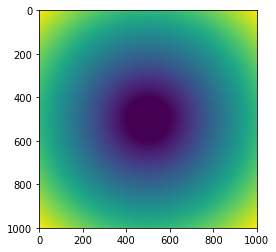

In [22]:
dim = 1000
rad = 100
extra = int((dim - 2*rad)/2)
mask = np.ones((dim, dim)) < 0
circ = disk(rad) > 0
mask[extra:extra+2*rad+1, extra:extra+2*rad+1] = circ
eumask = distance_transform_edt(~mask)
plt.imshow(eumask)

In [23]:
def confined_diffusion(nsteps=1000, start=(500,500), dim=1000, rad=100):
    
    x, y = normal_diffusion(nsteps=nsteps)
    x = x + start[0]
    y = y + start[1]
    
    mask = np.ones((1000, 1000)) < 0
    extra = int((dim - 2*rad)/2)
    mask = np.ones((dim, dim)) < 0
    circ = disk(rad) > 0
    mask[extra:extra+2*rad+1, extra:extra+2*rad+1] = circ
    eumask = distance_transform_edt(~mask)

    xconf = x
    yconf = y
    for i in range(0, x.shape[0]):
        xi = xconf[i]
        yi = yconf[i]
        if ~mask[int(xi), int(yi)]:
            testbox = eumask[int(xi)-1:int(xi)+2, int(yi)-1:int(yi)+2]
            interval = 1
            while testbox.min() > 0:
                testbox = eumask[int(xi)-interval:int(xi)+interval+1, int(yi)-interval:int(yi)+interval+1]
                interval += 1
            xnew, ynew = np.unravel_index(testbox.argmin(), testbox.shape)
            xnew = xnew + int(xi) - interval
            ynew = ynew + int(yi) - interval
            xconf[i:] = xconf[i:] - (xi - xnew)
            yconf[i:] = yconf[i:] - (yi - ynew)

    return xconf, yconf

In [24]:
def anomalous_diffusion(N=5001, alpha=0.6):
    n = np.linspace(-8, 48, 57)
    phix = 2*np.pi*np.random.rand(57)
    phiy = 2*np.pi*np.random.rand(57)
    t = np.linspace(0, N-1, N)
    xcomp = np.zeros(N)
    ycomp = np.zeros(N)
    
    for i, ti in enumerate(t):
        xcomp[i] = np.sum((np.cos(phix) - np.cos(np.sqrt(np.pi)**n*2*np.pi*ti/N + phix))/(np.sqrt(np.pi)**(n*alpha/2)))
        ycomp[i] = np.sum((np.cos(phiy) - np.cos(np.sqrt(np.pi)**n*2*np.pi*ti/N + phiy))/(np.sqrt(np.pi)**(n*alpha/2)))
    
    x = np.cumsum(np.diff(xcomp))
    y = np.cumsum(np.diff(ycomp))
    
    return x, y

In [26]:
n = np.linspace(-8, 48, 57)
N = 5001
phix = 2*np.pi*np.random.rand(57)
phiy = 2*np.pi*np.random.rand(57)
t = np.linspace(0, N-1, N)
xcomp = np.zeros(N)
ycomp = np.zeros(N)

In [28]:
x = np.cumsum(np.diff(xcomp))
y = np.cumsum(np.diff(ycomp))

In [29]:
track = pd.DataFrame(data={'Frame':t[:-1], 'X':x, 'Y':y})

In [30]:
msdv = msd.msd_calc(track, length=N-1)

In [31]:
N = 5001
x = {}
y = {}
t = np.linspace(0, N-1, N)
x['directed'] = 2*t
y['directed'] = 3*t

x['normal'], y['normal'] = normal_diffusion(nsteps=N)

x['anomalous'], y['anomalous'] = anomalous_diffusion(N=N+1, alpha=1.7)
x['confined'], y['confined'] = confined_diffusion(nsteps=N, rad=20)


x['circular'] = 3*np.cos(2*np.pi*t/50)
y['circular'] = 3*np.sin(2*np.pi*t/50)

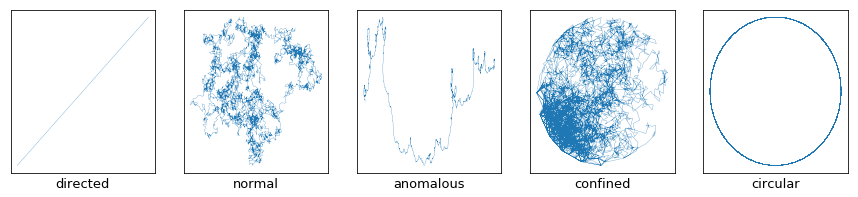

In [32]:
fig, axes = plt.subplots(ncols=5, figsize=(15, 3))

for xi, yi, ax in zip(x, y, axes):
    ax.plot(x[xi], y[yi], linewidth=0.25)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_xlabel(xi, fontsize=13)
    #print(x[xi].shape)
    #ax.scatter(x[xi], y[yi], color='k', s=2)
fig.savefig('track_xyplots.jpg', dpi=300)

In [47]:
asym1 = {}
asym2 = {}
asym3 = {}
alpha = {}
dcoef = {}
AR = {}
elong = {}
bound = {}
fractd = {}
probf = {}
eff = {}
straight = {}
kurt = {}
msdrat = {}

disp_mean = {}
disp_var = {}
disp_max = {}
disp_min = {}
angle_mean = {}
angle_mag_mean = {}
angle_var = {}
convex_hull = {}
convex_hull_norm = {}
dist_tot = {}
dist_net = {}
progression = {}



for xi in x:
    track = pd.DataFrame(data={'Frame':t, 'X':x[xi], 'Y':y[xi]})
    track = msd.msd_calc(track, length=N-1)
    a, b, asym1[xi], asym2[xi], asym3[xi] = ft.asymmetry(track)
    alpha[xi], dcoef[xi] = ft.alpha_calc(track)
    AR[xi], elong[xi], c = ft.aspectratio(track)
    bound[xi], fractd[xi], probf[xi] = ft.boundedness(track)
    eff[xi], straight[xi] = ft.efficiency(track)
    kurt[xi] = ft.kurtosis(track)
    msdrat[xi] = ft.msd_ratio(track)
    disp_mean[xi], disp_var[xi], disp_max[xi], disp_min[xi] = ft.disp_stats(track['X'], track['Y'])
    angle_mean[xi], angle_mag_mean[xi], angle_var[xi] = ft.turn_angle(track['X'], track['Y'])
    convex_hull[xi], convex_hull_norm[xi] = ft.convex_hull(track['X'], track['Y'])
    dist_tot[xi], dist_net[xi], progression[xi] = ft.dist_stats(track['X'], track['Y'])

In [48]:
asym1['ptcle'] = df['asymmetry1'].mean()
asym2['ptcle'] = df['asymmetry2'].mean()
asym3['ptcle'] = df['asymmetry3'].mean()
alpha['ptcle'] = df['alpha'].mean()
dcoef['ptcle'] = df['D_fit'].mean()
AR['ptcle'] = df['AR'].mean()
elong['ptcle'] = df['elongation'].mean()
bound['ptcle'] = df['boundedness'].mean()
fractd['ptcle'] = df['fractal_dim'].mean()
probf['ptcle'] = df['trappedness'].mean()
eff['ptcle'] = df['efficiency'].mean()
straight['ptcle'] = df['straightness'].mean()
kurt['ptcle'] = df['kurtosis'].mean()
msdrat['ptcle'] = df['MSD_ratio'].mean()

disp_mean['ptcle'] = df['disp_mean'].mean()
disp_var['ptcle'] = df['disp_var'].mean()
disp_max['ptcle'] = df['disp_max'].mean()
disp_min['ptcle'] = df['disp_min'].mean()
angle_mean['ptcle'] = df['angle_mean'].mean()
angle_mag_mean['ptcle'] = df['angle_mag_mean'].mean()
angle_var['ptcle'] = df['angle_var'].mean()
convex_hull['ptcle'] = df['convex_hull'].mean()
convex_hull_norm['ptcle'] = df['convex_hull_norm'].mean()
dist_tot['ptcle'] = df['dist_tot'].mean()
dist_net['ptcle'] = df['dist_net'].mean()
progression['ptcle'] = df['progression'].mean()


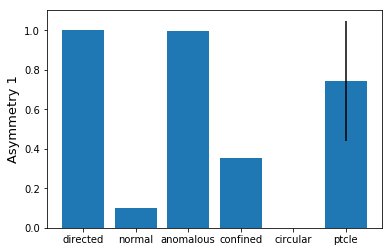

In [50]:
plt.bar(range(len(asym1)), list(asym1.values()), yerr = [0,0,0,0,0,df['asymmetry1'].std()], align='center')
plt.xticks(range(len(asym1)), list(asym1.keys()))
plt.ylabel('Asymmetry 1', fontsize=13)
plt.savefig('asymmetry1.jpg', dpi=300)

array([4., 4.])

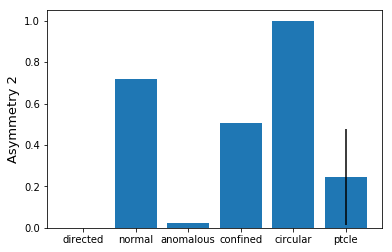

In [51]:
plt.bar(range(len(asym2)), list(asym2.values()),yerr = [0,0,0,0,0,df['asymmetry2'].std()], align='center')

plt.xticks(range(len(asym2)), list(asym2.keys()))
plt.ylabel('Asymmetry 2', fontsize=13)
plt.figaspect(1)

Text(0, 0.5, 'Asymmetry 3')

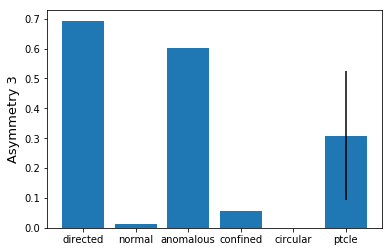

In [52]:
plt.bar(range(len(asym3)), list(asym3.values()),yerr = [0,0,0,0,0,df['asymmetry3'].std()], align='center')
plt.xticks(range(len(asym3)), list(asym3.keys()))
plt.ylabel('Asymmetry 3', fontsize=13)

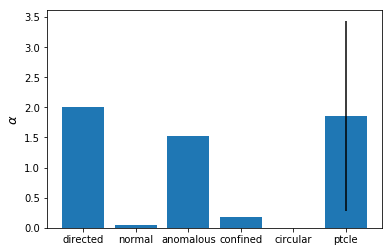

In [53]:
plt.bar(range(len(alpha)), list(alpha.values()),yerr = [0,0,0,0,0,df['alpha'].std()], align='center')
plt.xticks(range(len(alpha)), list(alpha.keys()))
plt.ylabel(r'$\alpha$', fontsize=13)
plt.savefig('alpha.jpg', dpi=300)

Text(0, 0.5, 'Fitted Diffusion Coefficient')

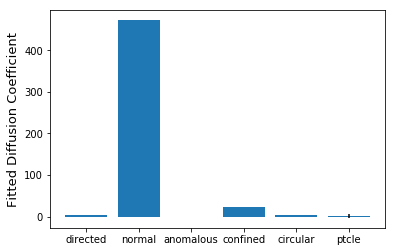

In [54]:
plt.bar(range(len(dcoef)), list(dcoef.values()),yerr = [0,0,0,0,0,df['D_fit'].std()], align='center')
plt.xticks(range(len(dcoef)), list(dcoef.keys()))
plt.ylabel('Fitted Diffusion Coefficient', fontsize=13)

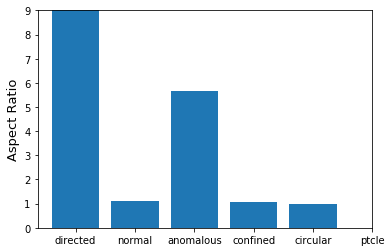

In [58]:
plt.bar(range(len(AR)), list(AR.values()), yerr = [0,0,0,0,0,df['AR'].std()], align='center')
plt.xticks(range(len(AR)), list(AR.keys()))
plt.ylabel('Aspect Ratio', fontsize=13)
plt.ylim([0,9])
plt.savefig('aspectratio.jpg', dpi=300)

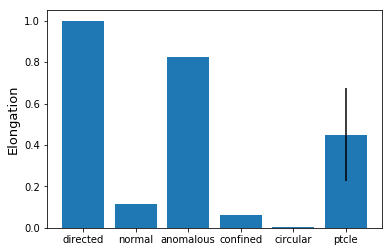

In [59]:
plt.bar(range(len(elong)), list(elong.values()), yerr = [0,0,0,0,0,df['elongation'].std()],align='center')
plt.xticks(range(len(elong)), list(elong.keys()))
plt.ylabel('Elongation', fontsize=13)
plt.savefig('elongation.jpg', dpi=300)

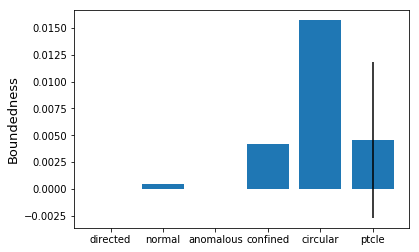

In [60]:
plt.bar(range(len(bound)), list(bound.values()),yerr = [0,0,0,0,0,df['boundedness'].std()],  align='center')
plt.xticks(range(len(bound)), list(bound.keys()))
plt.ylabel('Boundedness', fontsize=13)
plt.savefig('boundedness.jpg', dpi=300)

Text(0, 0.5, 'Elongation')

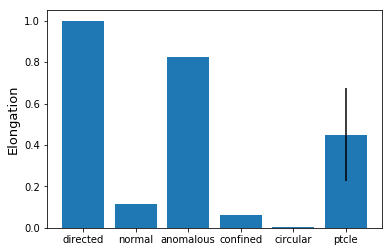

In [61]:
plt.bar(range(len(elong)), list(elong.values()), yerr = [0,0,0,0,0,df['elongation'].std()],align='center')
plt.xticks(range(len(elong)), list(elong.keys()))
plt.ylabel('Elongation', fontsize=13)

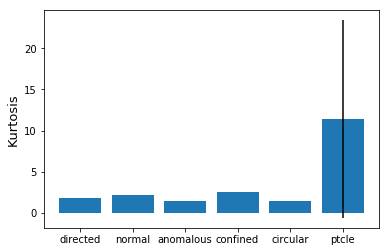

In [62]:
plt.bar(range(len(kurt)), list(kurt.values()),yerr = [0,0,0,0,0,df['kurtosis'].std()], align='center')
plt.xticks(range(len(kurt)), list(kurt.keys()))
plt.ylabel('Kurtosis', fontsize=13)
plt.savefig('kurtosis.jpg', dpi=300)

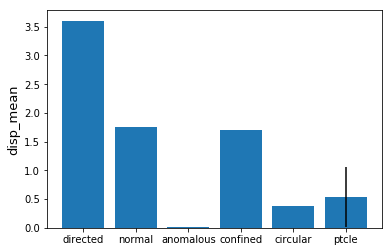

In [63]:
plt.bar(range(len(disp_mean)), list(disp_mean.values()), yerr = [0,0,0,0,0,df['disp_mean'].std()], align='center')
plt.xticks(range(len(disp_mean)), list(disp_mean.keys()))
plt.ylabel('disp_mean', fontsize=13)
# plt.ylim([-0.2, 0.2])
plt.savefig('disp_mean.jpg', dpi=300)

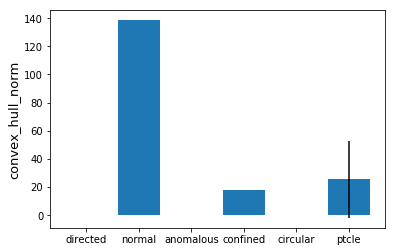

In [64]:
plt.bar(range(len(convex_hull_norm)), list(convex_hull_norm.values()), yerr = [0,0,0,0,0,df['convex_hull_norm'].std()],align='center')
plt.xticks(range(len(convex_hull_norm)), list(convex_hull_norm.keys()))
plt.ylabel('convex_hull_norm', fontsize=13)
# plt.ylim([-0.2, 0.2])
plt.savefig('convex_hull_norm.jpg', dpi=300)

In [ ]:
yerr = [0,0,0,0,0,df['asymmetry1'].std()],

In [12]:
print(df.iloc(0)[0])

Track_ID               0.000000
alpha                  0.816584
D_fit                  0.178125
kurtosis               6.181037
asymmetry1             0.431738
asymmetry2             0.454919
asymmetry3             0.072764
AR                     1.179545
elongation             0.152215
boundedness            0.015399
fractal_dim            1.641385
trappedness           -0.222542
efficiency             0.044147
straightness           0.038160
MSD_ratio              0.318185
disp_mean              0.734837
disp_var               2.452239
disp_max               0.055544
disp_min               7.864355
frames               168.000000
X                     42.701386
Y                   1751.085206
Quality                4.714055
Mean_Intensity       351.789887
SN_Ratio               0.723640
Deff1                  0.304687
Deff2                  0.076223
angle_mean             6.999580
angle_mag_mean        22.074737
angle_var           2450.027374
convex_hull          123.033225
convex_h

In [14]:
for i in df.columns:
    mean_value = df[i].mean
    std_value = df[i].std
    

In [15]:
plt.bar(range(len(asym1)), list(asym1.values()), align='center')
plt.xticks(range(len(asym1)), list(asym1.keys()))
plt.ylabel('Asymmetry 1', fontsize=13)
plt.savefig('asymmetry1.jpg', dpi=300)

NameError: name 'asym1' is not defined